In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
!pip install SciencePlots
!pip install joypy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [ ]:
import pandas as pd

file_path = 'DataHH.txt'

# Read the file content
with open(file_path, 'r') as file:
    content = file.readlines()

# Initialize variables
experiments = []
current_experiment = {}
parsing_data = False

for line in content:
    line = line.strip()
    if line.startswith("P") and "agen" in line and "iter" in line:
        # Save the previous experiment data
        if current_experiment:
            experiments.append(current_experiment)
        # Start a new experiment
        current_experiment = {'data': []}
        parts = line.split(',')
        current_experiment['agentes'] = int(parts[0].split('=')[1].strip())
        current_experiment['iteraciones'] = int(parts[1].split('=')[1].strip())
        parsing_data = True
    elif line.startswith("# imag") or line == "":
        # Skip header or empty lines
        continue
    elif parsing_data:
        try:
            row = line.split()
            imag = int(row[0])
            op1 = row[1]
            selector1 = row[2]
            op2 = row[3]
            selector2 = row[4]
            perf = float(row[5])
            time_seg = float(row[6].replace(",", ""))
            current_experiment['data'].append([imag, op1, selector1, op2, selector2, perf, time_seg])
        except ValueError:
            continue
if current_experiment:
    experiments.append(current_experiment)

df_list = []
for exp in experiments:
    df = pd.DataFrame(exp['data'], columns=['imag', 'Op1', 'Selector1', 'Op2', 'Selector2', 'perf', 'time (seg)'])
    df['iteraciones'] = exp['iteraciones']
    df['agentes'] = exp['agentes']
    df_list.append(df)
df_all = pd.concat(df_list, ignore_index=True)


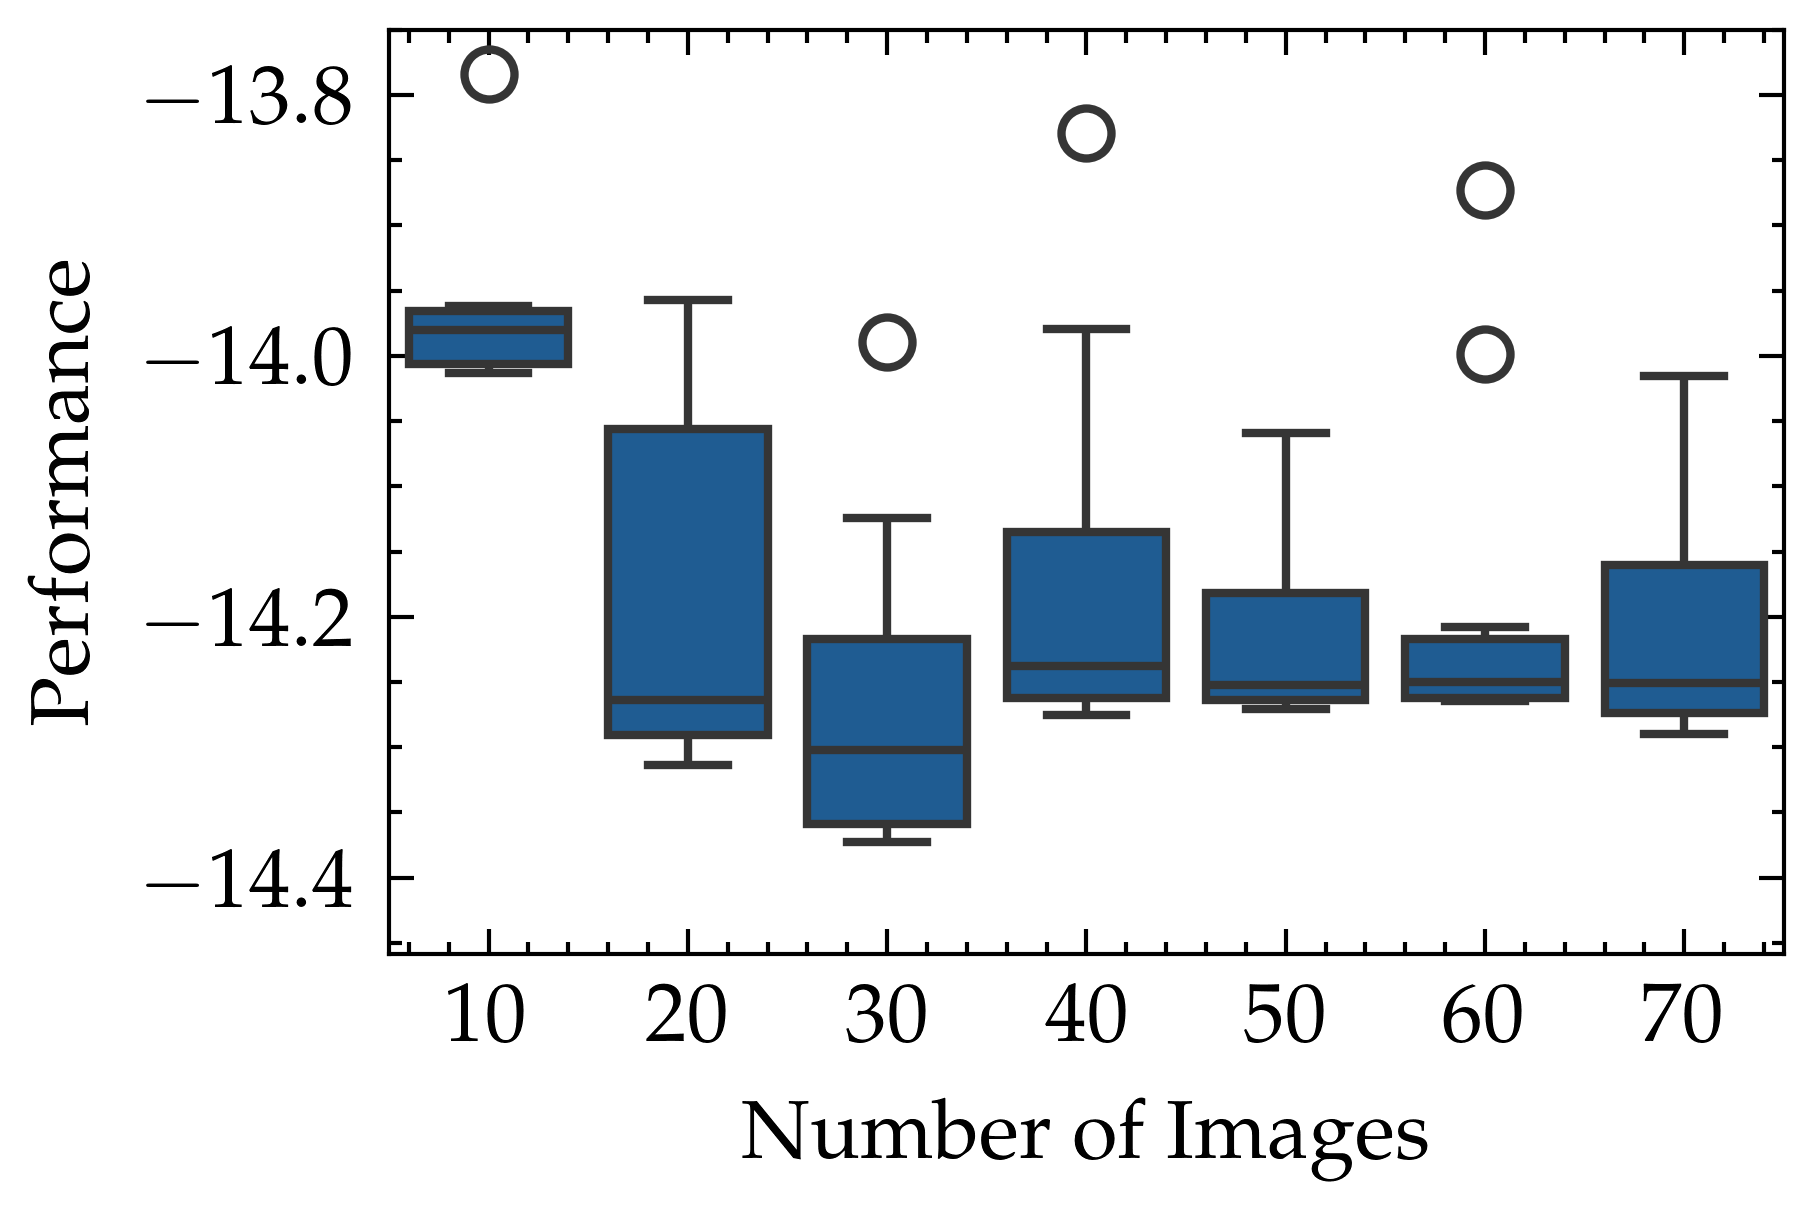

In [ ]:
#!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
#!pip install SciencePlots
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

# Configurar Matplotlib para usar LaTeX con el estilo SciencePlots
plt.style.use(['science', 'ieee'])

# Configuración de relación de aspecto y tamaño de letra
plt.rcParams.update({
    "figure.figsize": (3, 2),
    "axes.labelsize": 10,        # Tamaño de las etiquetas de los ejes
    "axes.titlesize": 10,        # Tamaño del título
    "legend.fontsize": 10,       # Tamaño de la leyenda
    "xtick.labelsize": 10,       # Tamaño de las etiquetas del eje x
    "ytick.labelsize": 10,       # Tamaño de las etiquetas del eje y
    "text.usetex": True,         # Usar LaTeX para renderizar texto
    "font.family": "serif",
    "font.serif": ["Palatino"],  # Puedes cambiar a otra fuente si lo prefieres
})

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.boxplot(x='imag', y='perf', data=df_all, ax=ax)
    ax.set_ylim(bottom=None, top=-13.75)
    ax.set_xlabel(r'Number of Images', fontsize=10)
    ax.set_ylabel(r'Performance', fontsize=10)
    fig.savefig('plot_example.pdf', dpi=300)
    fig.savefig('plot_example.eps', dpi=300)

    plt.show()


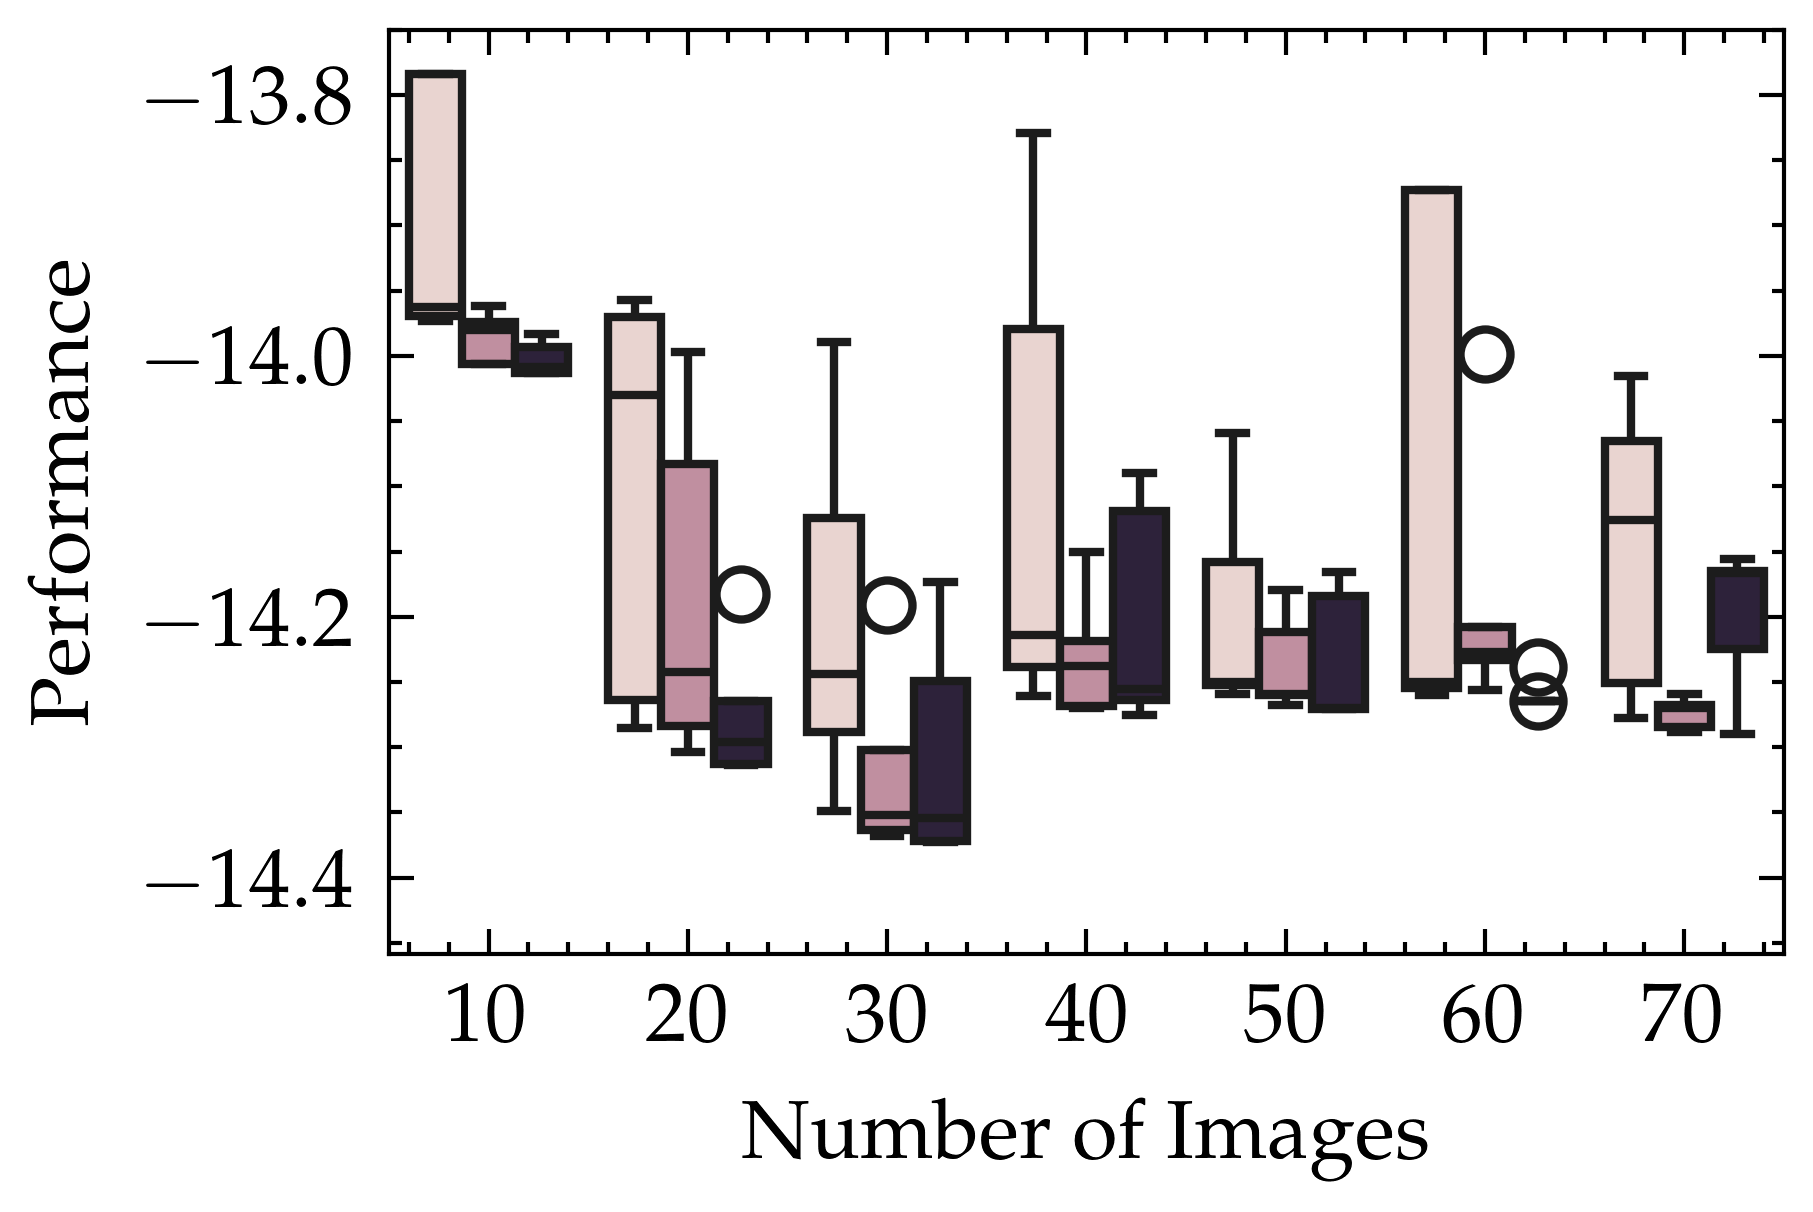

In [ ]:

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))  # Relación de aspecto 1:2
    sns.boxplot(x='imag', y='perf', hue='agentes', data=df_all, ax=ax)
    ax.set_ylim(bottom=None, top=-13.75)
    ax.set_xlabel(r'Number of Images', fontsize=10)
    ax.set_ylabel(r'Performance', fontsize=10)
    ax.legend_.remove()
    fig.savefig('Boxp2.pdf', dpi=300)
    fig.savefig('Boxp2.eps', dpi=300)
    plt.show()



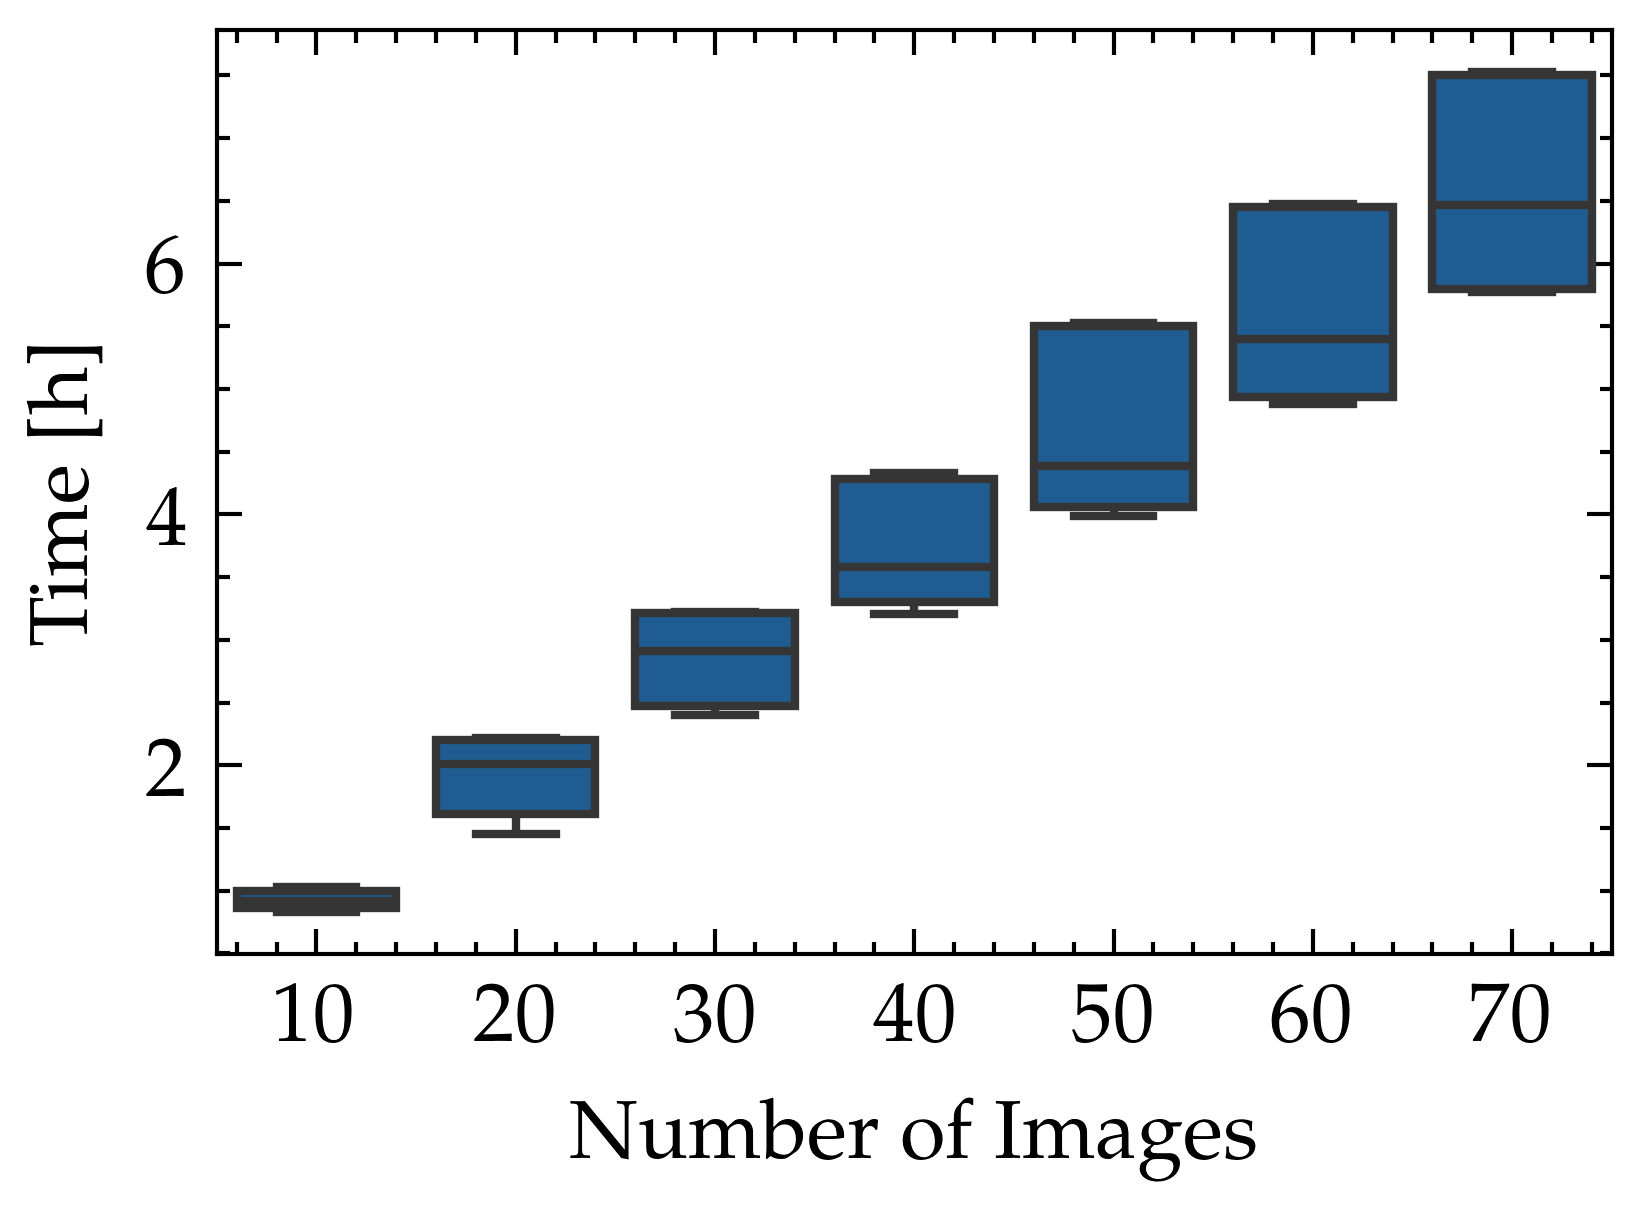

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el tiempo de segundos a horas
df_all['time (hours)'] = df_all['time (seg)'] / 3600

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.boxplot(x='imag', y='time (hours)', data=df_all)
    ax.set_xlabel(r'Number of Images', fontsize=10)
    ax.set_ylabel(r'Time [h]', fontsize=10)
    fig.savefig('Box3_hours.pdf', dpi=300)
    fig.savefig('Box3_hours.eps', dpi=300)
    plt.show()






In [ ]:
pip install plotly


In [ ]:
import plotly.graph_objects as go

# Definir los nodos
nodes = ["Heuristic Space",
         'random_flight', 'differential_mutation', 'random_search',
         'genetic_mutation', 'local_random_walk', 'spiral_dynamic',
         'random_sample', 'firefly_dynamic', 'genetic_crossover',
         'swarm_dynamic', 'gravitational_search', 'central_force_dynamic',
         'genetic_mutation2', 'random_search2', 'differential_mutation2',
         'local_random_walk2', 'firefly_dynamic2', 'spiral_dynamic2',
         'random_sample2', 'central_force_dynamic2', 'swarm_dynamic2',
         'genetic_crossover2', 'random_flight2']

# Definir las conexiones entre los nodos
# Fase 1: Del "Heuristic Space" a la primera serie de operadores
sources = [0] * 12  # Todos los enlaces provienen de "Heuristic Space"
targets = list(range(1, 13))  # Cada nodo heurístico es un objetivo en la primera serie

# Definir los valores de flujo para la primera fase
values_first_phase = [19, 18, 17, 12, 12, 8, 5, 5, 3, 3, 2, 1]

# Definir las conexiones de la segunda fase
second_phase_connections = [
    # random_flight connections
    (1, 13, 5), (1, 14, 3), (1, 15, 3), (1, 16, 3),
    (1, 17, 2), (1, 18, 1), (1, 19, 1), (1, 20, 1),

    # differential_mutation connections
    (2, 18, 11), (2, 19, 2), (2, 22, 2), (2, 21, 1),
    (2, 17, 1), (2, 16, 1),

    # random_search connections
    (3, 13, 8), (3, 22, 3), (3, 21, 2), (3, 18, 1),
    (3, 15, 1), (3, 16, 1), (3, 17, 1),

    # genetic_mutation connections
    (4, 13, 5), (4, 14, 2), (4, 12, 1), (4, 18, 1),
    (4, 19, 1), (4, 15, 1), (4, 16, 1),

    # local_random_walk connections
    (5, 13, 4), (5, 14, 2), (5, 15, 2), (5, 21, 2),
    (5, 14, 1), (5, 16, 1),

    # spiral_dynamic connections
    (6, 15, 3), (6, 19, 3), (6, 13, 1), (6, 20, 1),

    # random_sample connections
    (7, 14, 2), (7, 15, 1), (7, 18, 1), (7, 21, 1),

    # firefly_dynamic connections
    (8, 21, 2), (8, 22, 2), (8, 13, 1),

    # genetic_crossover connections
    (9, 19, 2), (9, 15, 1),

    # swarm_dynamic connections
    (10, 18, 1), (10, 17, 1), (10, 14, 1),

    # gravitational_search connections
    (11, 14, 1), (11, 21, 1),

    # central_force_dynamic connections
    (12, 16, 1),
]

# Añadir las conexiones de la segunda fase
sources += [conn[0] for conn in second_phase_connections]
targets += [conn[1] for conn in second_phase_connections]
values_second_phase = [conn[2] for conn in second_phase_connections]

# Combinar todos los valores obtenidos del usuario
values = values_first_phase + values_second_phase

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color="lightblue",
        x=[0.1] * 13 + [0.5] * 10,  # Ajuste de posición horizontal (0.1 para la primera columna, 0.5 para la segunda)
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="lightgrey"
    )
)])

# Configurar el diseño del diagrama
fig.update_layout(
    title_text="Heuristic Space Flow Sankey Diagram with Adjusted Node Positions",
    font_size=10,
    title_x=0.5,
    title_y=0.95,
    font=dict(family="Arial", size=12),
)

fig.show()


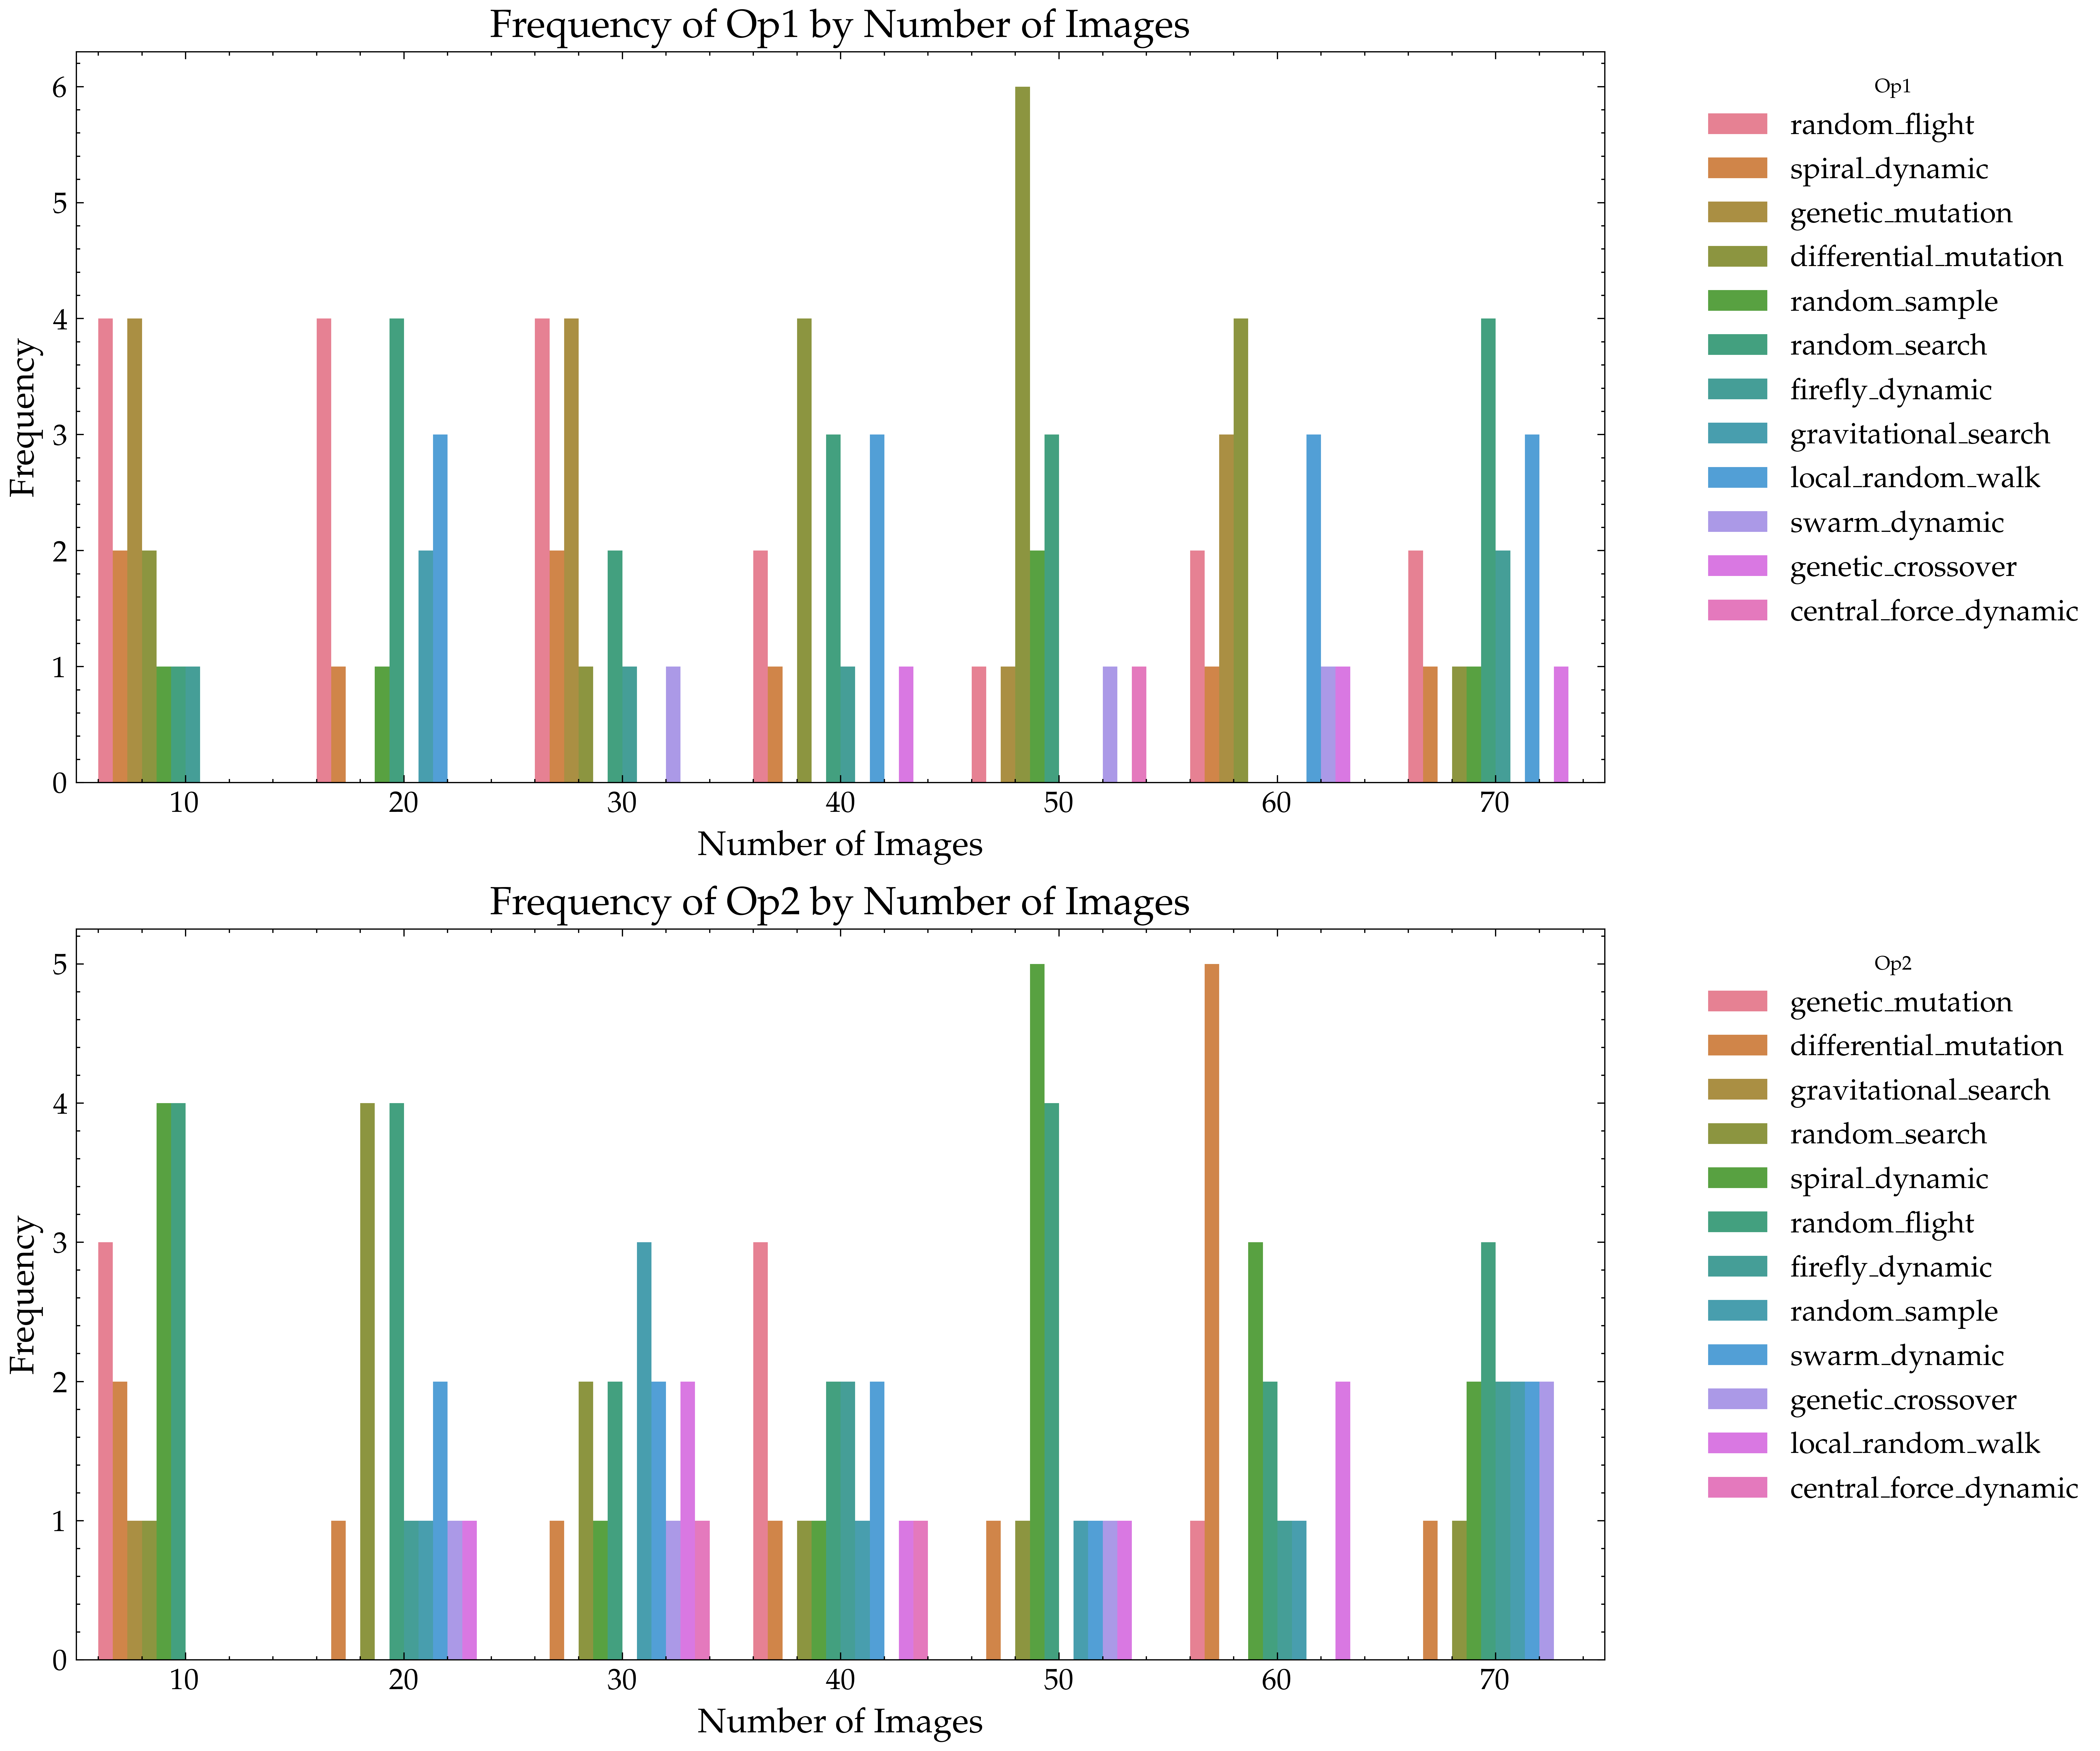

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de frecuencia para Op1 y Op2 por número de imágenes
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Frecuencia de Op1 por número de imágenes
sns.countplot(x='imag', hue='Op1', data=df_all, ax=ax[0])
ax[0].set_title('Frequency of Op1 by Number of Images')
ax[0].set_xlabel('Number of Images')
ax[0].set_ylabel('Frequency')
ax[0].legend(title='Op1', bbox_to_anchor=(1.05, 1), loc='upper left')

# Frecuencia de Op2 por número de imágenes
sns.countplot(x='imag', hue='Op2', data=df_all, ax=ax[1])
ax[1].set_title('Frequency of Op2 by Number of Images')
ax[1].set_xlabel('Number of Images')
ax[1].set_ylabel('Frequency')
ax[1].legend(title='Op2', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


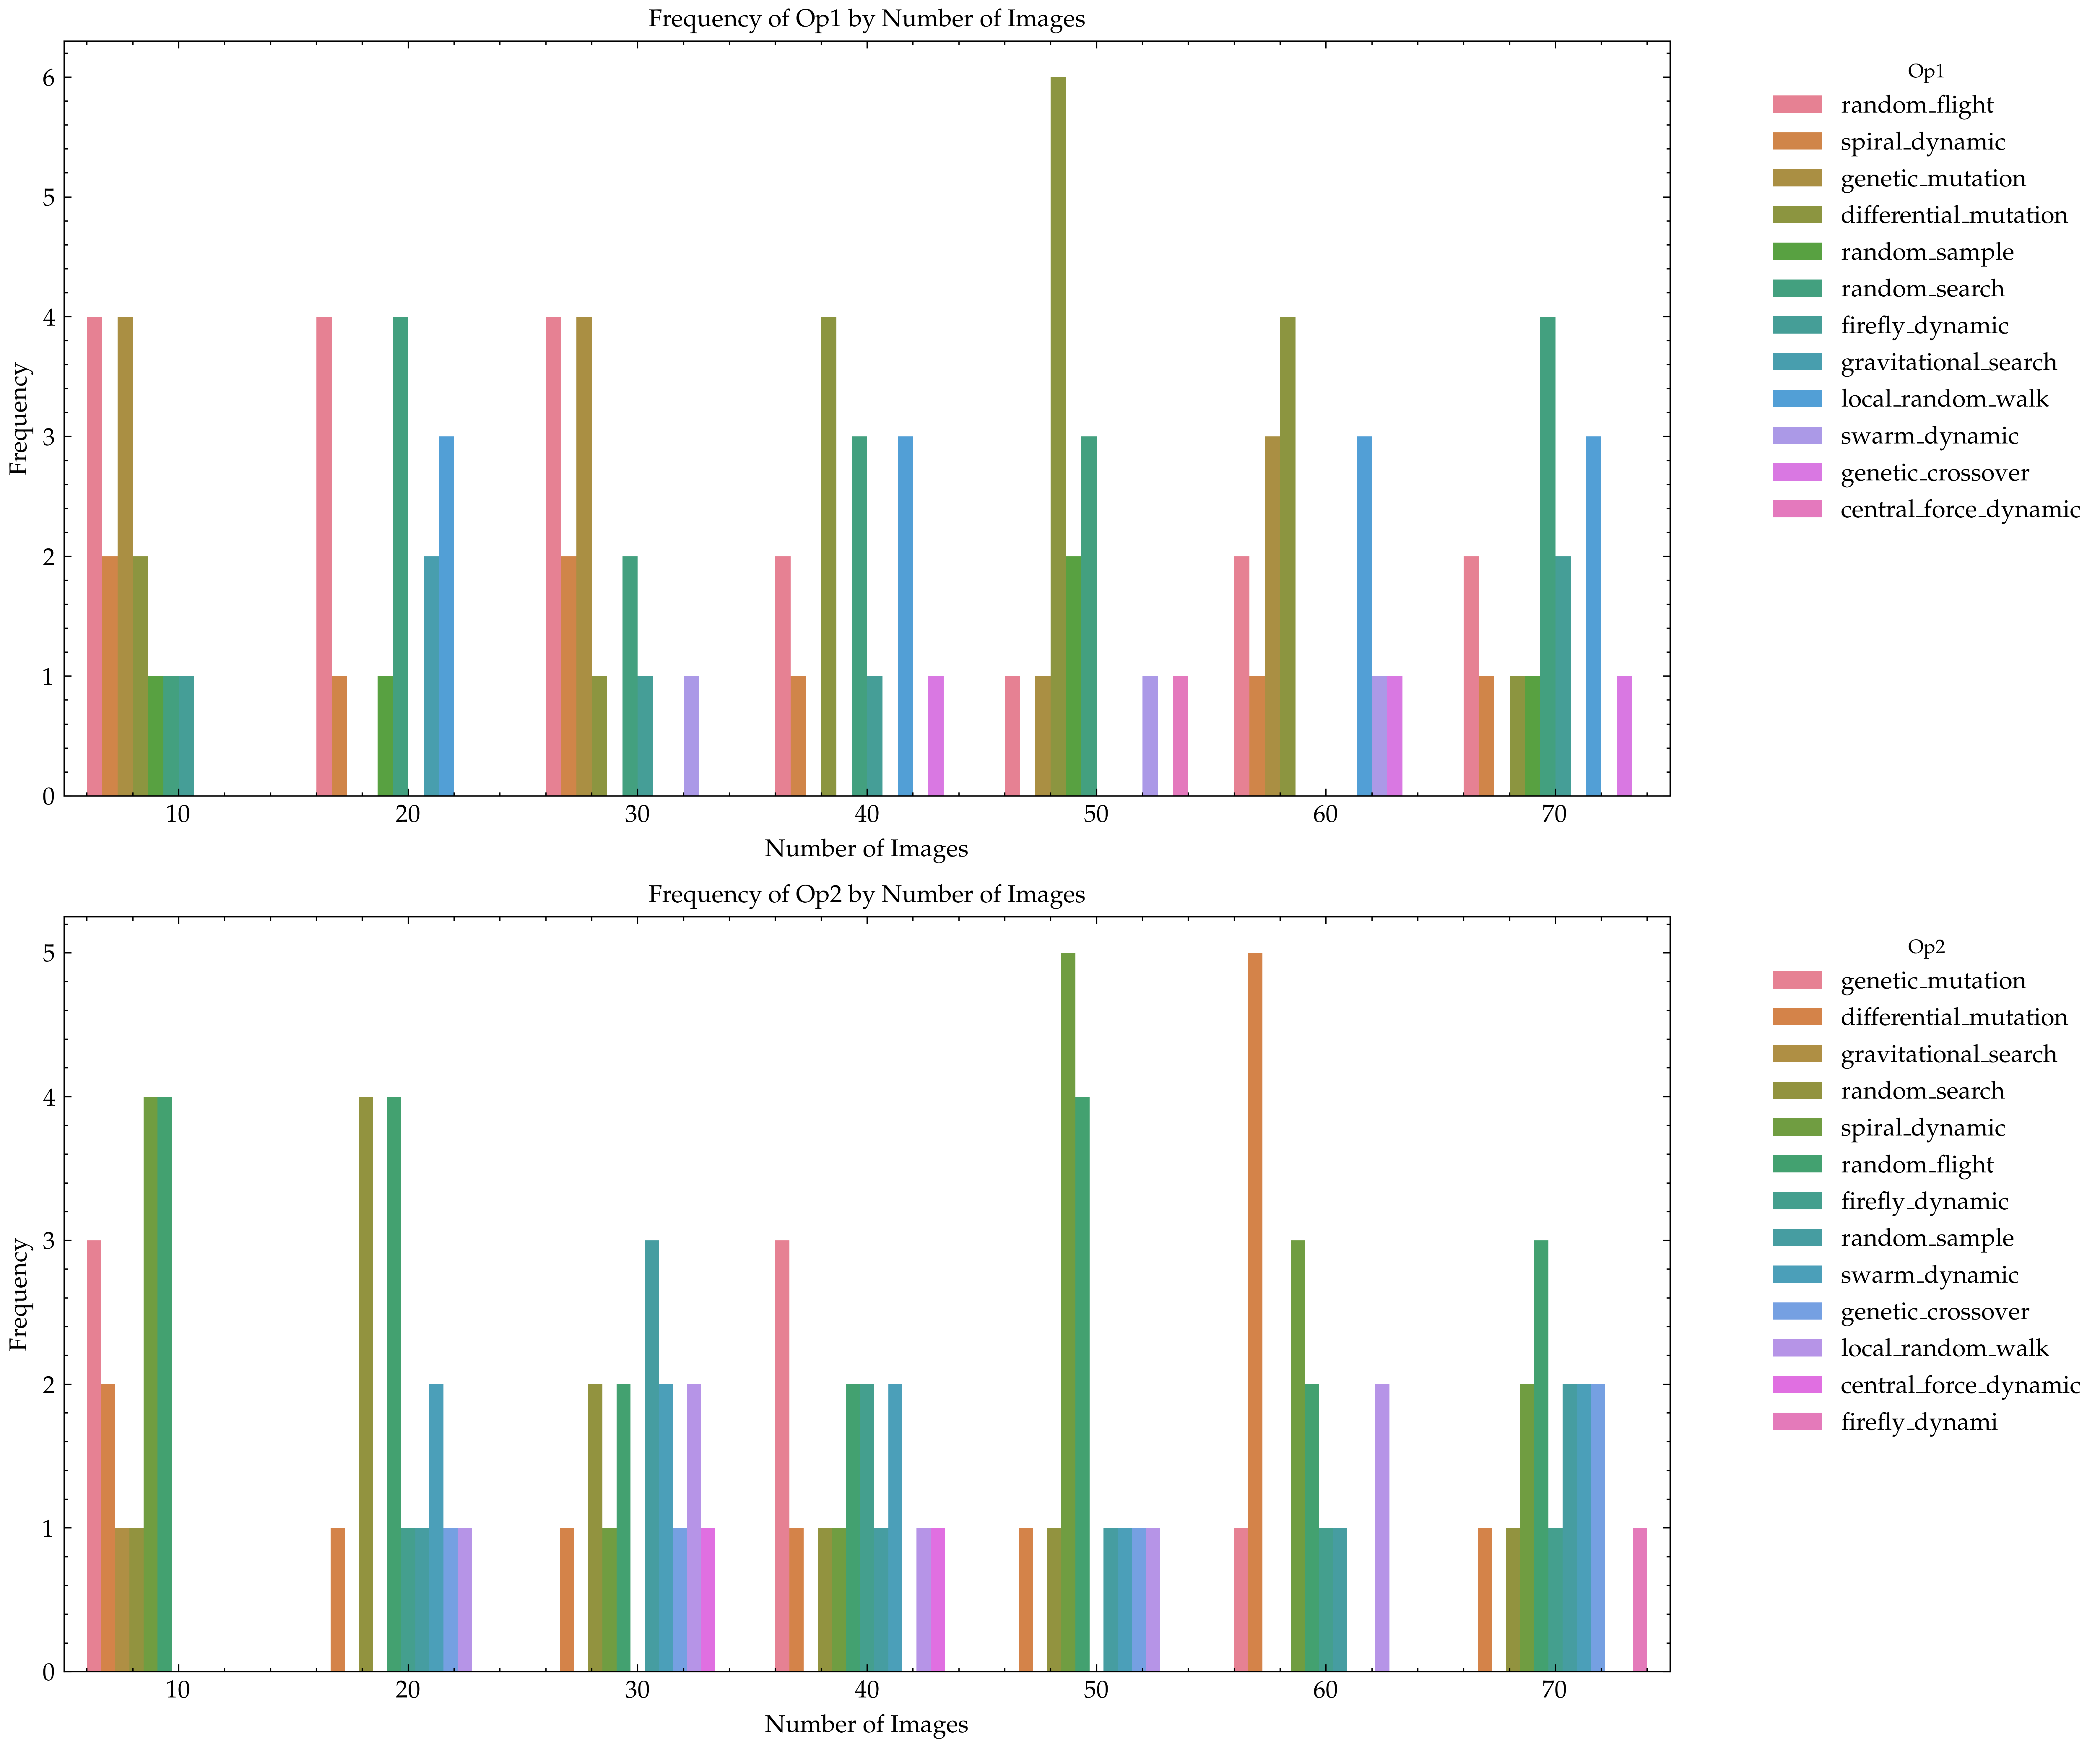

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de frecuencia para Op1 y Op2 por número de imágenes
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Frecuencia de Op1 por número de imágenes
sns.countplot(x='imag', hue='Op1', data=df_all, ax=ax[0])
ax[0].set_title('Frequency of Op1 by Number of Images')
ax[0].set_xlabel('Number of Images')
ax[0].set_ylabel('Frequency')
ax[0].legend(title='Op1', bbox_to_anchor=(1.05, 1), loc='upper left')

# Frecuencia de Op2 por número de imágenes
sns.countplot(x='imag', hue='Op2', data=df_all, ax=ax[1])
ax[1].set_title('Frequency of Op2 by Number of Images')
ax[1].set_xlabel('Number of Images')
ax[1].set_ylabel('Frequency')
ax[1].legend(title='Op2', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
!pip install squarify


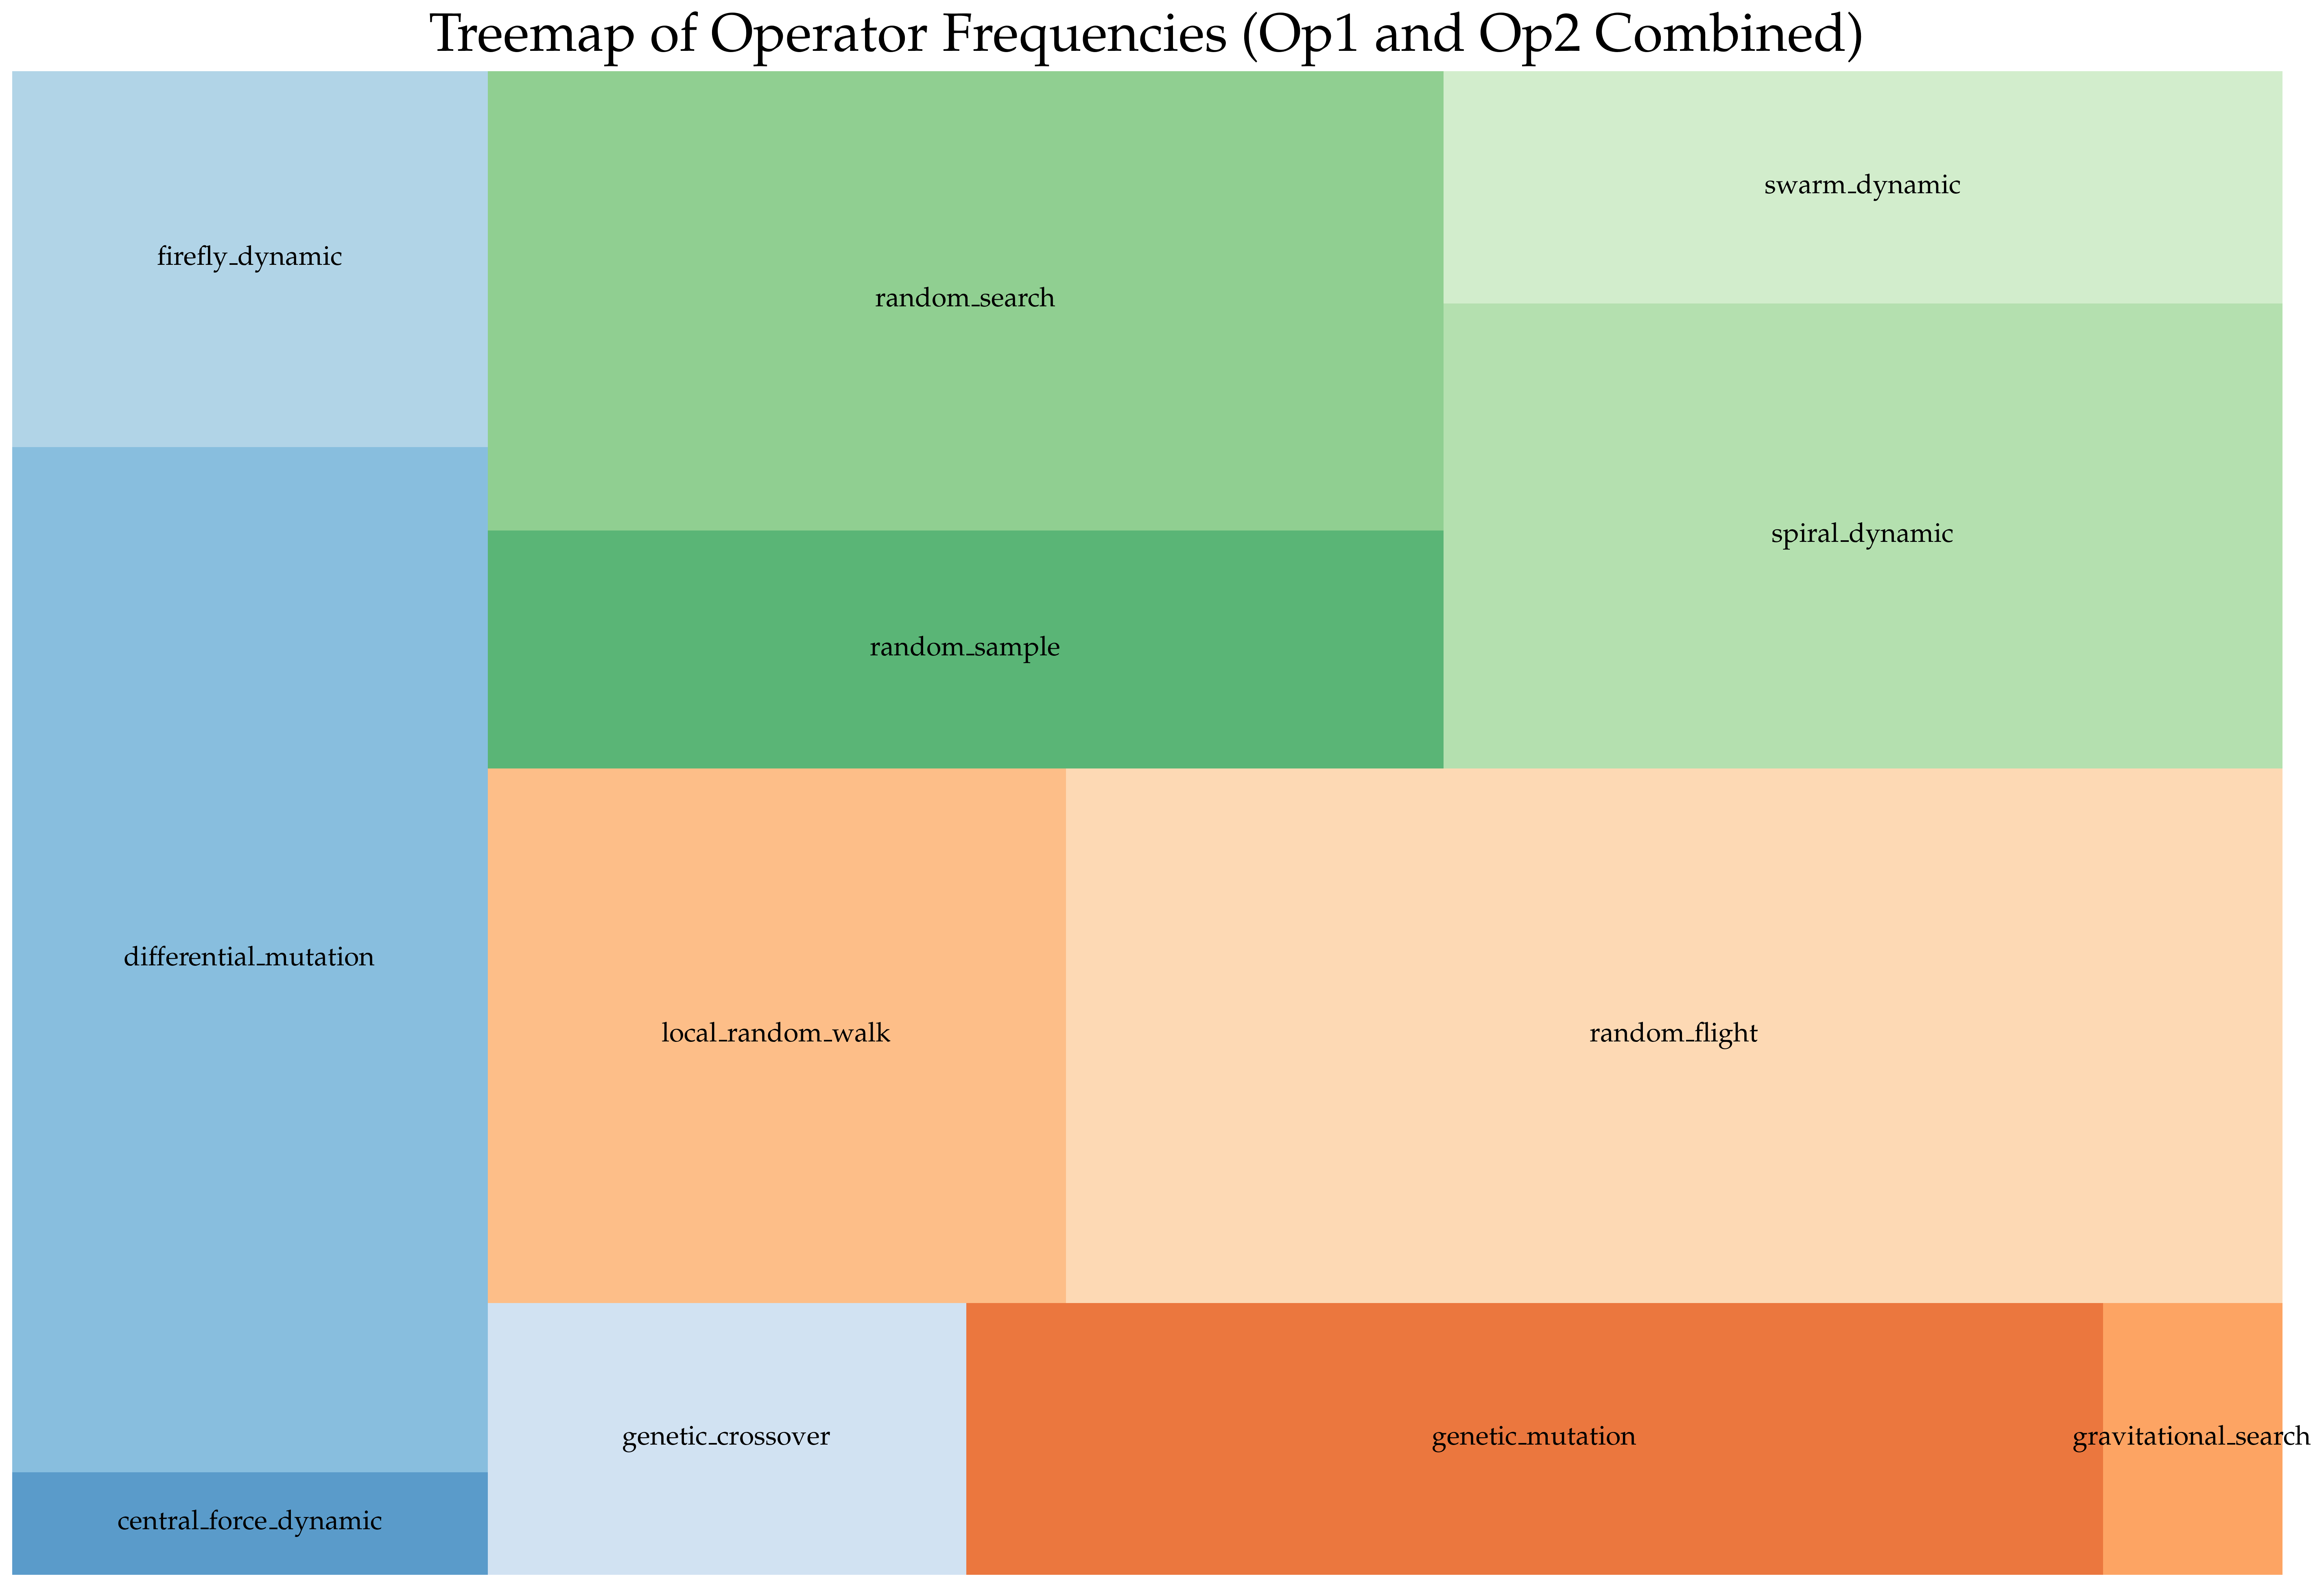

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Calcular la frecuencia de los operadores combinando Op1 y Op2
operator_counts = df_all['Op1'].value_counts() + df_all['Op2'].value_counts()

# Preparar datos para el treemap
labels = operator_counts.index
sizes = operator_counts.values
colors = plt.cm.tab20c.colors  # Usar una paleta de colores para hacer el treemap más atractivo

# Crear el treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('Treemap of Operator Frequencies (Op1 and Op2 Combined)')
plt.axis('off')
plt.show()


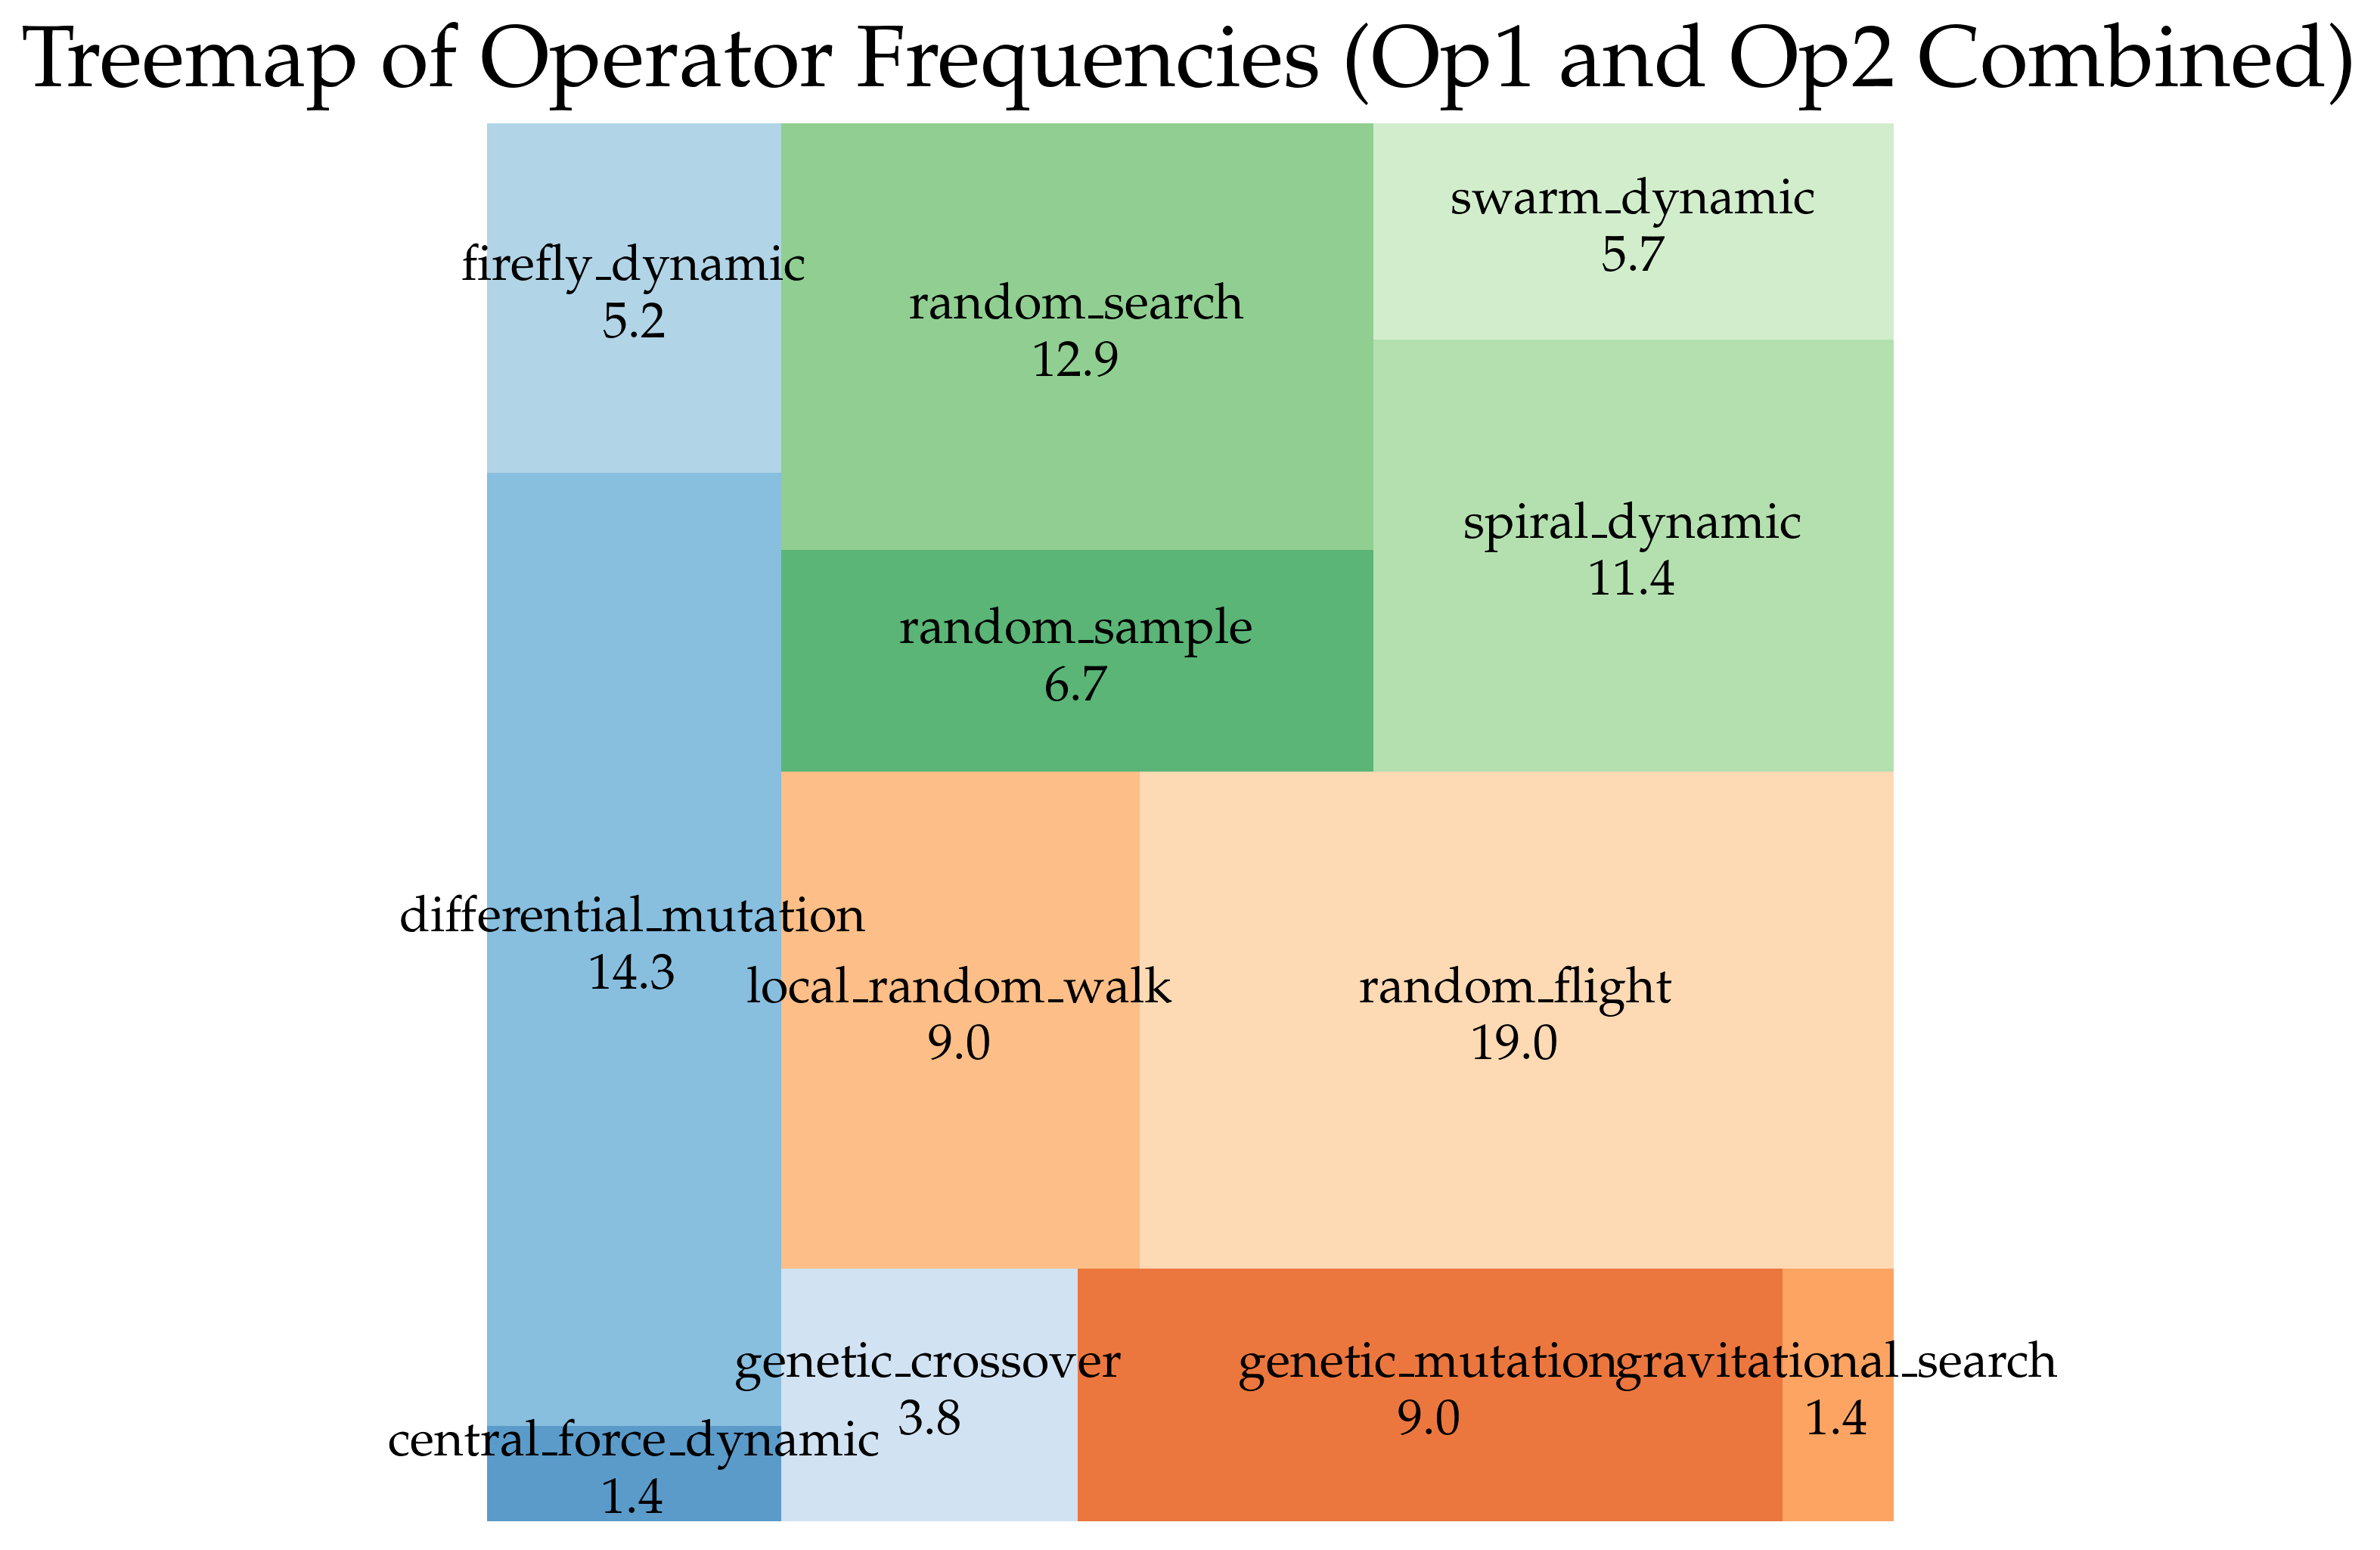

In [ ]:
import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Calcular la frecuencia de los operadores combinando Op1 y Op2
operator_counts = df_all['Op1'].value_counts() + df_all['Op2'].value_counts()

# Calcular los porcentajes
percentages = (operator_counts / operator_counts.sum()) * 100

# Preparar etiquetas con el porcentaje y símbolo %
labels = [f'{label}\n{percentage:.1f}%' for label, percentage in zip(operator_counts.index, percentages)]

# Preparar tamaños
sizes = operator_counts.values

# Crear colores basados en los porcentajes (más alto = más oscuro)
colors = plt.cm.tab20c.colors  # Usar una paleta de colores para hacer el treemap más atractivo


# Aplicar el estilo 'science'
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(4, 4))  # Relación de aspecto 1:1
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, ax=ax)
    plt.title('Treemap of Operator Frequencies (Op1 and Op2 Combined)', fontsize=14)
    plt.axis('off')
    fig.savefig('Treemap_Op1_Op2.pdf', dpi=300)
    #fig.savefig('Treemap_Op1_Op2.eps', dpi=300)
    plt.show()


In [ ]:
import pandas as pd

# Filtrar los datos para el experimento con 15 agentes, 30 iteraciones y 10 imágenes
df_10img = df_all[(df_all['agentes'] == 15) & (df_all['iteraciones'] == 30) & (df_all['imag'] == 10)]

# Calcular la frecuencia de cada operador en Op1 y Op2
op1_freq_10img = df_10img['Op1'].value_counts()
op2_freq_10img = df_10img['Op2'].value_counts()

# Identificar el operador con mayor frecuencia en Op1 y Op2
op1_most_frequent_10img = op1_freq_10img.idxmax()
op2_most_frequent_10img = op2_freq_10img.idxmax()

# Mostrar los resultados
print(f"El operador con mayor frecuencia en Op1 con 10 imágenes es: {op1_most_frequent_10img}")
print(f"El operador con mayor frecuencia en Op2 con 10 imágenes es: {op2_most_frequent_10img}")


El operador con mayor frecuencia en Op1 con 10 imágenes es: random_flight
El operador con mayor frecuencia en Op2 con 10 imágenes es: genetic_mutation


In [ ]:
import pandas as pd

# Filtrar los datos para el experimento con 15 agentes, 30 iteraciones y 10 imágenes
df_10img = df_all[(df_all['agentes'] == 30) & (df_all['iteraciones'] == 60) & (df_all['imag'] == 70)]

# Calcular la frecuencia de cada operador en Op1 y Op2
op1_freq_10img = df_10img['Op1'].value_counts()
op2_freq_10img = df_10img['Op2'].value_counts()

# Identificar los operadores con mayor frecuencia en Op1 y Op2
op1_max_freq = op1_freq_10img.max()
op2_max_freq = op2_freq_10img.max()
op1_most_frequent_10img = op1_freq_10img[op1_freq_10img == op1_max_freq].index.tolist()
op2_most_frequent_10img = op2_freq_10img[op2_freq_10img == op2_max_freq].index.tolist()

# Identificar los operadores con menor frecuencia en Op1 y Op2
op1_min_freq = op1_freq_10img.min()
op2_min_freq = op2_freq_10img.min()
op1_least_frequent_10img = op1_freq_10img[op1_freq_10img == op1_min_freq].index.tolist()
op2_least_frequent_10img = op2_freq_10img[op2_freq_10img == op2_min_freq].index.tolist()

# Mostrar los resultados
print(f"Los operadores con mayor frecuencia en Op1 con  imágenes son: {', '.join(op1_most_frequent_10img)}")
print(f"Los operadores con mayor frecuencia en Op2 con  imágenes son: {', '.join(op2_most_frequent_10img)}")
print(f"Los operadores con menor frecuencia en Op1 con  imágenes son: {', '.join(op1_least_frequent_10img)}")
print(f"Los operadores con menor frecuencia en Op2 con  imágenes son: {', '.join(op2_least_frequent_10img)}")

operator_map = {
    'central_force_dynamic': 'h_1',
    'differential_mutation': 'h_2',
    'firefly_dynamic': 'h_3',
    'genetic_crossover': 'h_4',
    'genetic_mutation': 'h_5',
    'gravitational_search': 'h_6',
    'random_flight': 'h_7',
    'local_random_walk': 'h_8',
    'random_sample': 'h_9',
    'random_search': 'h_10',
    'spiral_dynamic': 'h_11',
    'swarm_dynamic': 'h_12'
}

Los operadores con mayor frecuencia en Op1 con  imágenes son: local_random_walk
Los operadores con mayor frecuencia en Op2 con  imágenes son: random_sample
Los operadores con menor frecuencia en Op1 con  imágenes son: genetic_crossover, spiral_dynamic, random_sample
Los operadores con menor frecuencia en Op2 con  imágenes son: random_flight, random_search, swarm_dynamic


In [ ]:
import pandas as pd
import numpy as np
# Filtrar los datos para 10 imágenes, 15 agentes y 30 iteraciones
df_filtered = df_all[(df_all['imag'] == 70) & (df_all['agentes'] == 30) & (df_all['iteraciones'] == 60)]

# Extraer el vector de performance
perf_vector = df_filtered['perf'].values

# Mostrar el vector de performance
print(perf_vector)
print(np.min(perf_vector))
print(np.mean(perf_vector))
print(np.std(perf_vector))

[-14.29008328 -14.1558696  -14.16651471 -14.16479657 -14.22458528]
-14.29008328
-14.200369888
0.051042702861198254


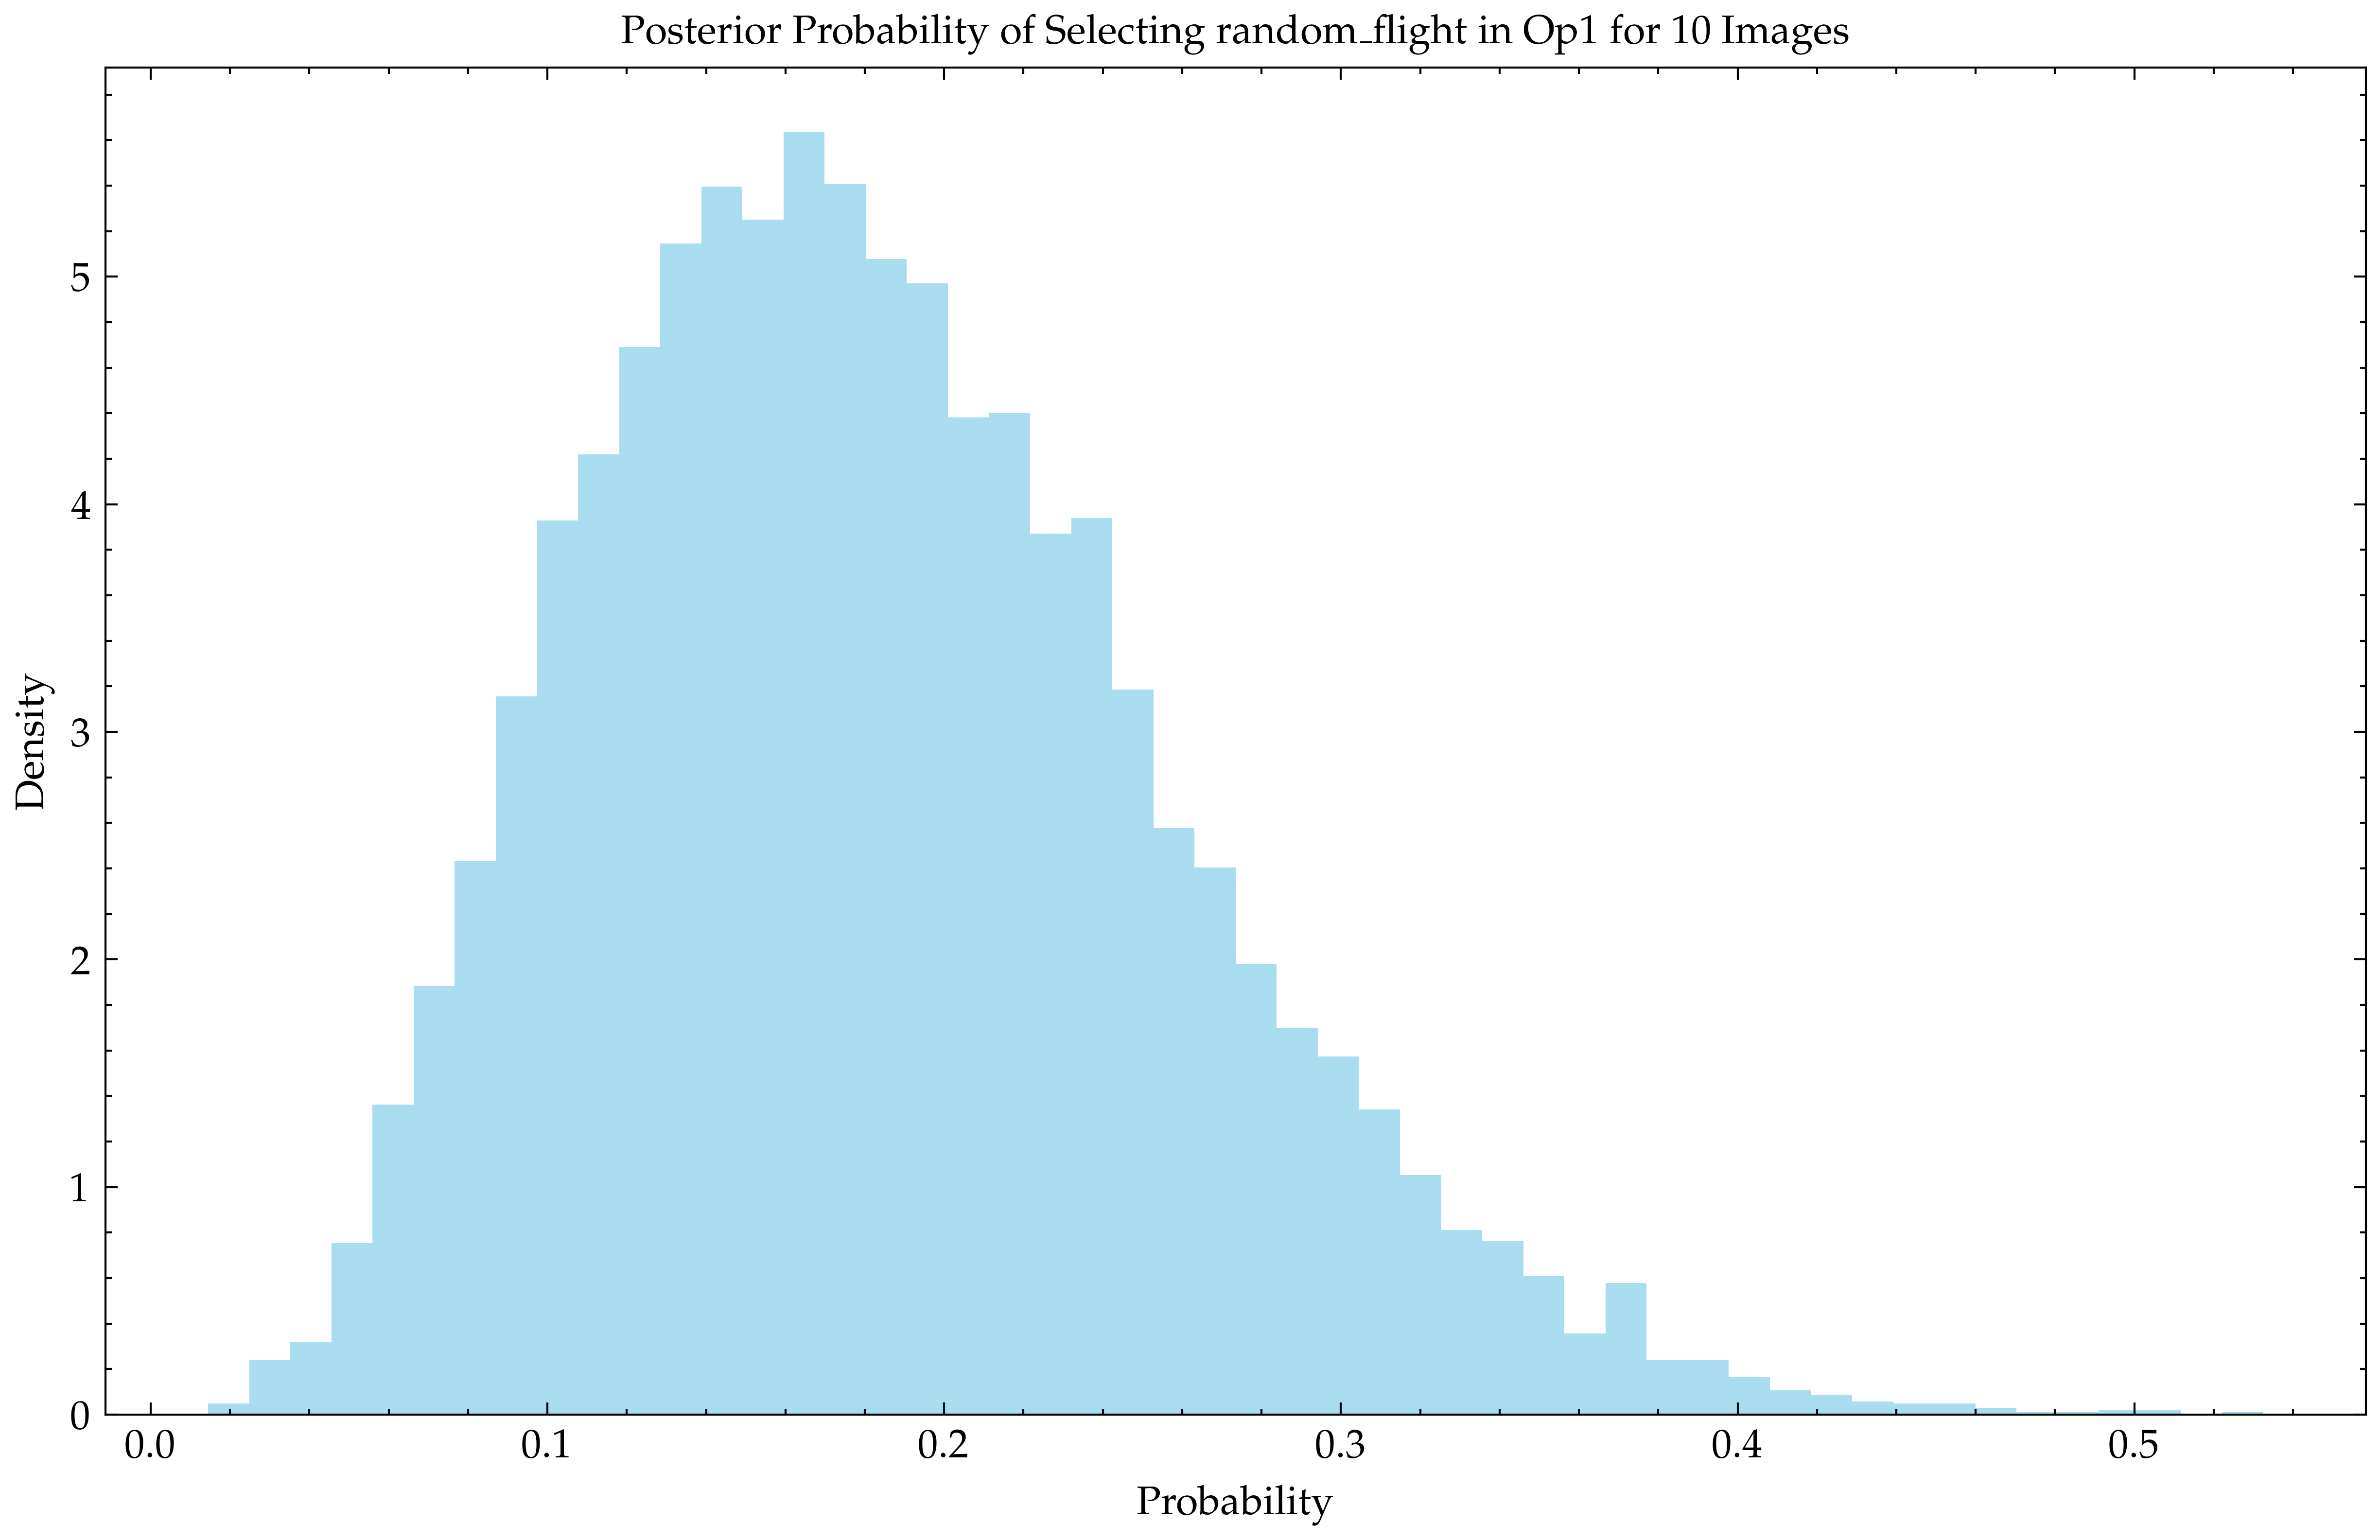

Posterior probability of selecting random_flight in Op1 for 10 images: 0.18


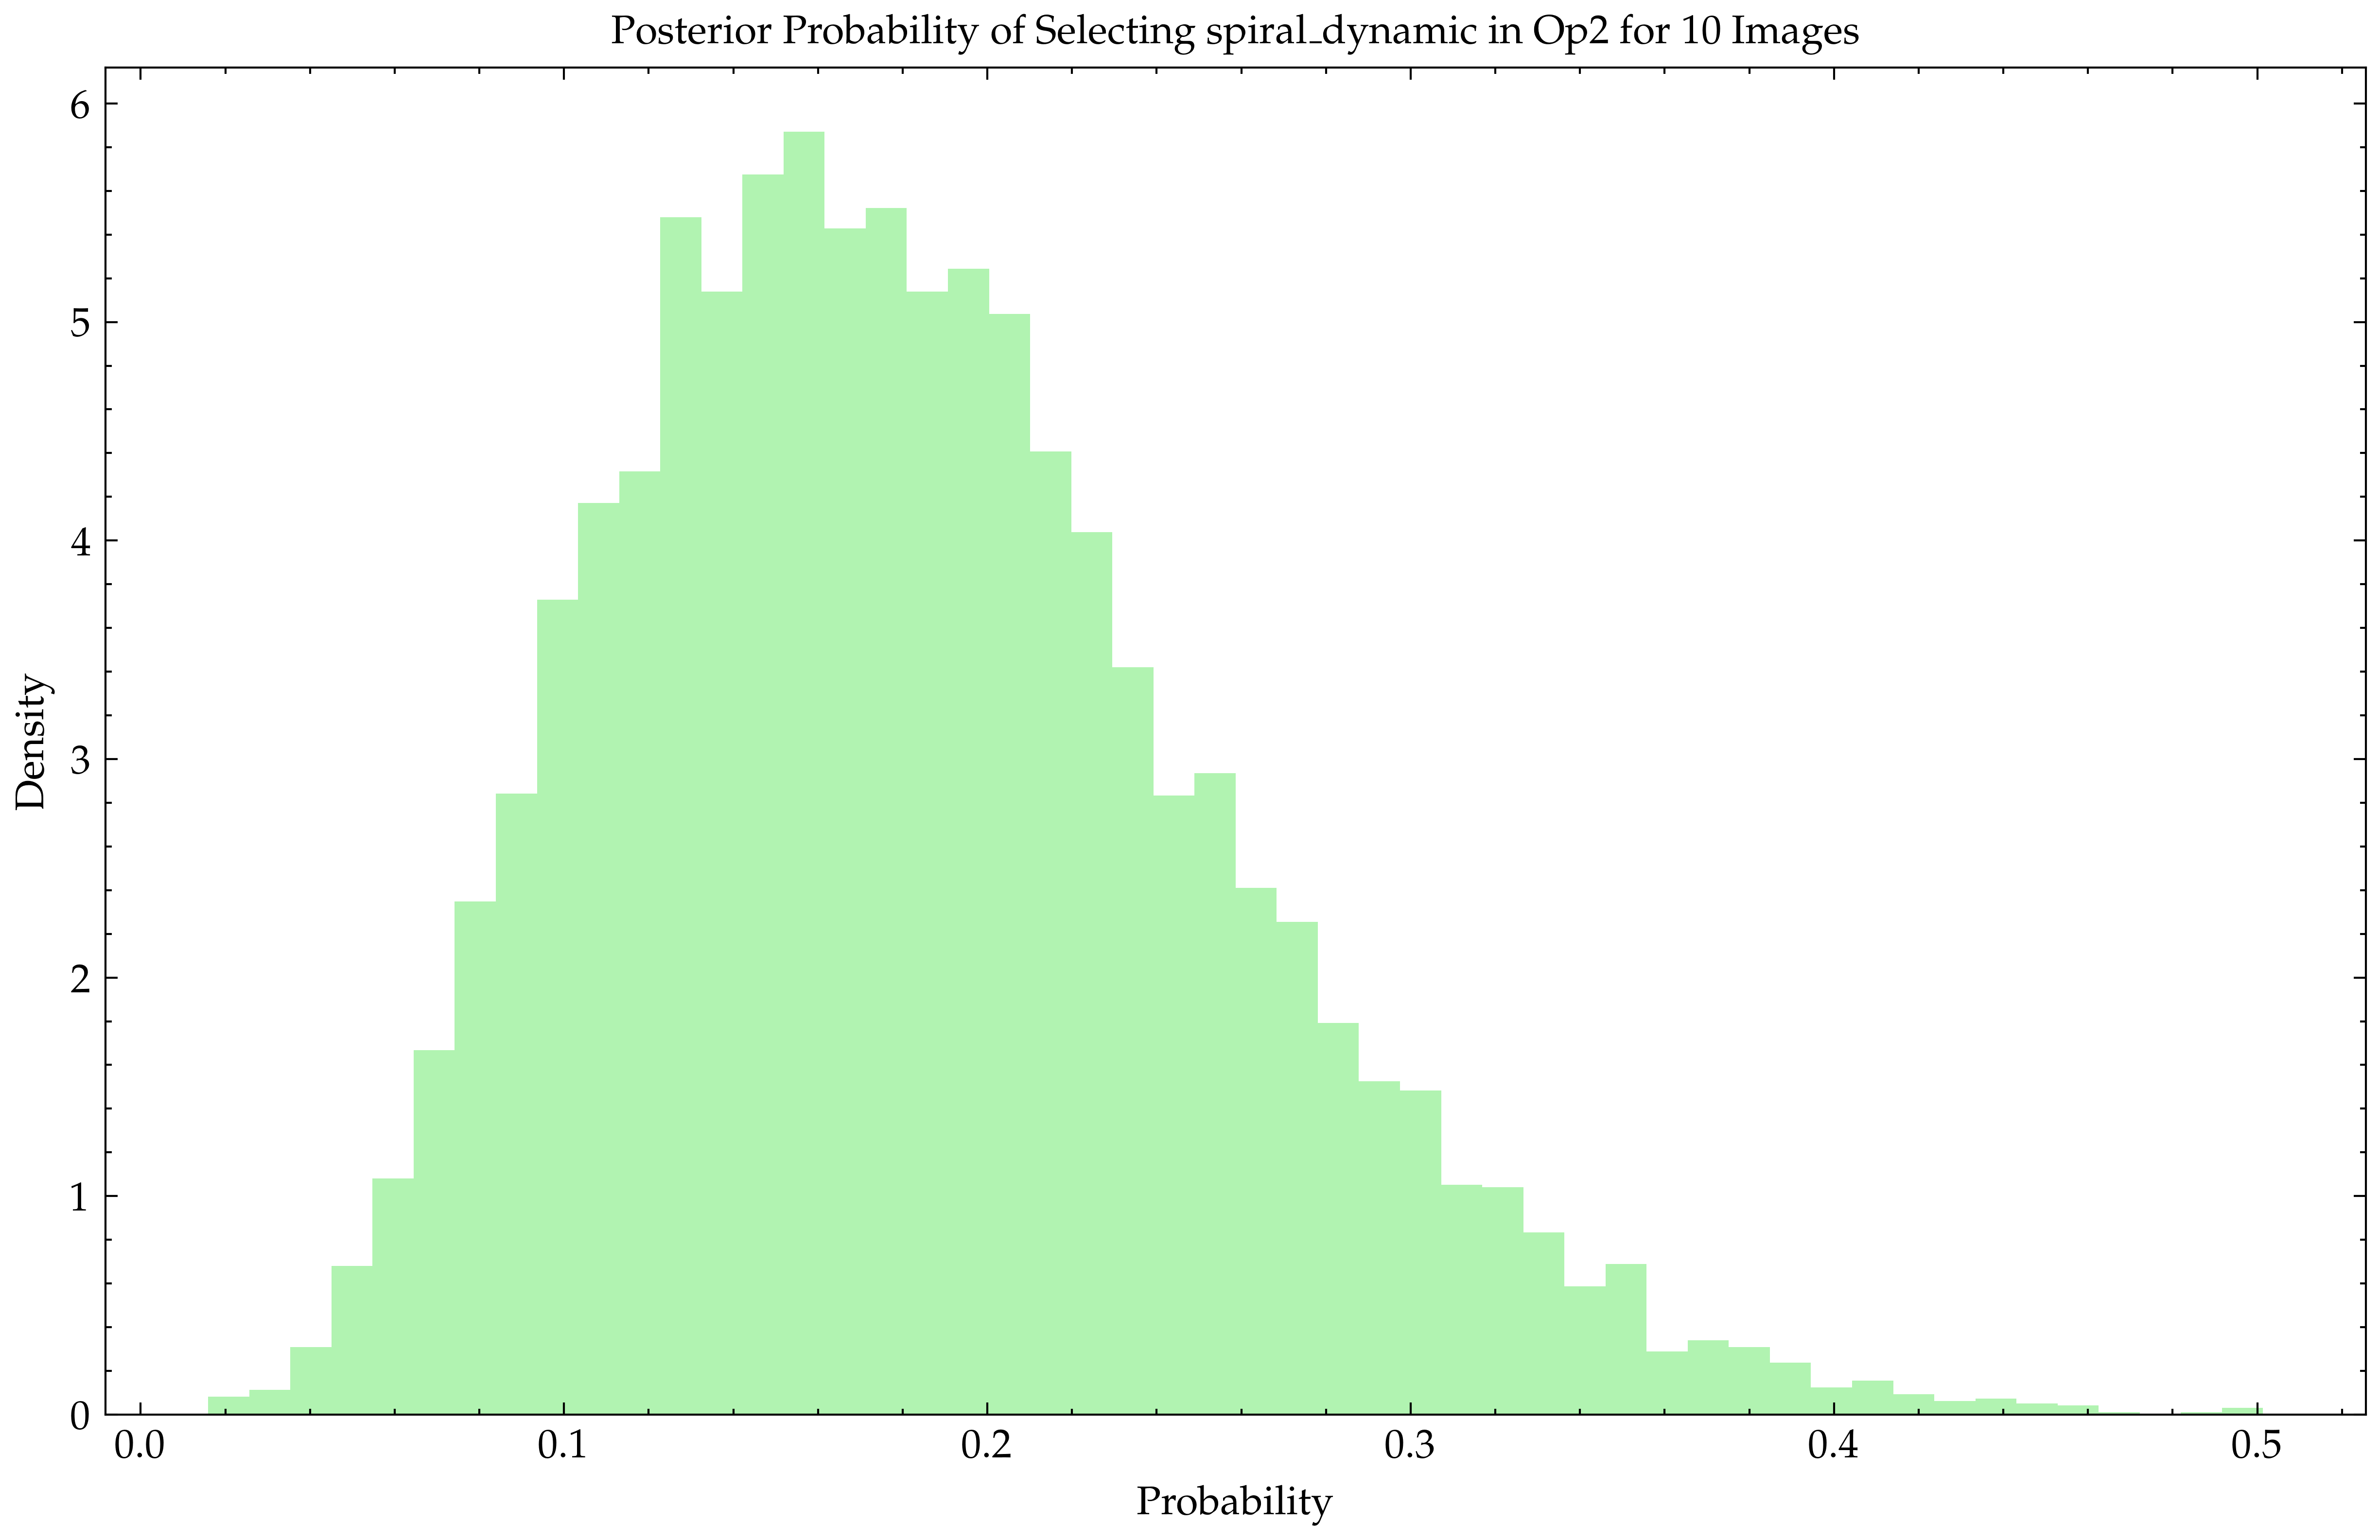

Posterior probability of selecting spiral_dynamic in Op2 for 10 images: 0.18


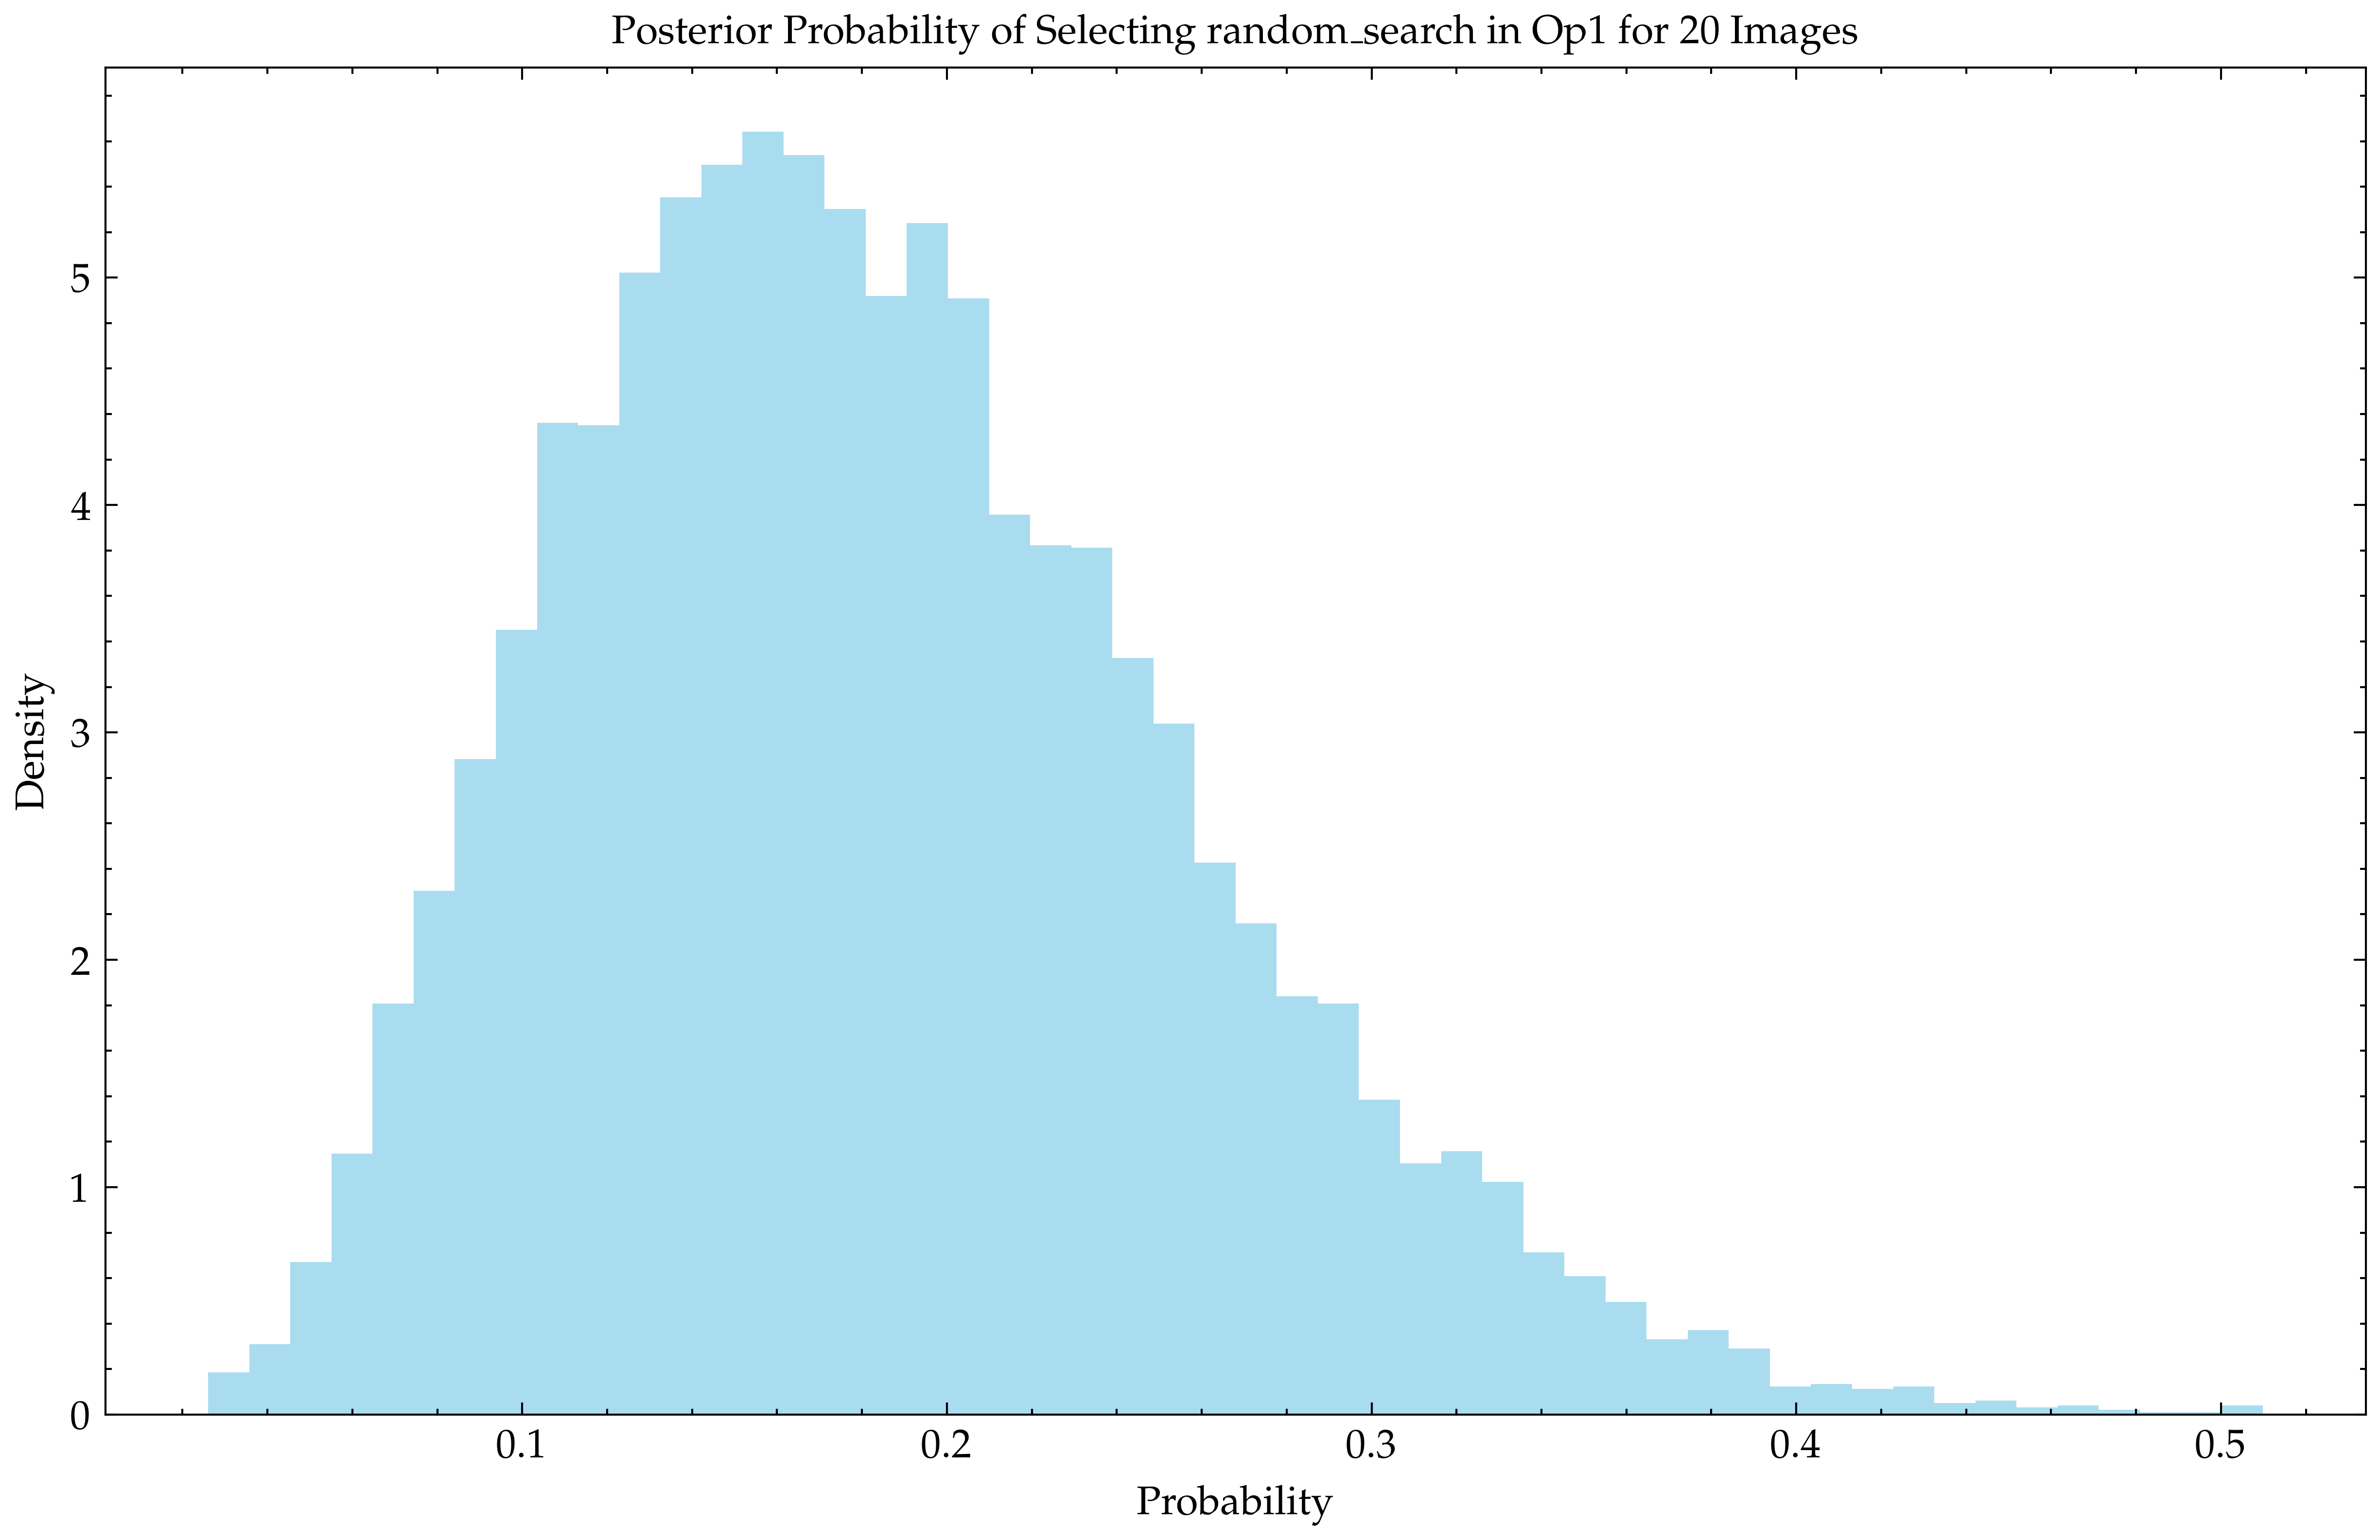

Posterior probability of selecting random_search in Op1 for 20 images: 0.19


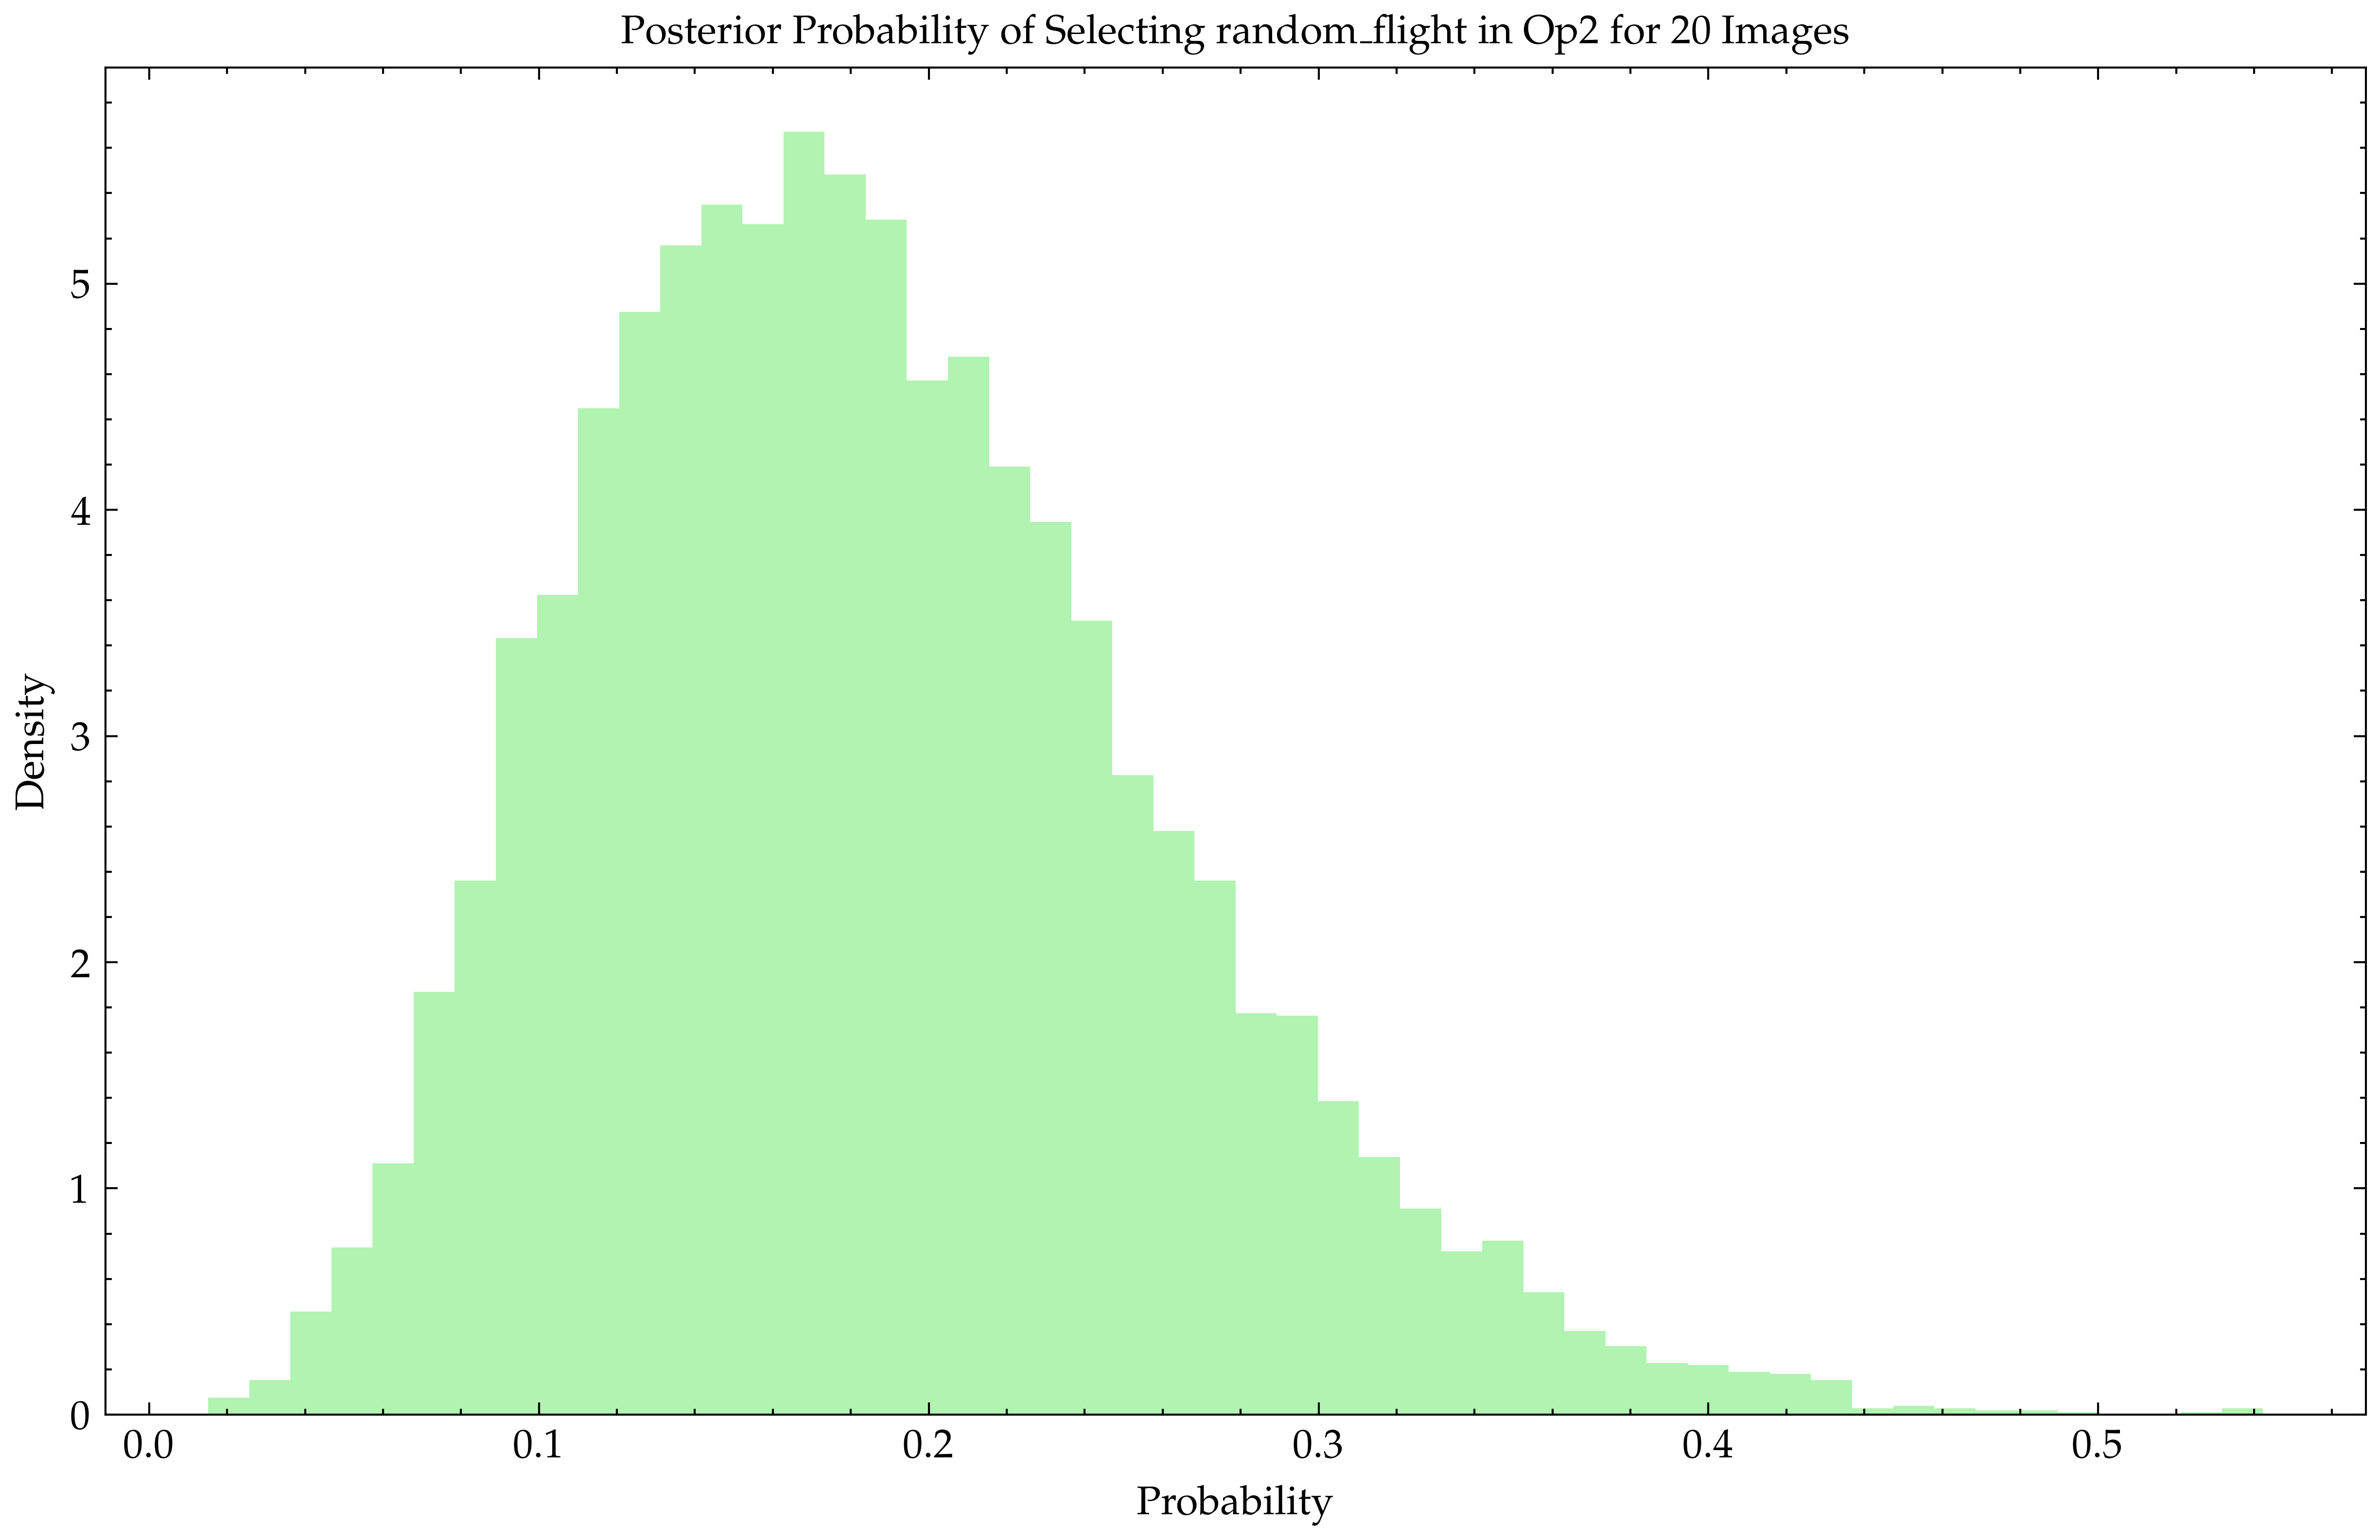

Posterior probability of selecting random_flight in Op2 for 20 images: 0.19


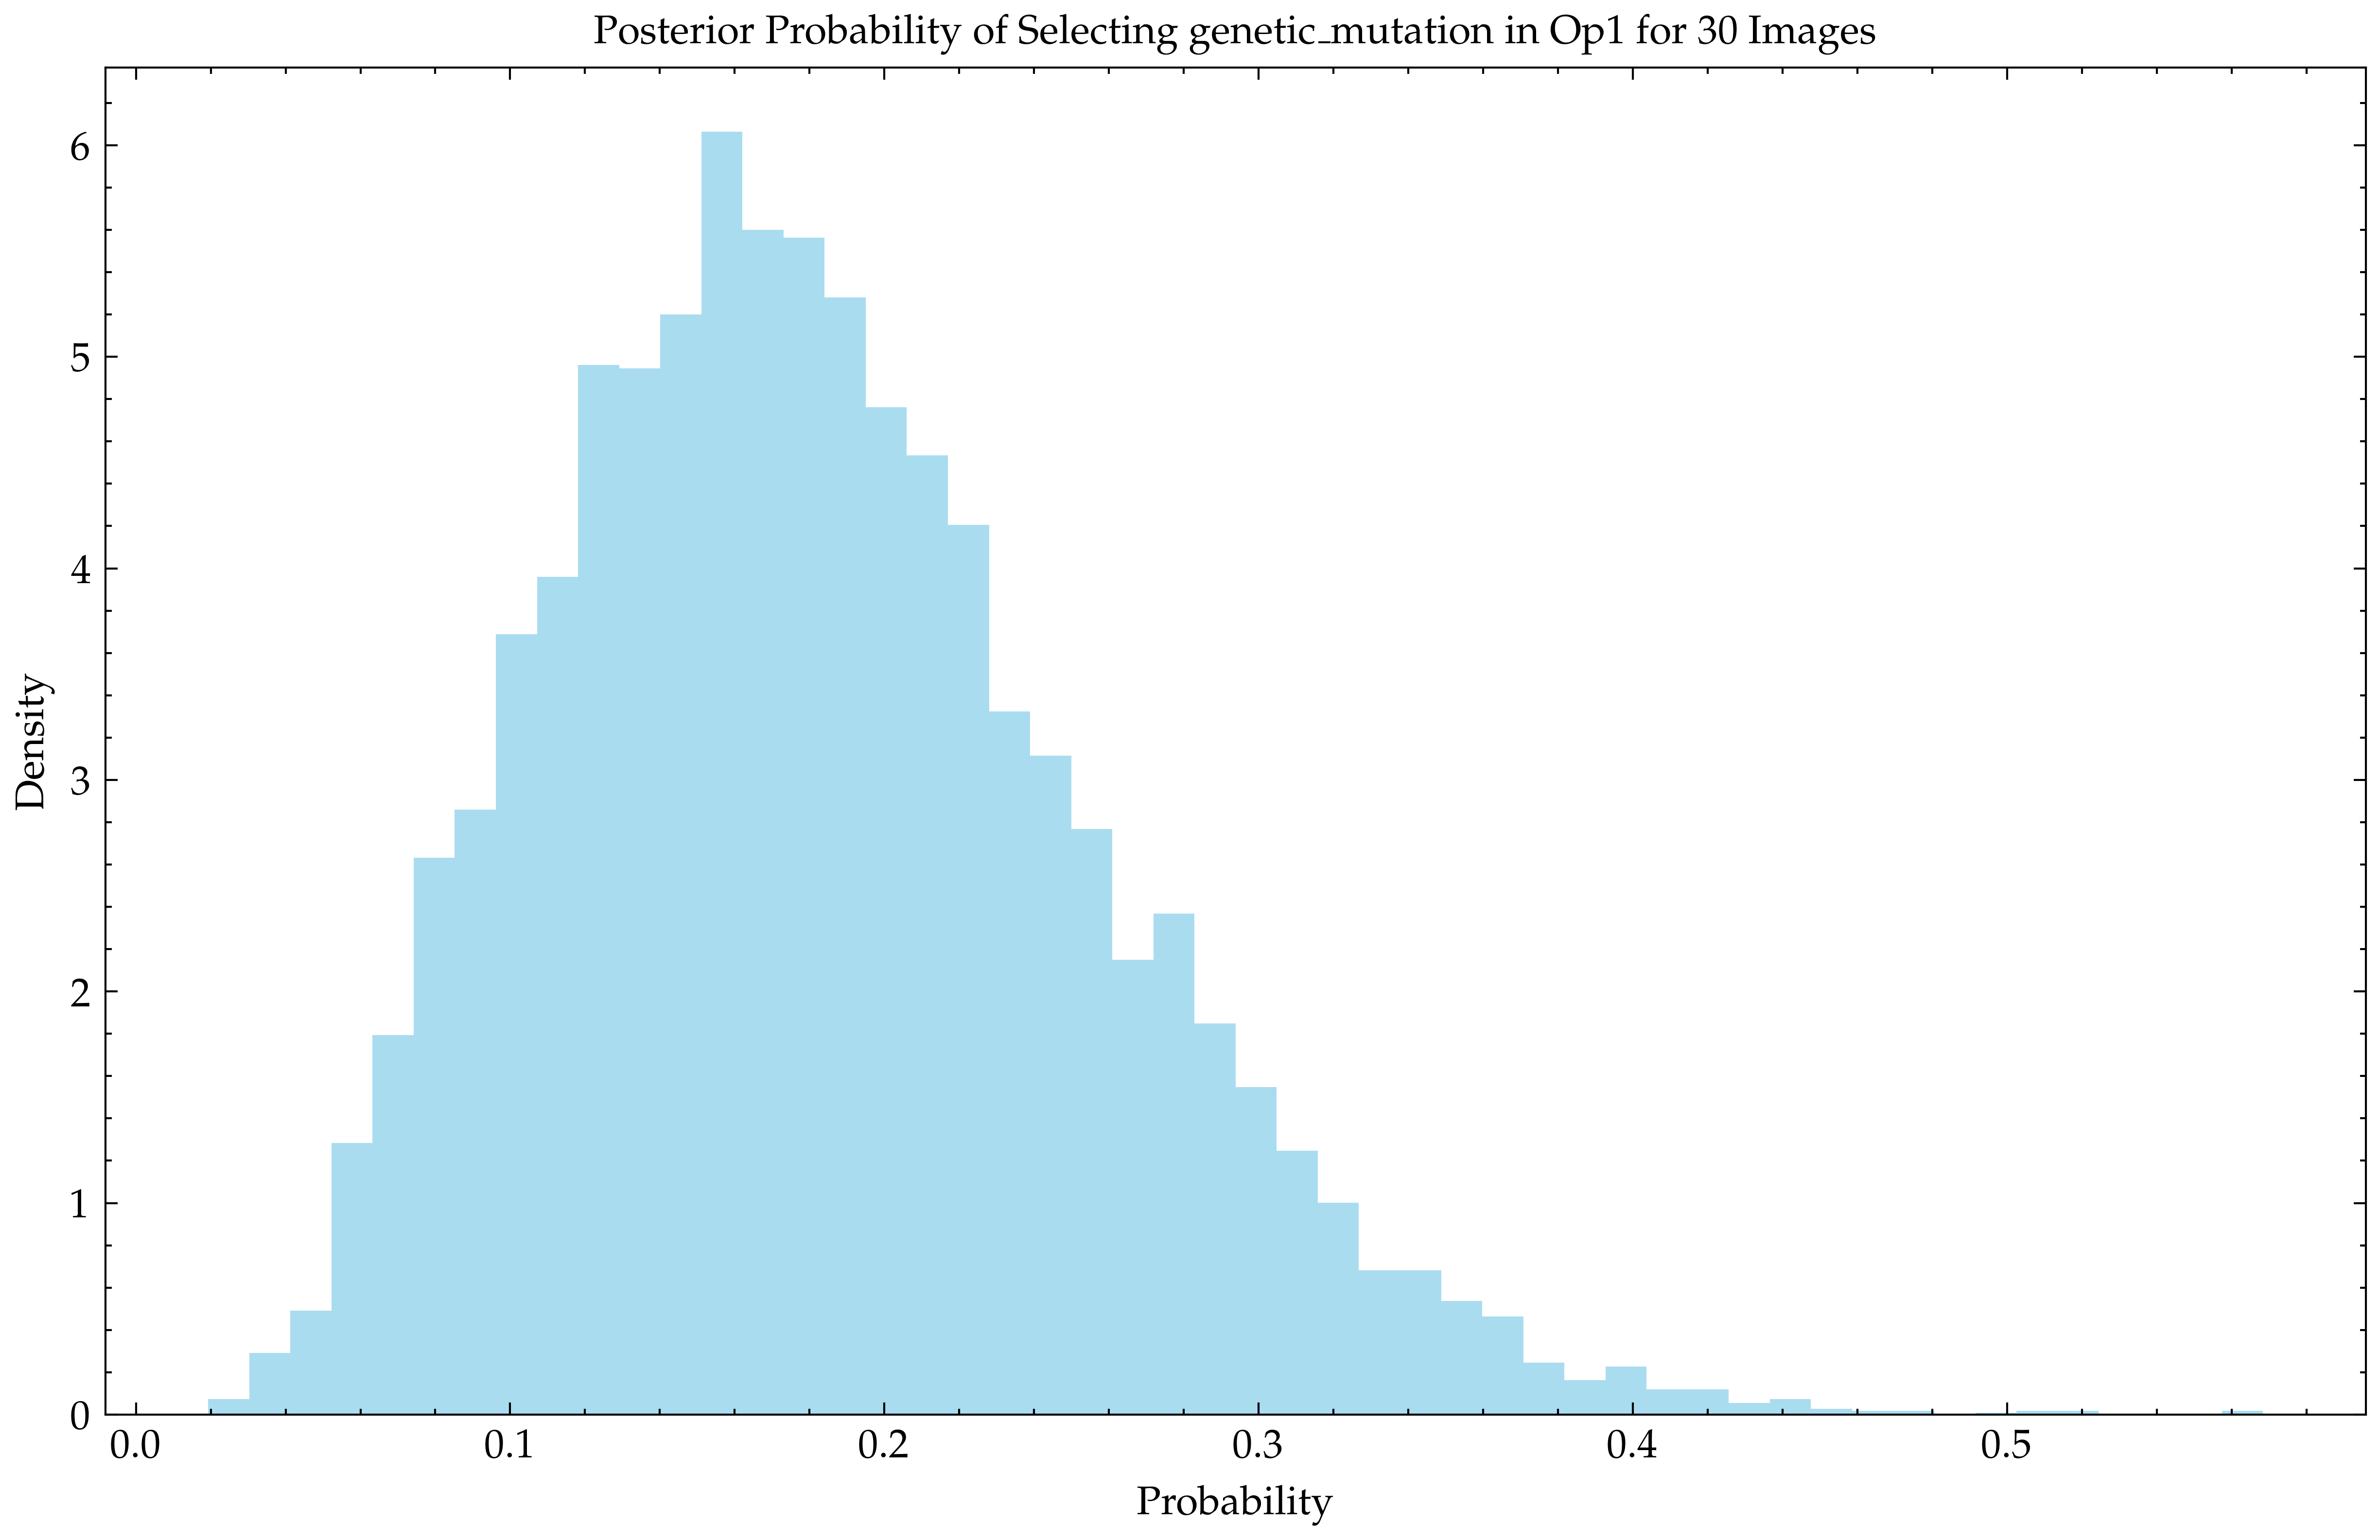

Posterior probability of selecting genetic_mutation in Op1 for 30 images: 0.18


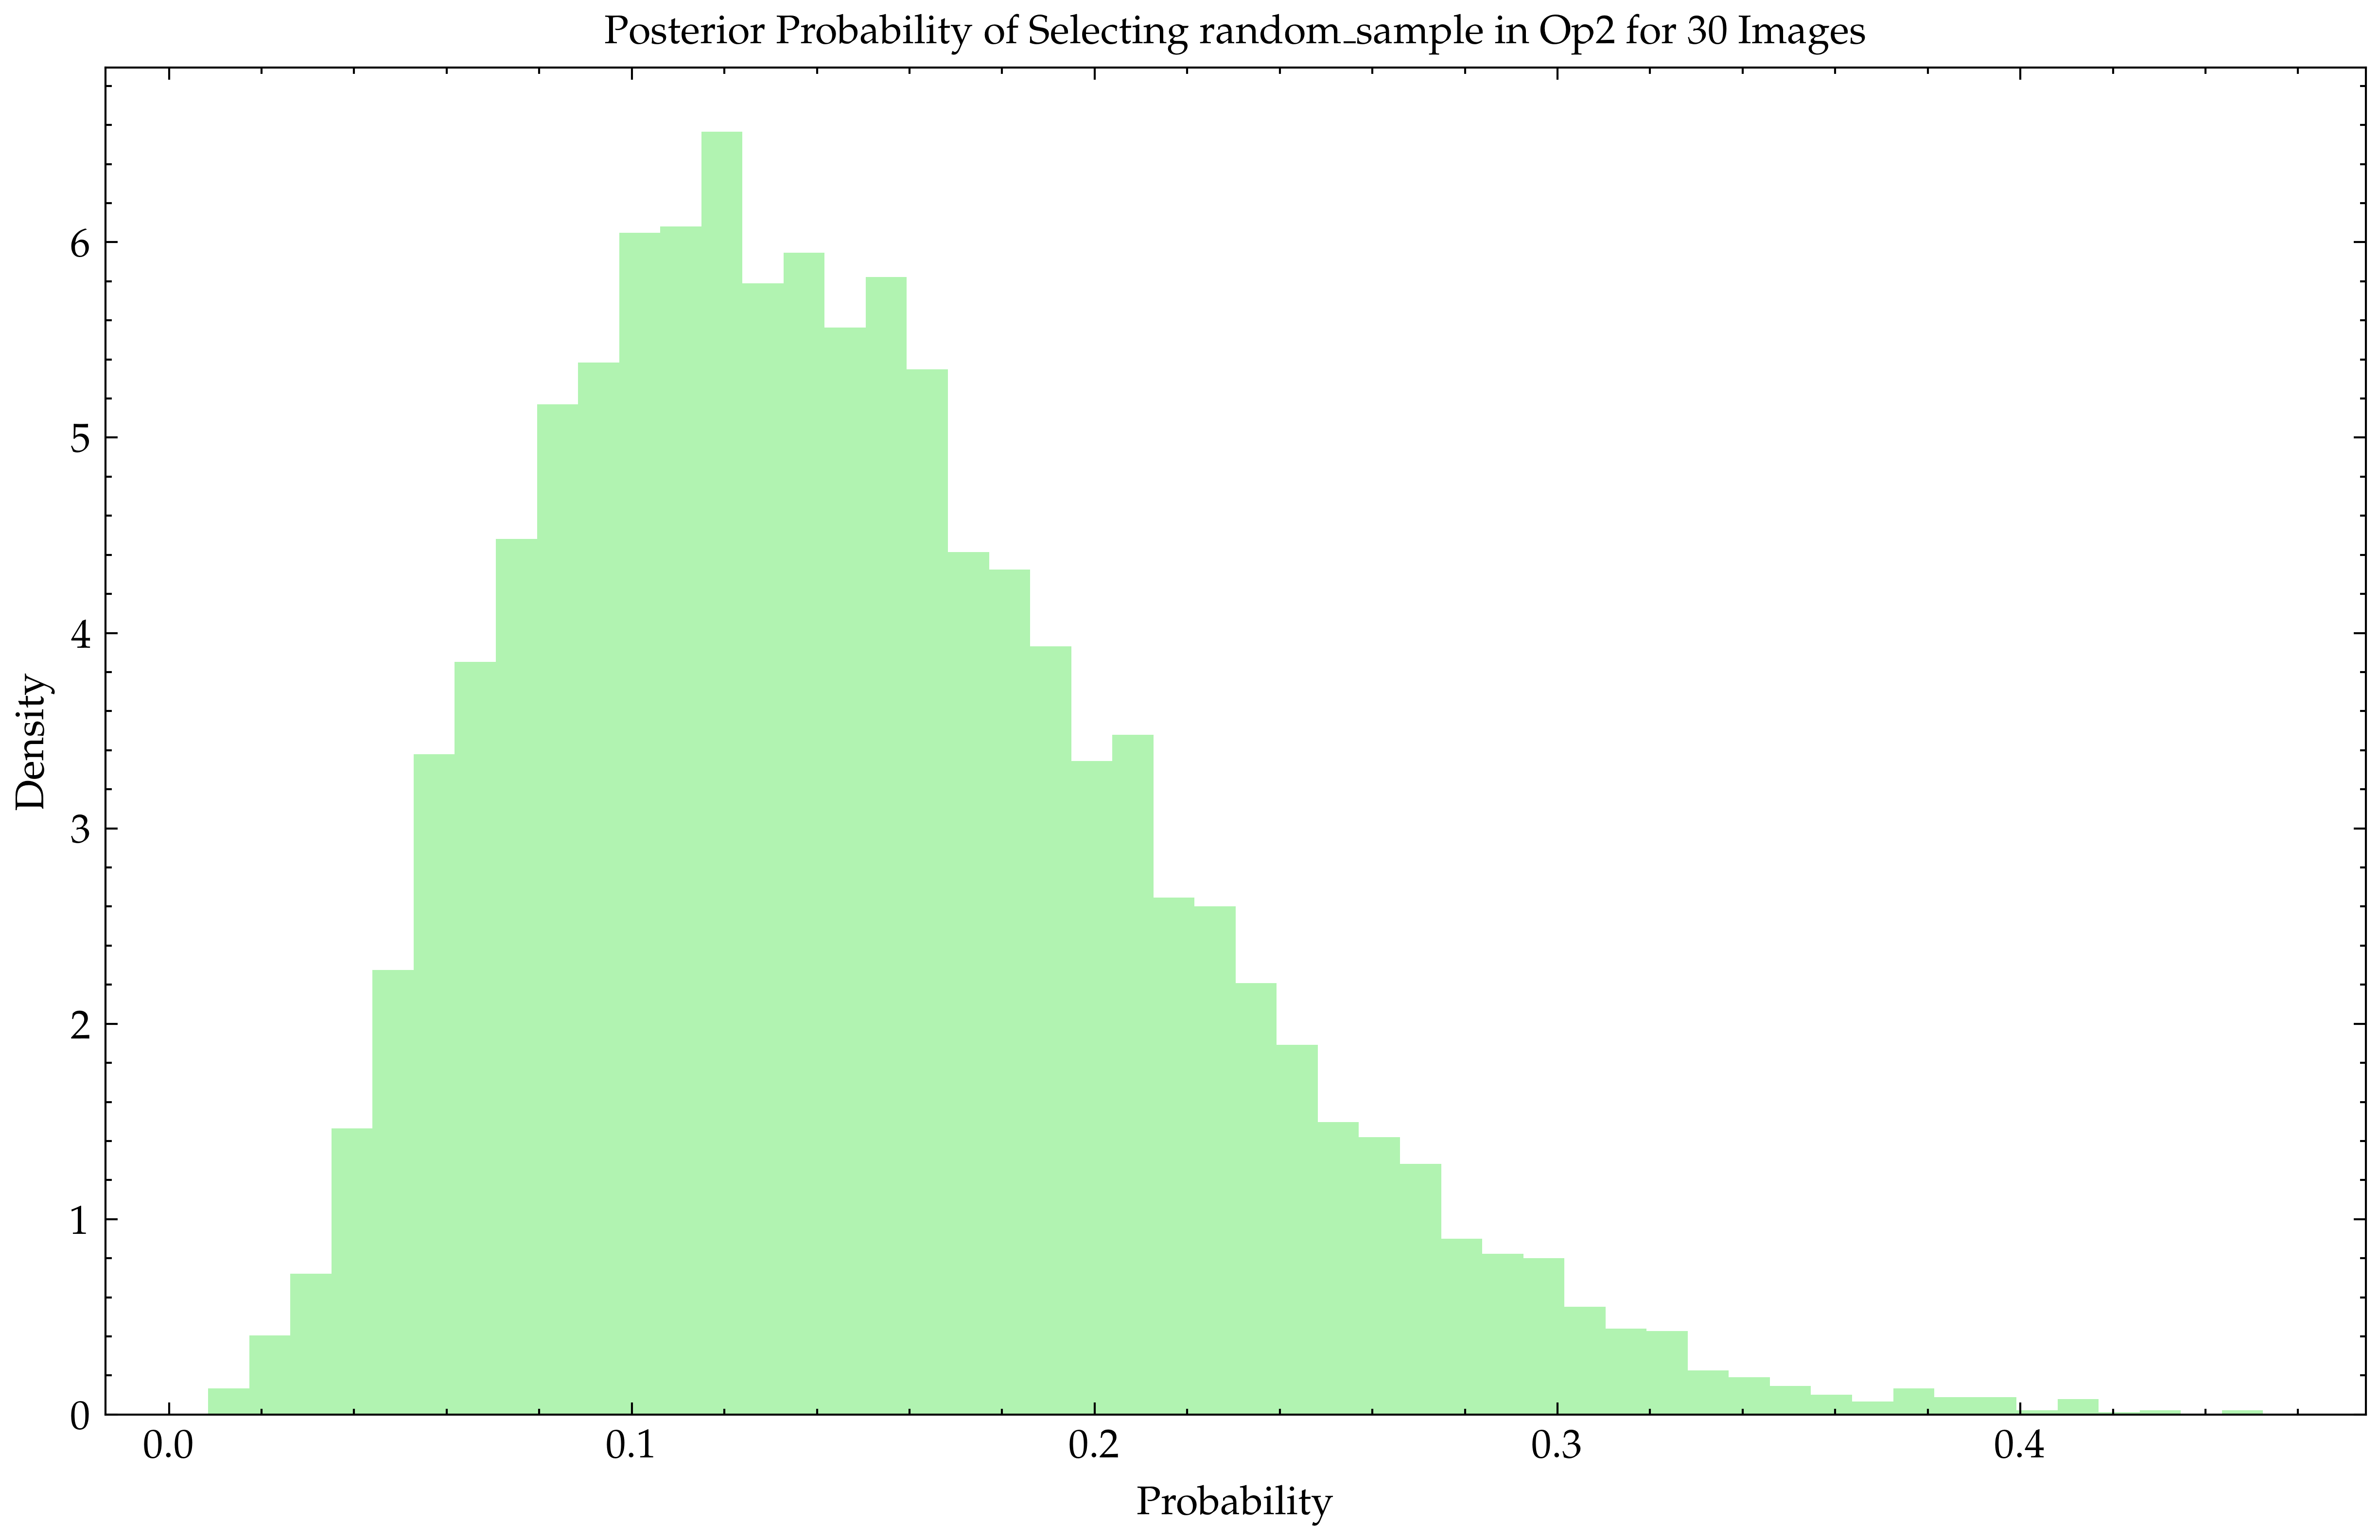

Posterior probability of selecting random_sample in Op2 for 30 images: 0.15


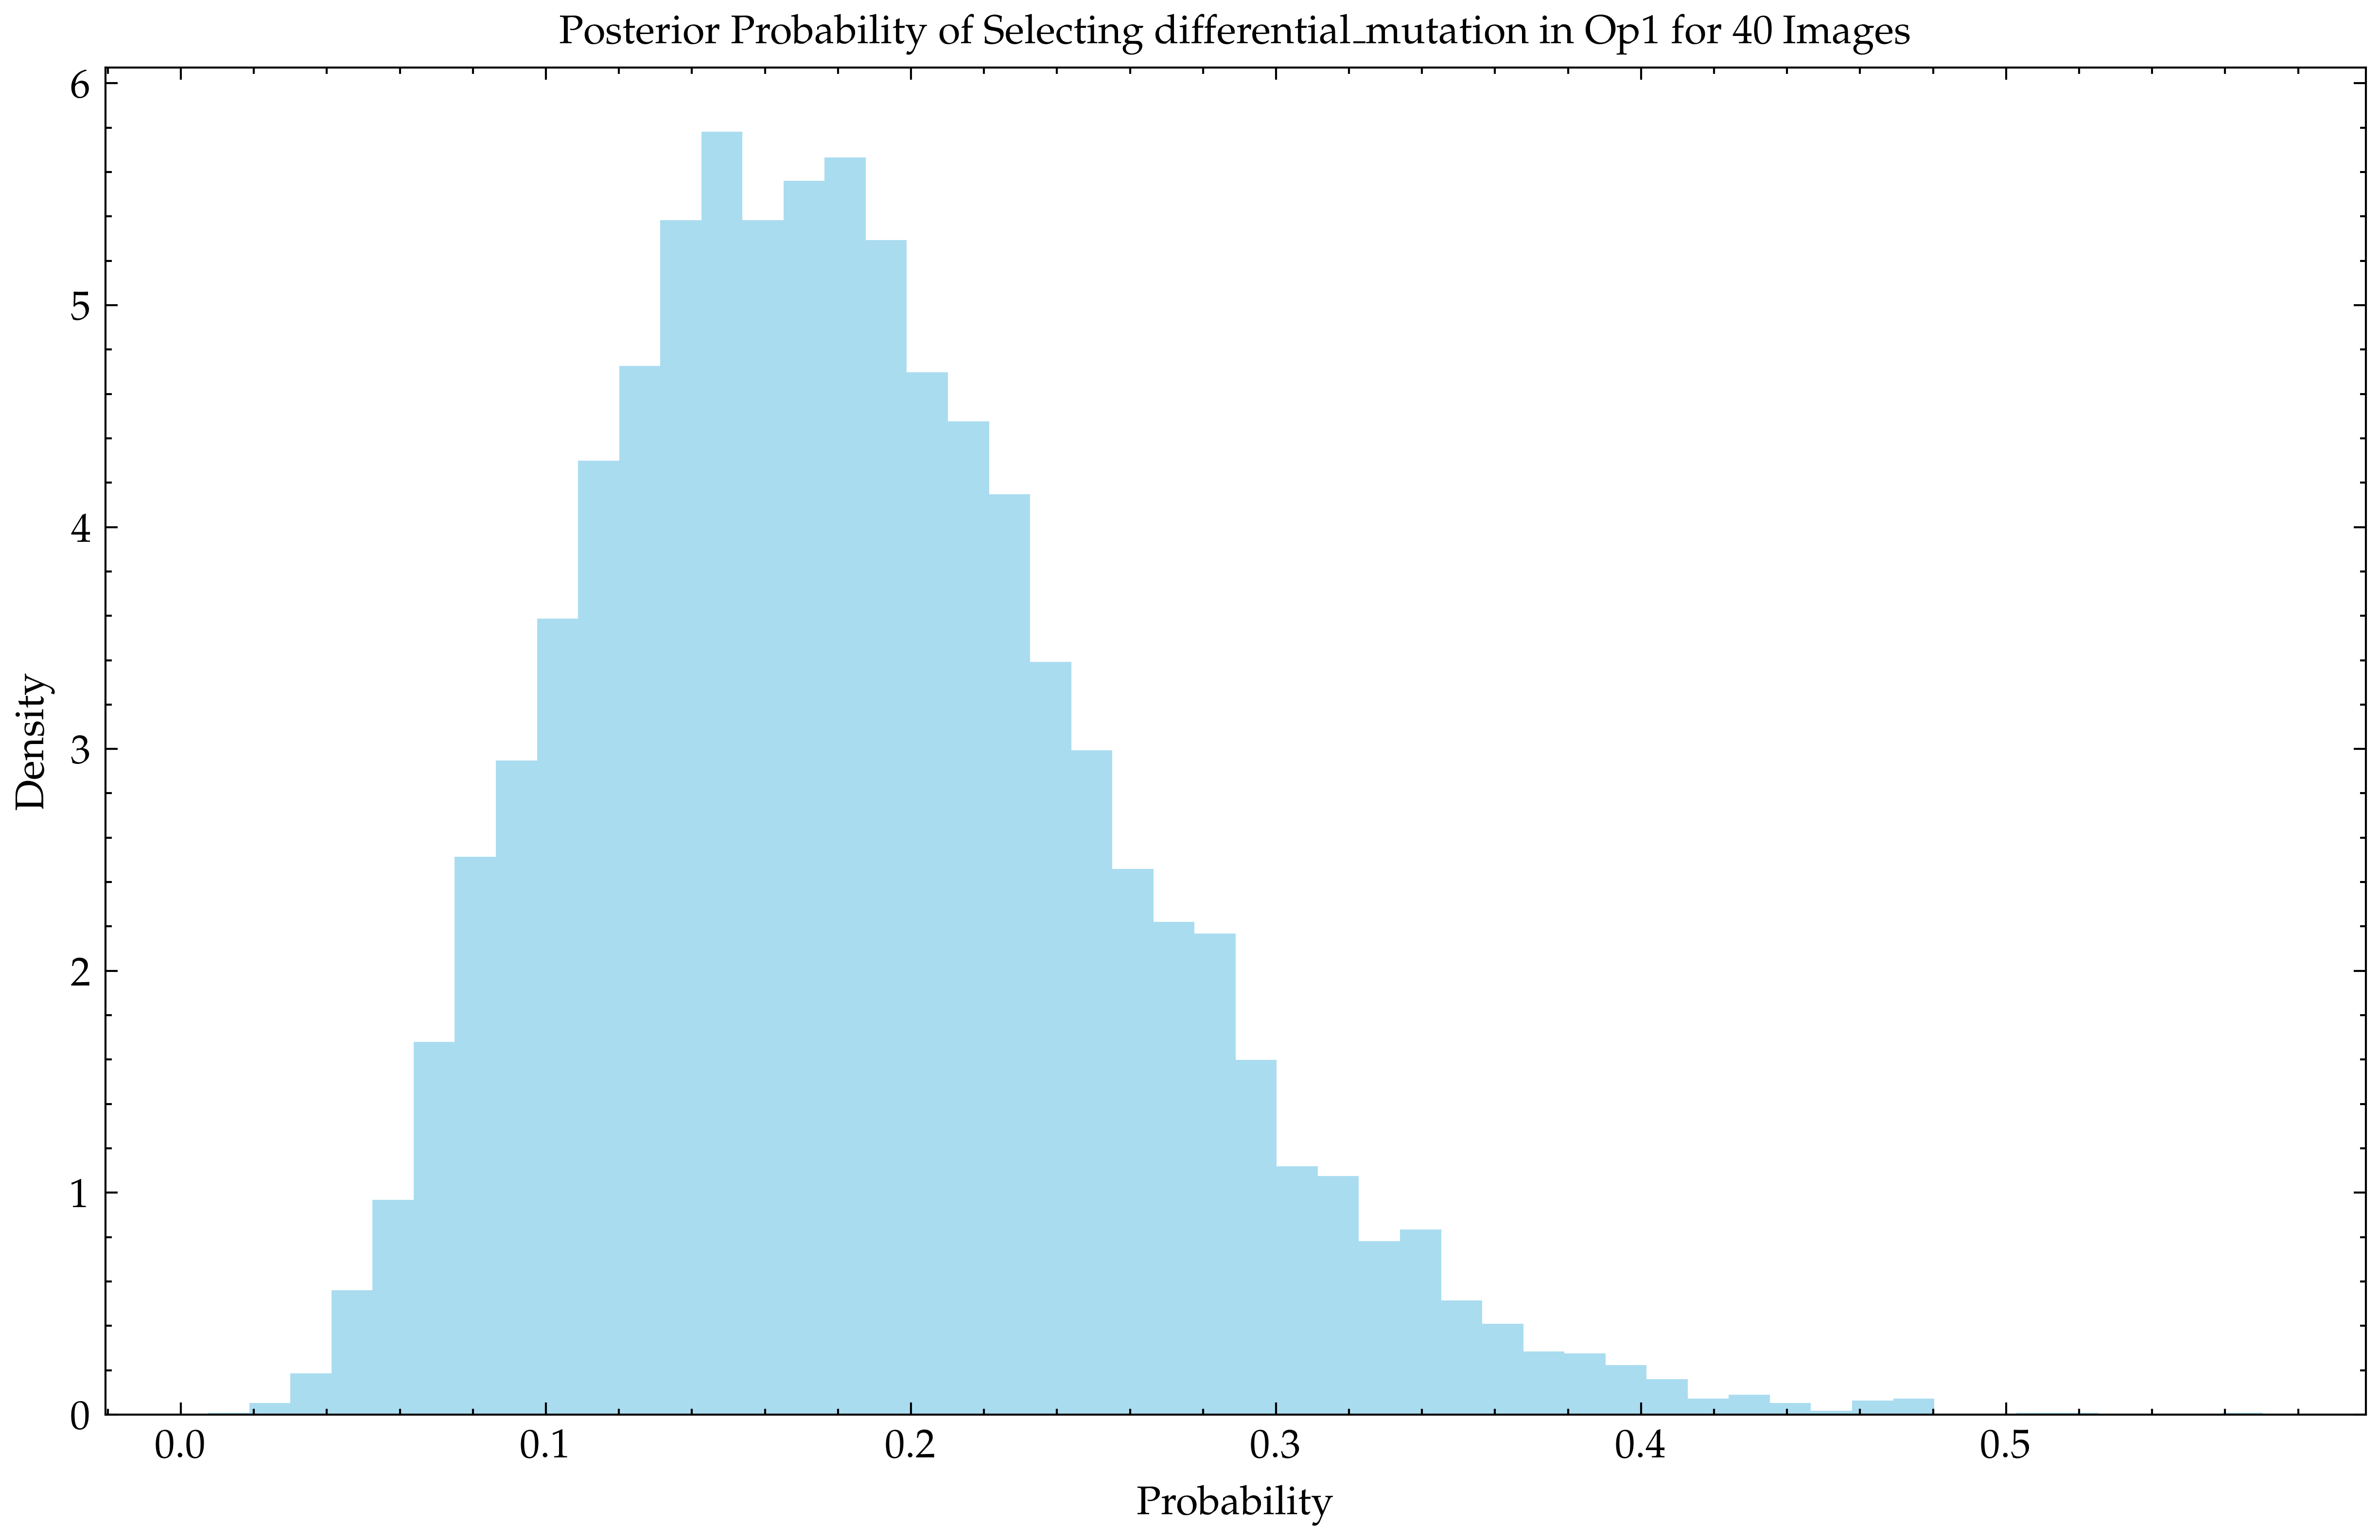

Posterior probability of selecting differential_mutation in Op1 for 40 images: 0.19


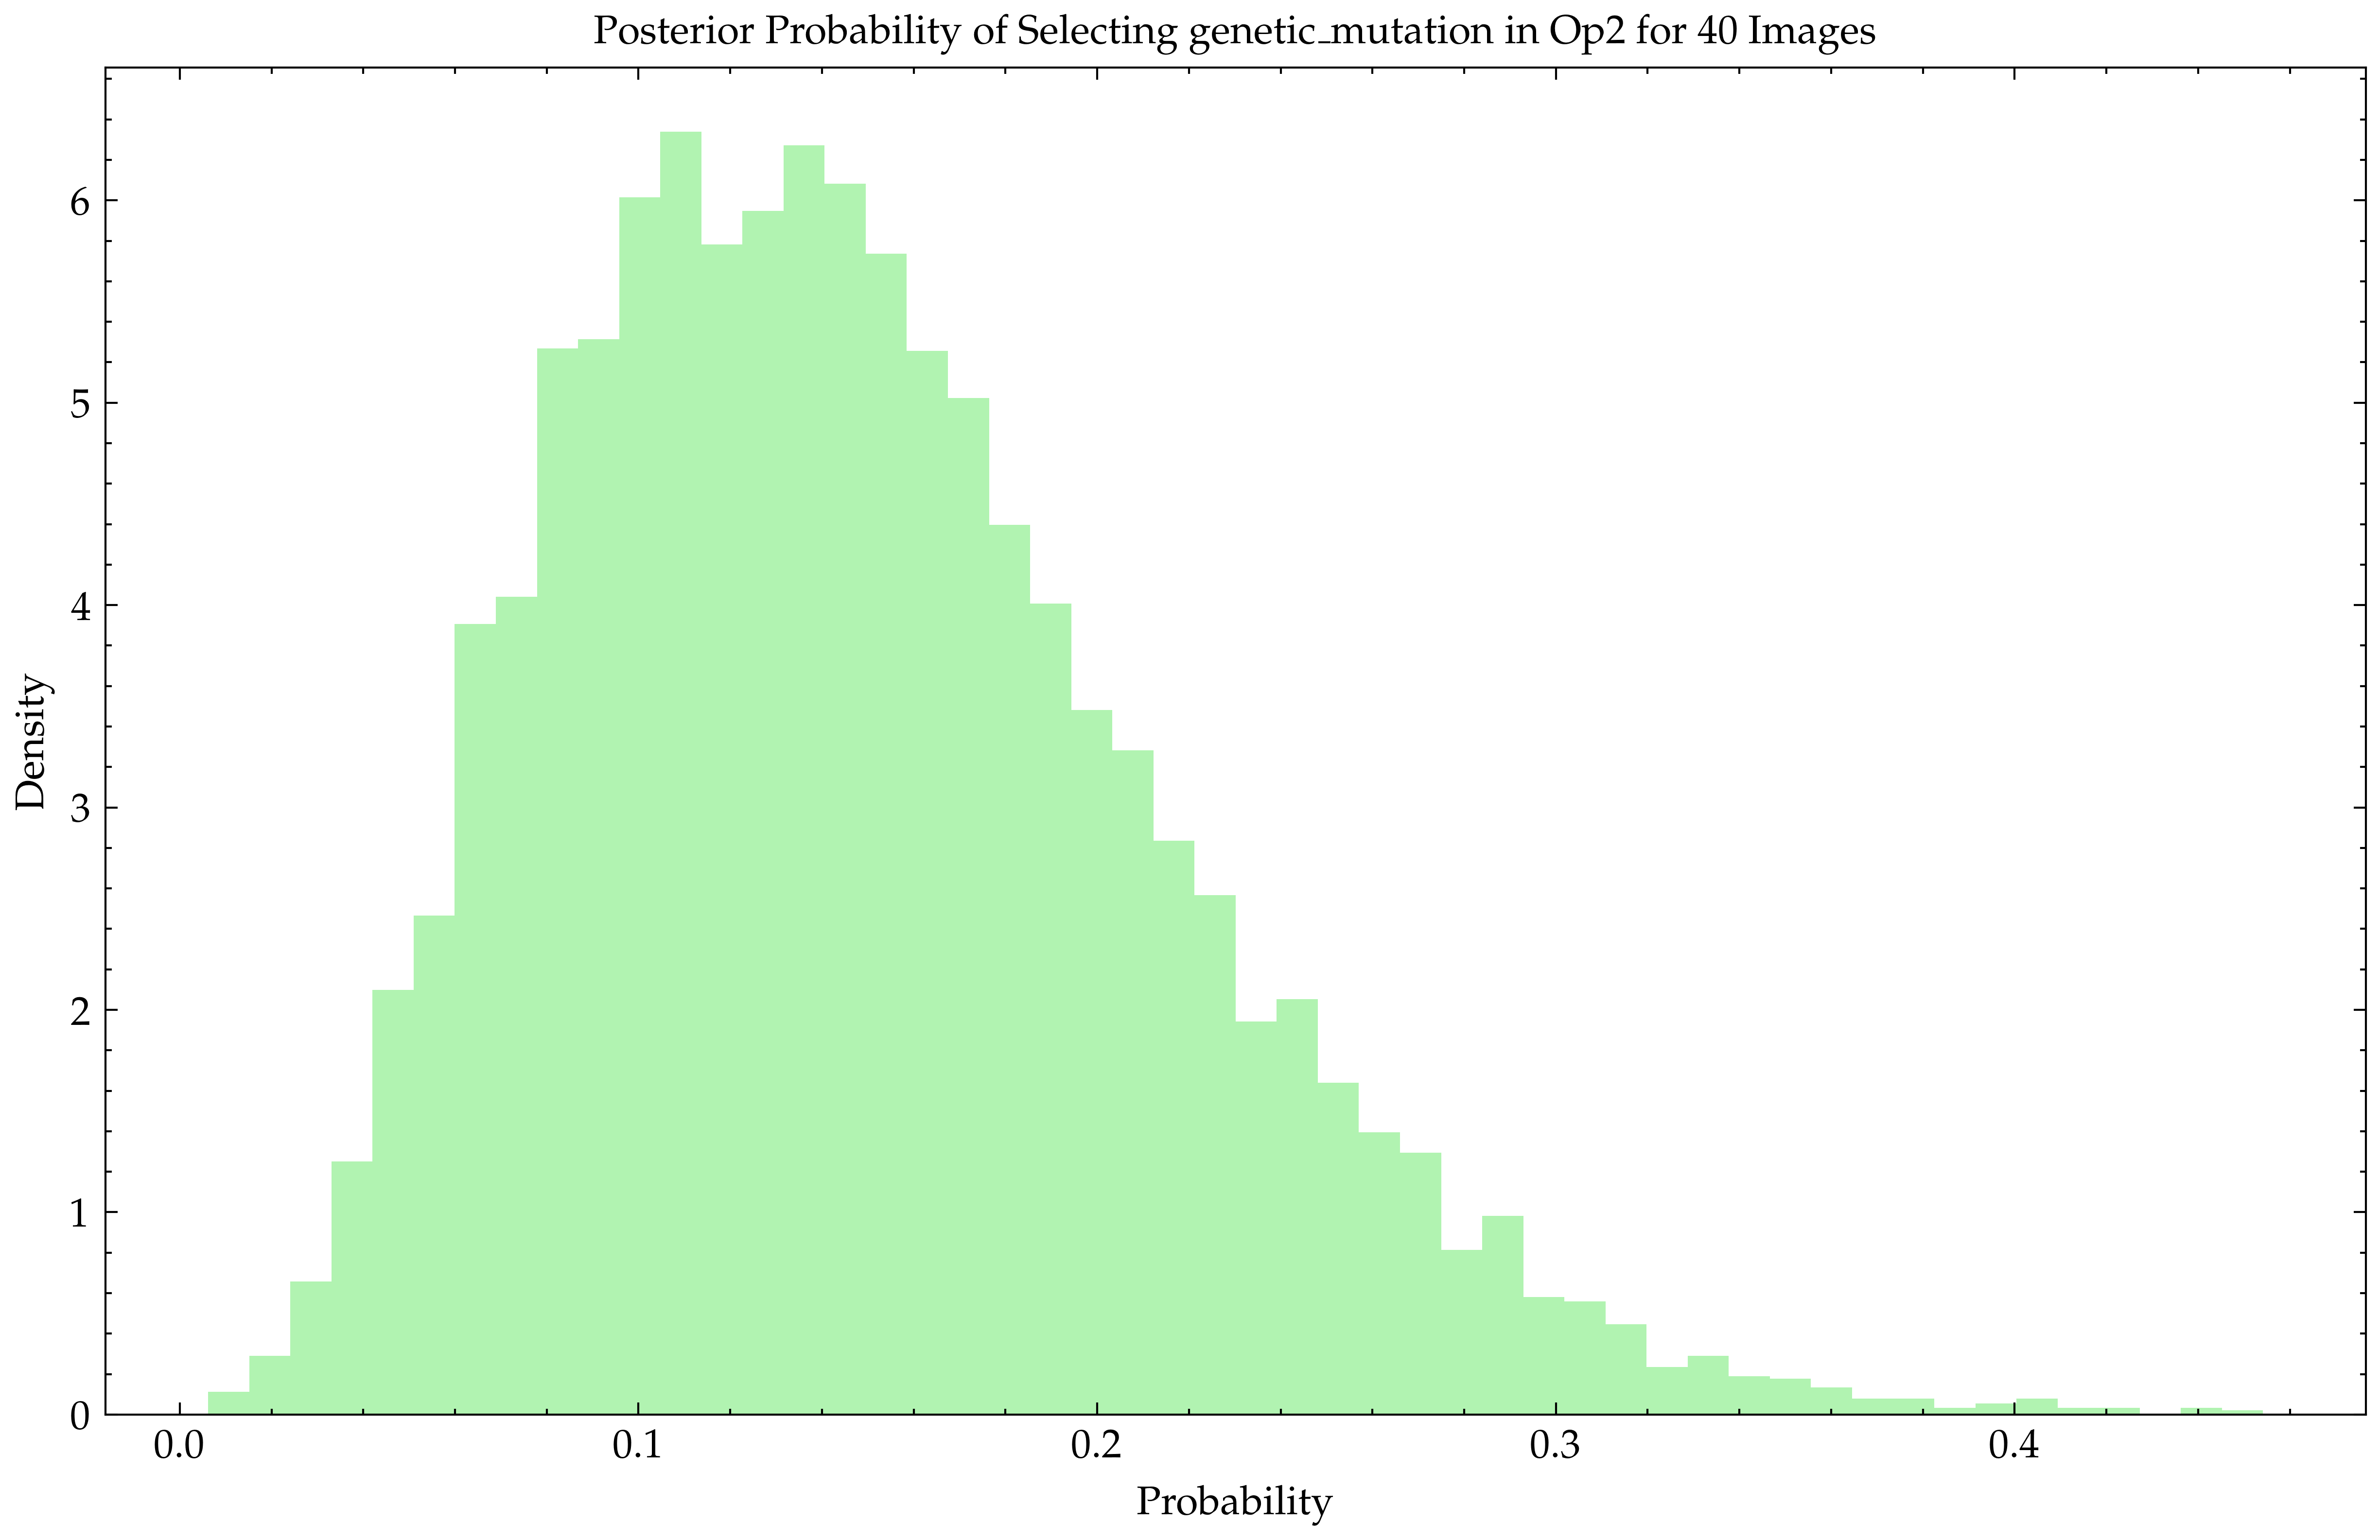

Posterior probability of selecting genetic_mutation in Op2 for 40 images: 0.15


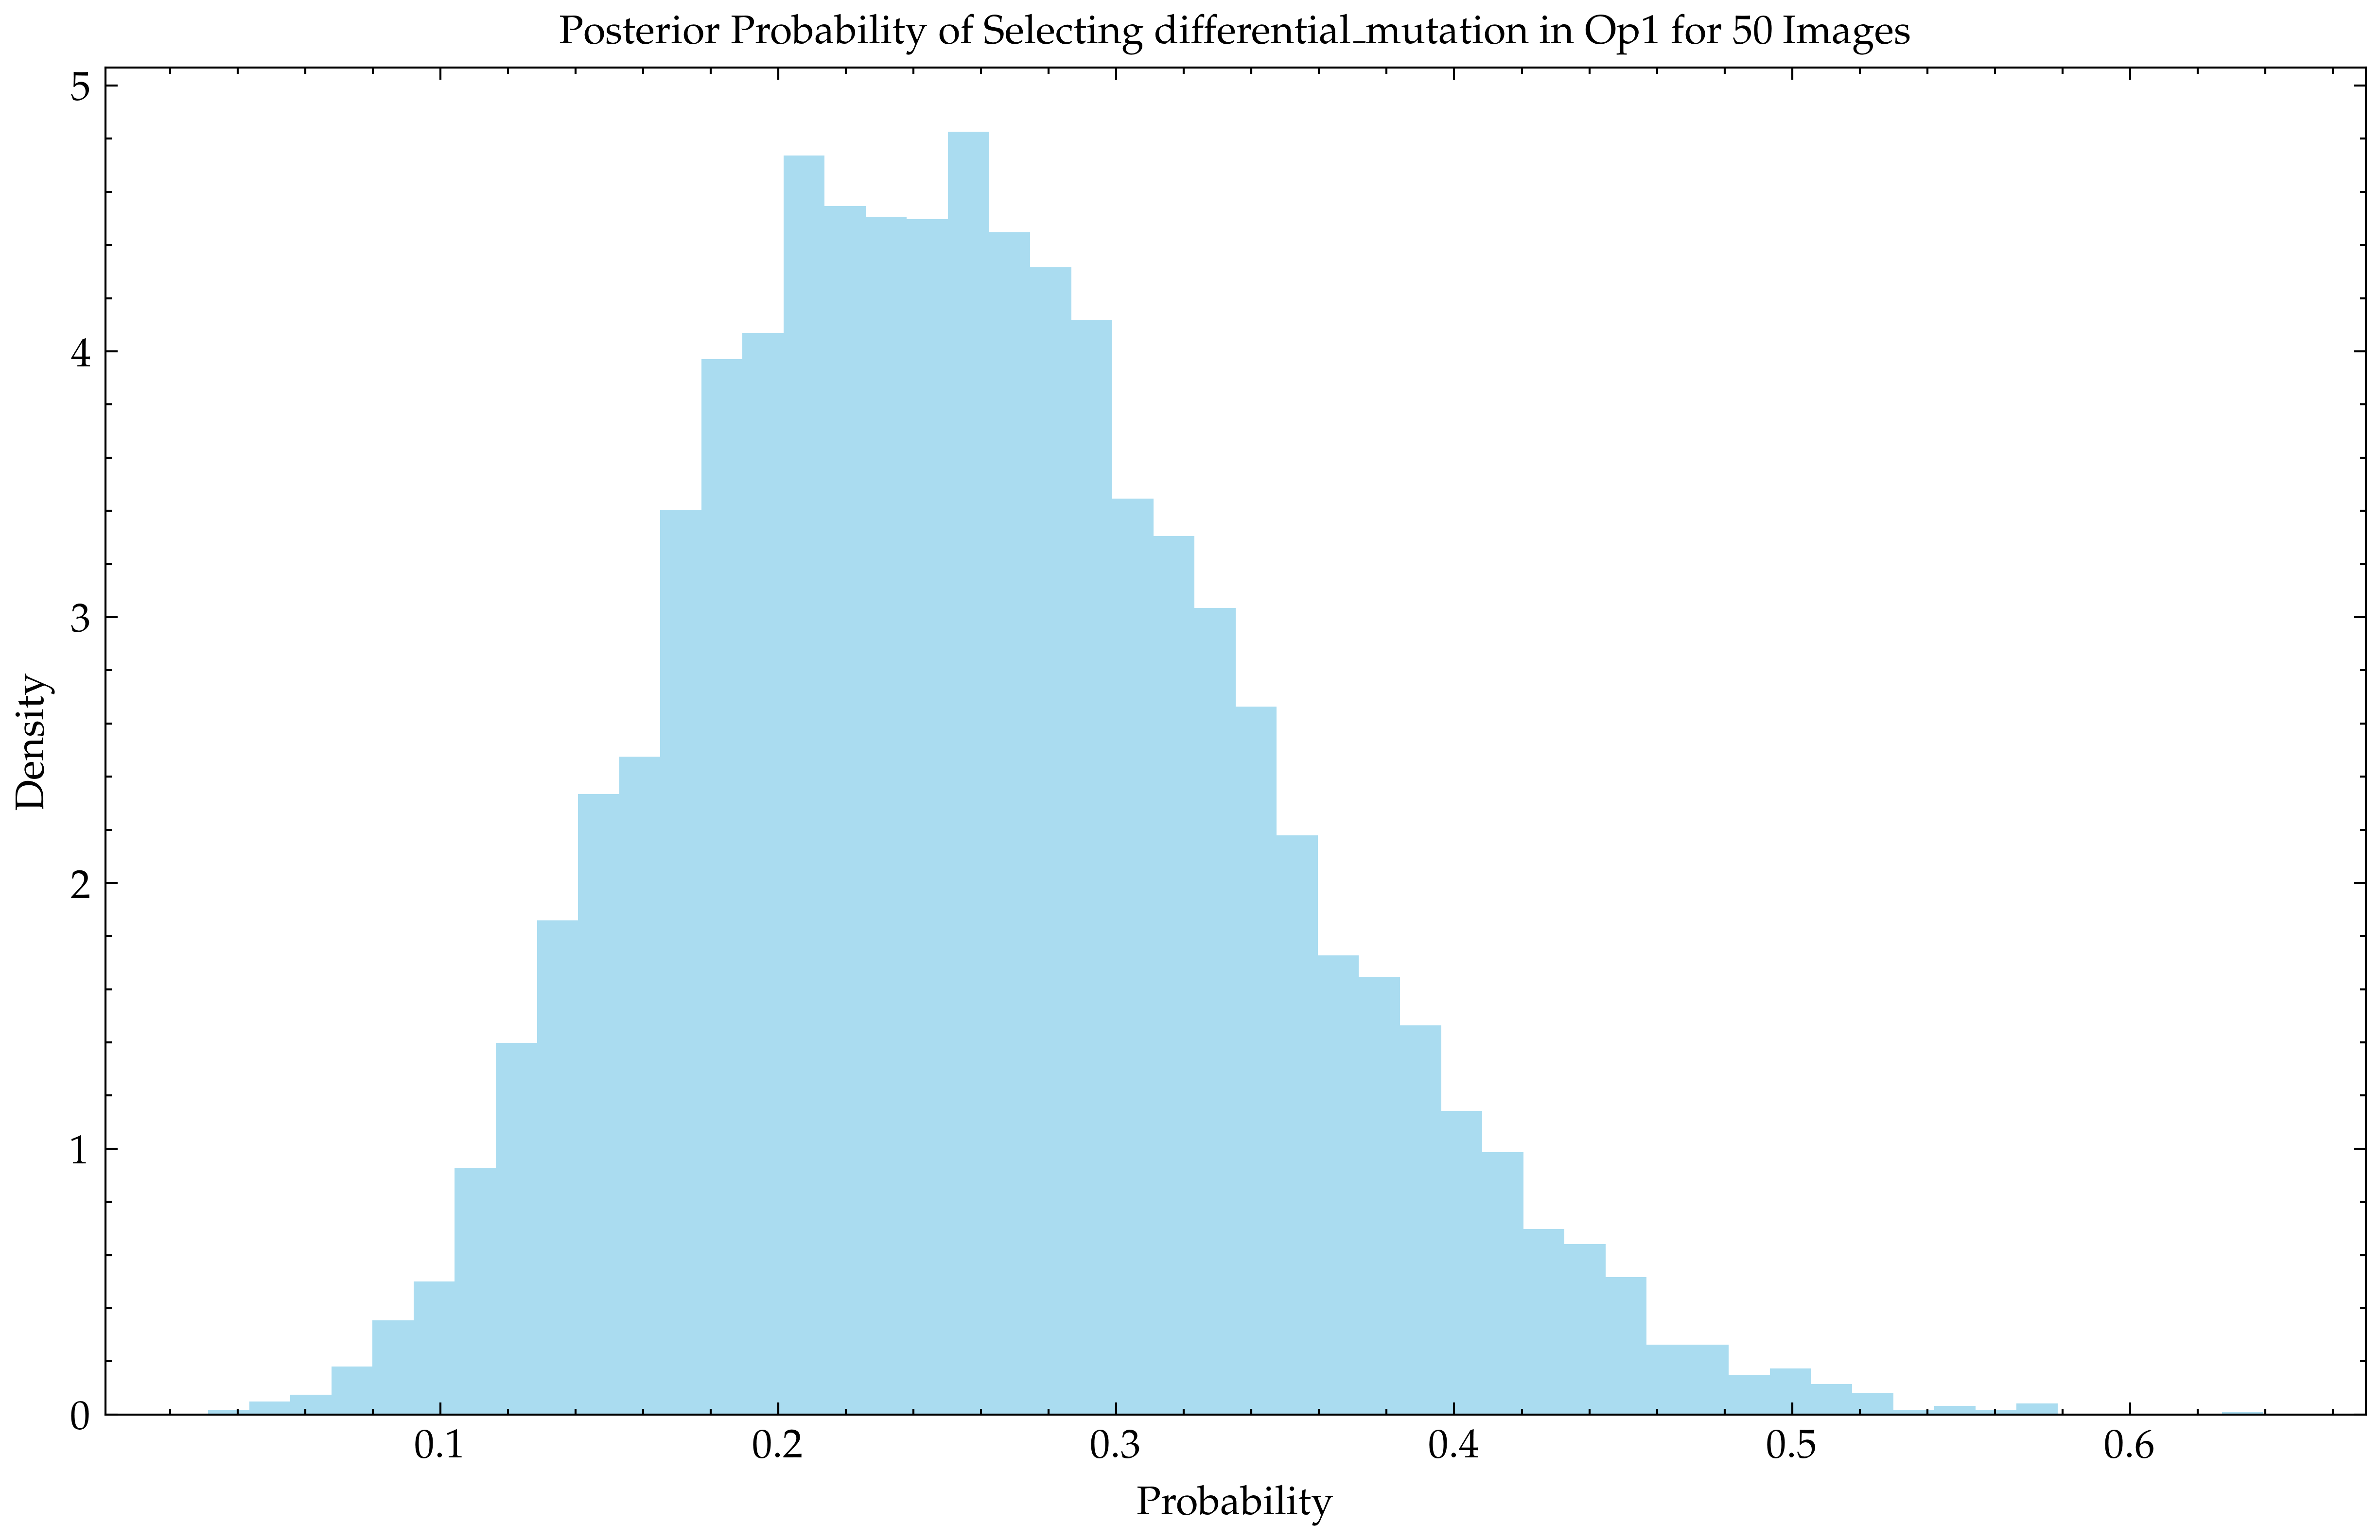

Posterior probability of selecting differential_mutation in Op1 for 50 images: 0.26


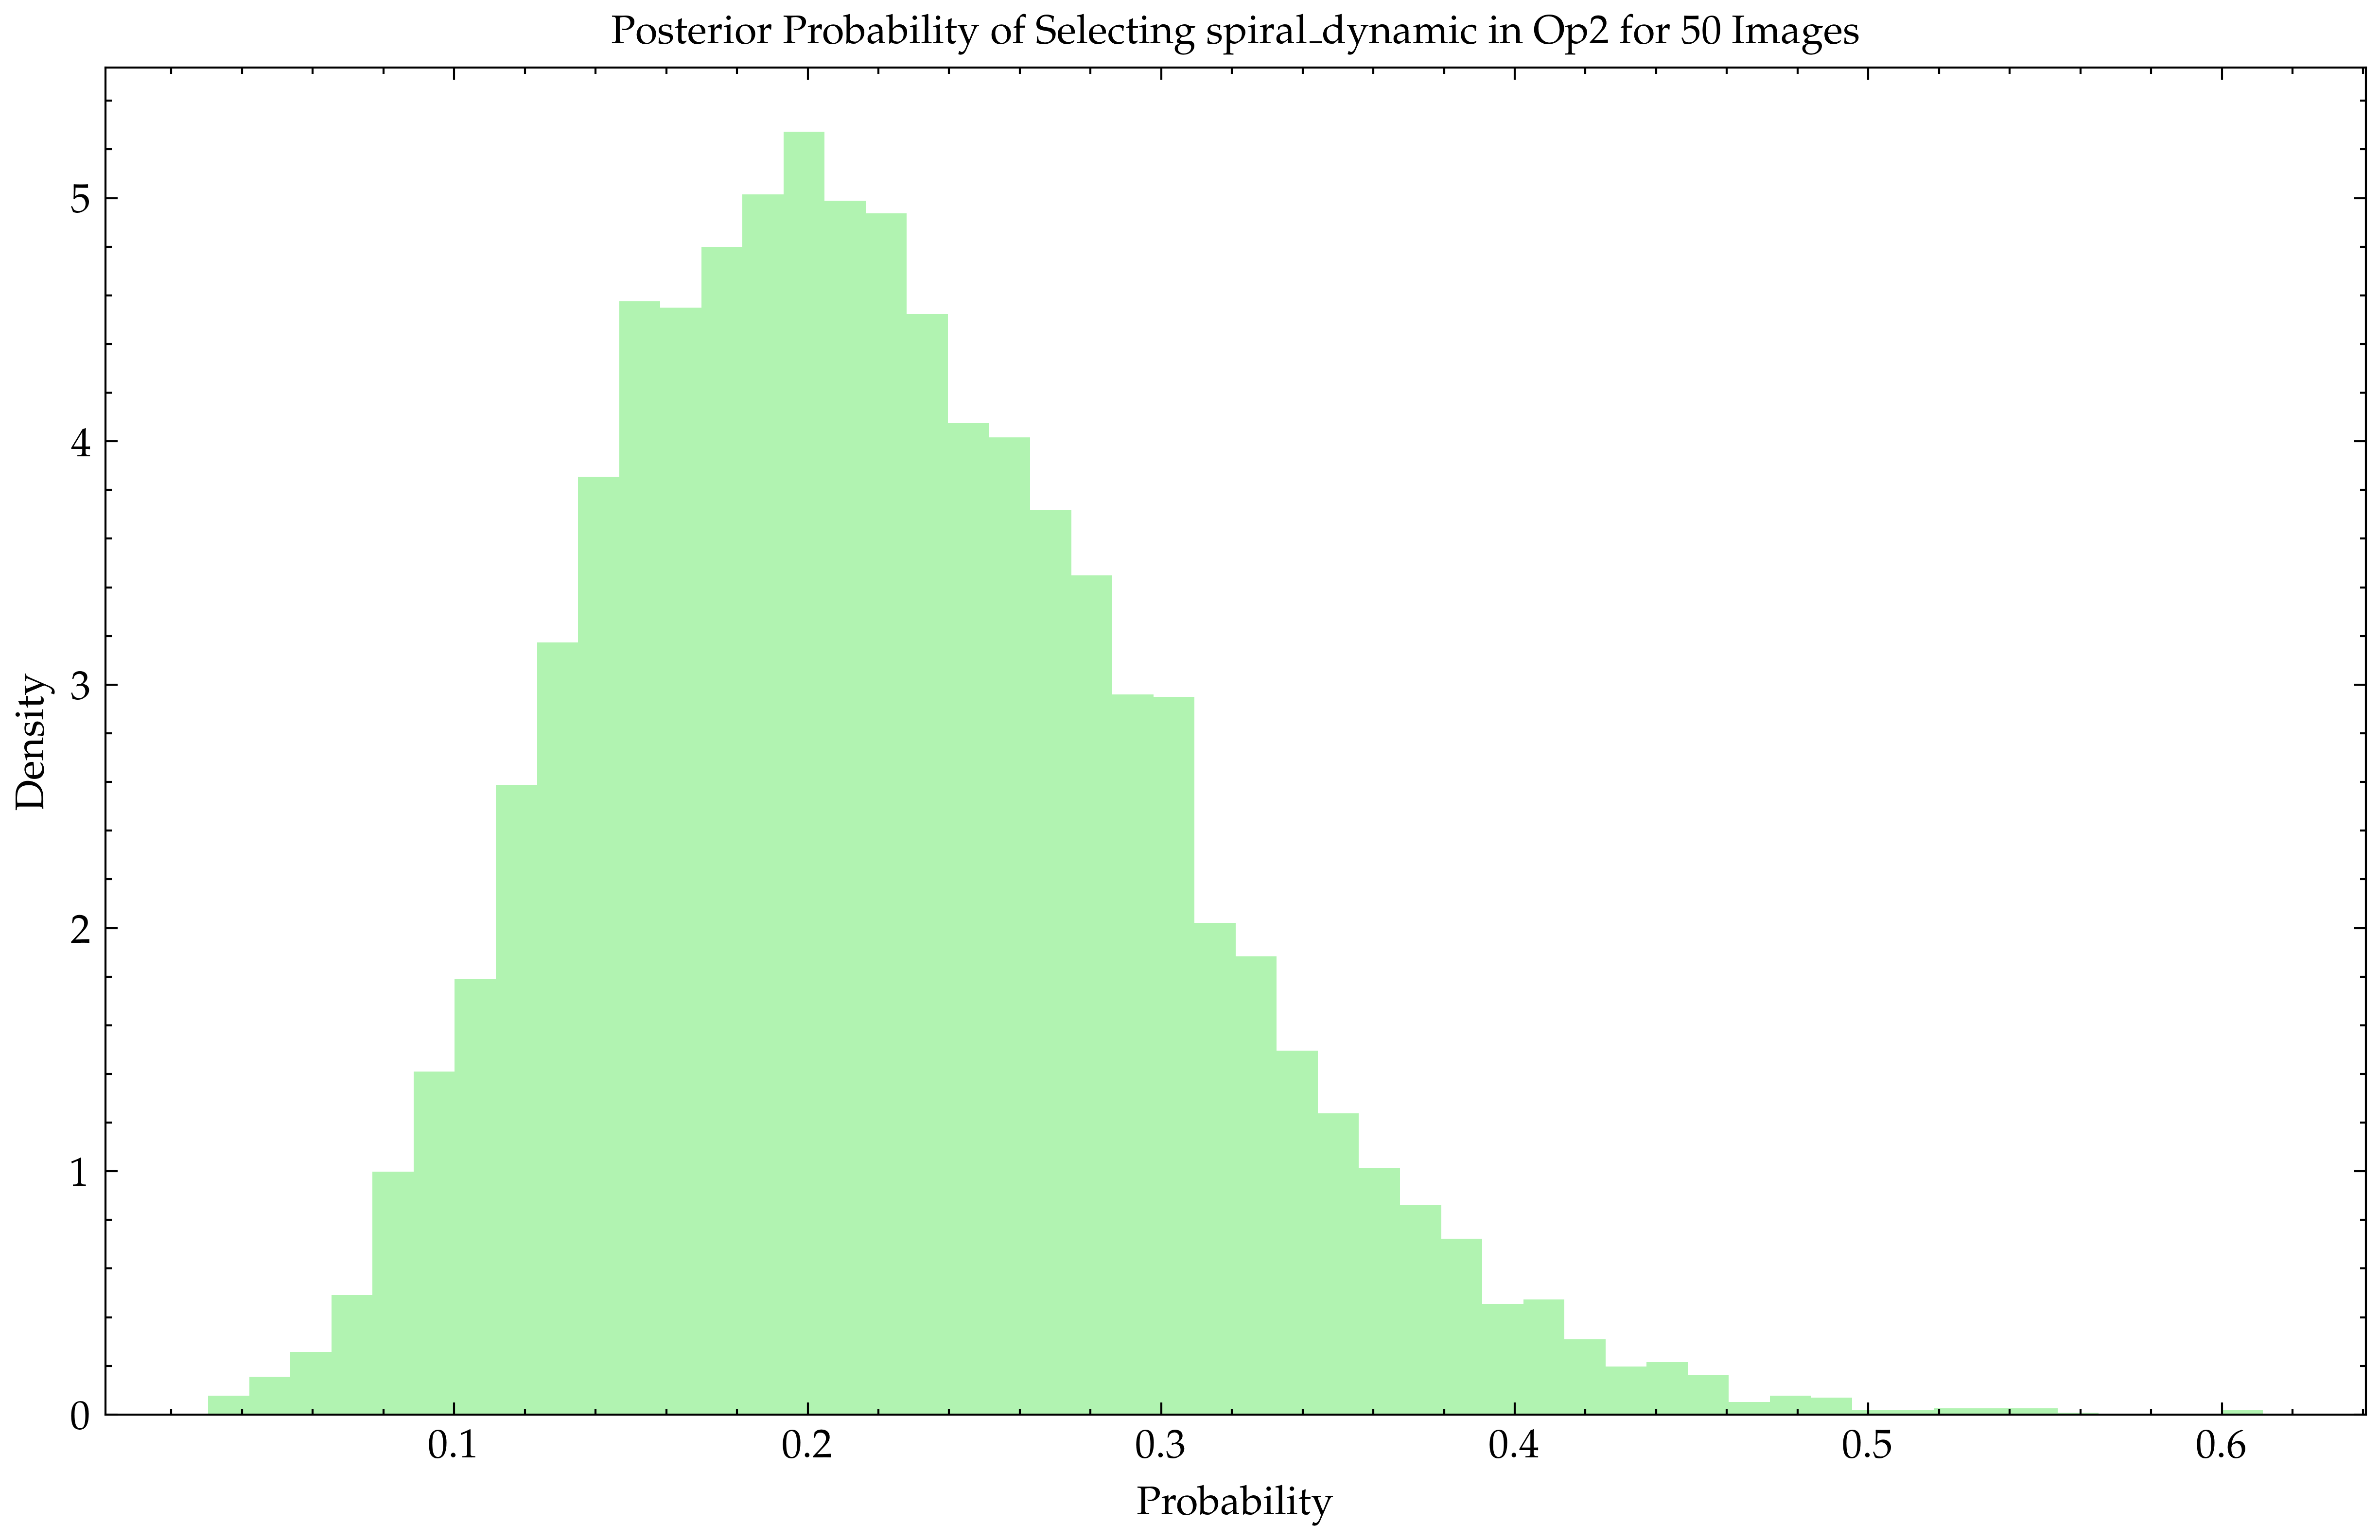

Posterior probability of selecting spiral_dynamic in Op2 for 50 images: 0.22


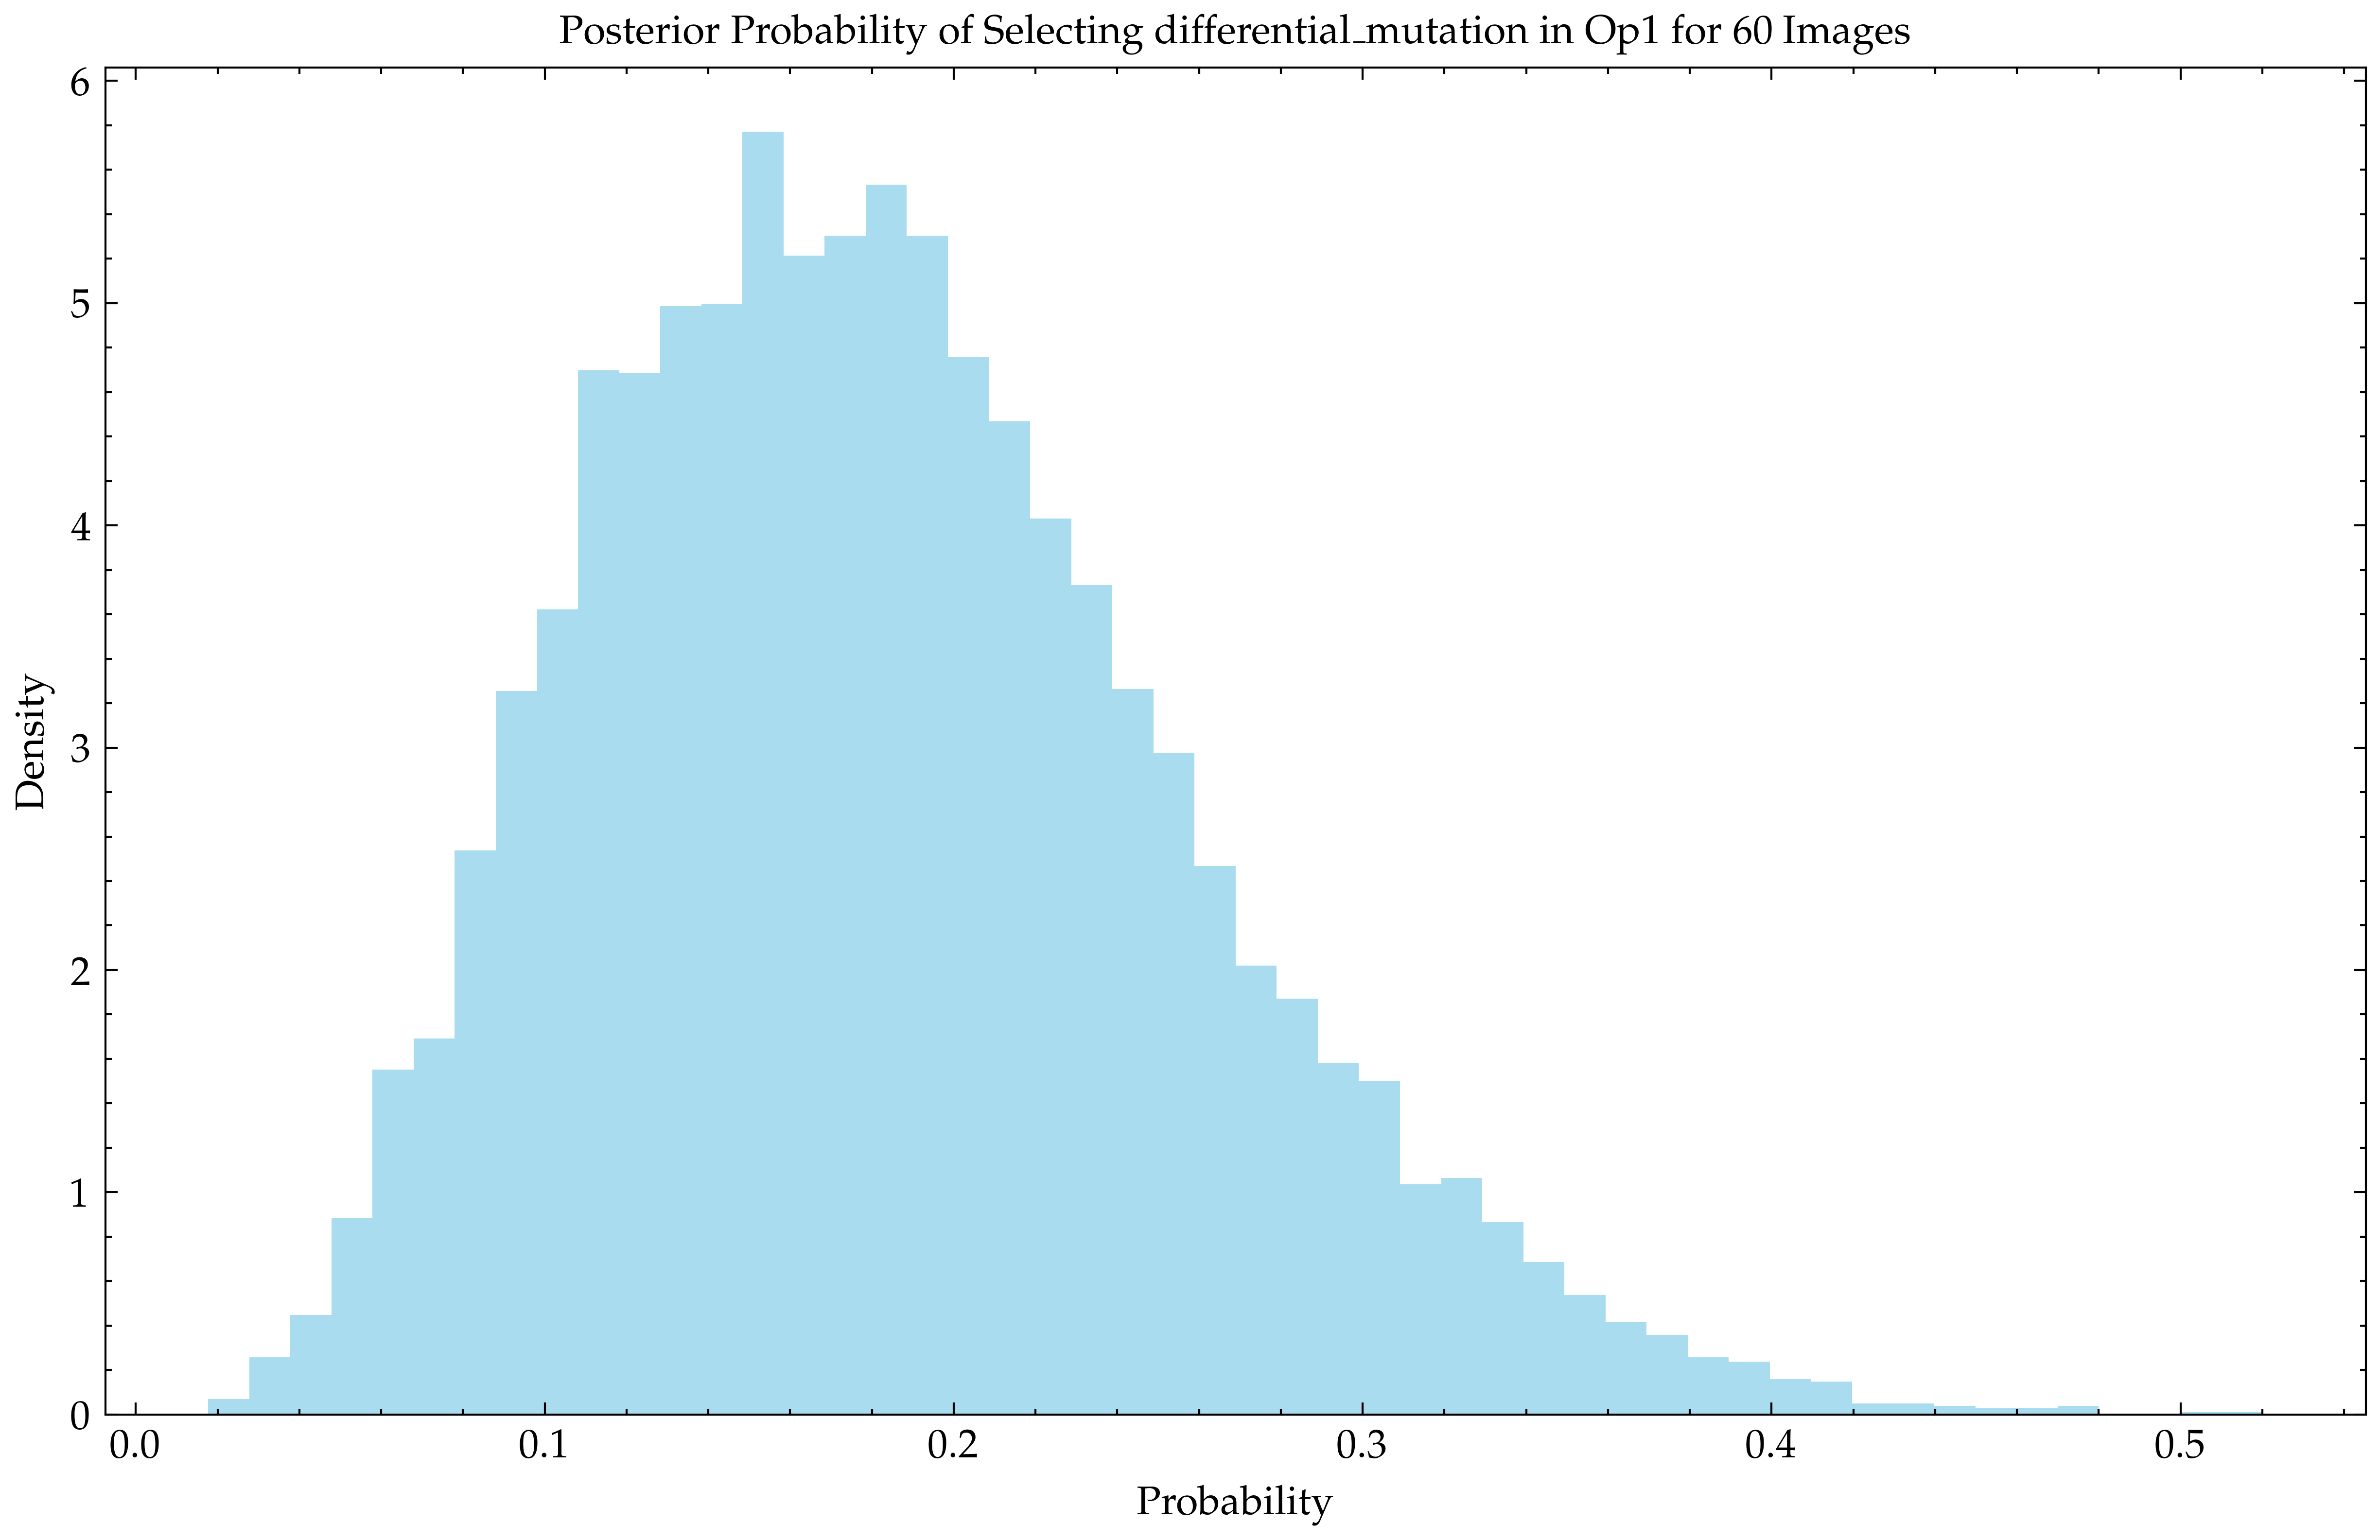

Posterior probability of selecting differential_mutation in Op1 for 60 images: 0.18


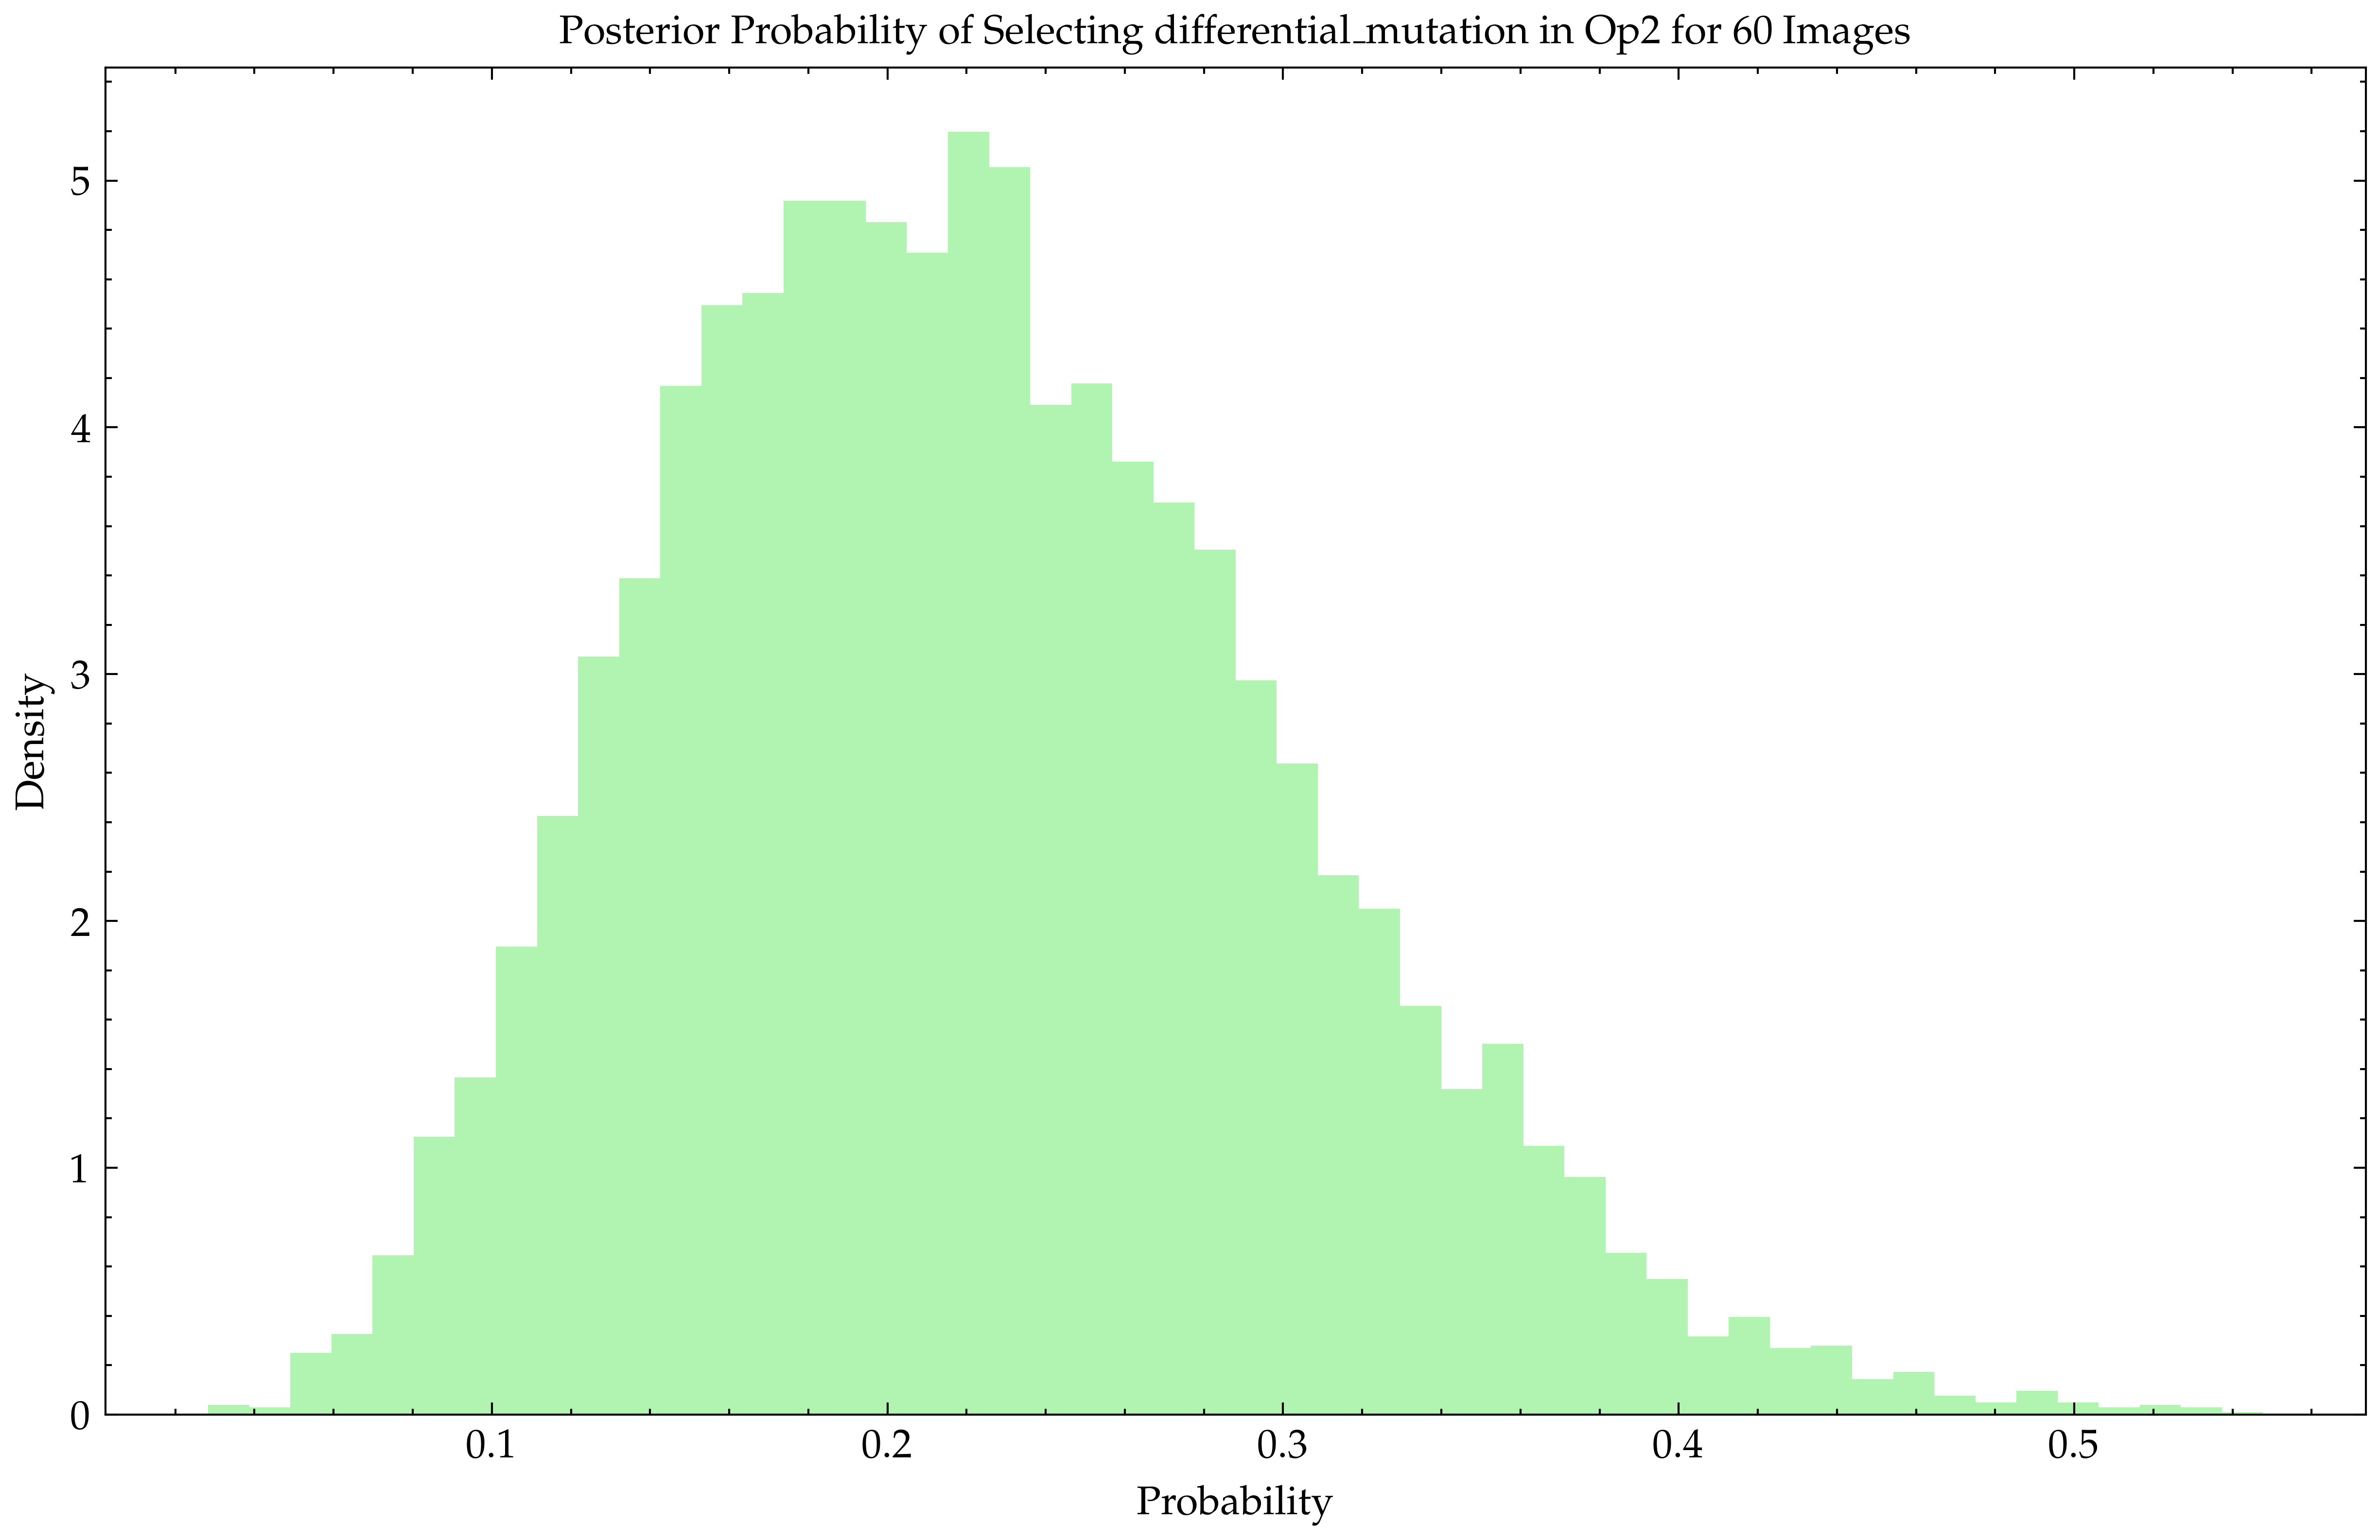

Posterior probability of selecting differential_mutation in Op2 for 60 images: 0.22


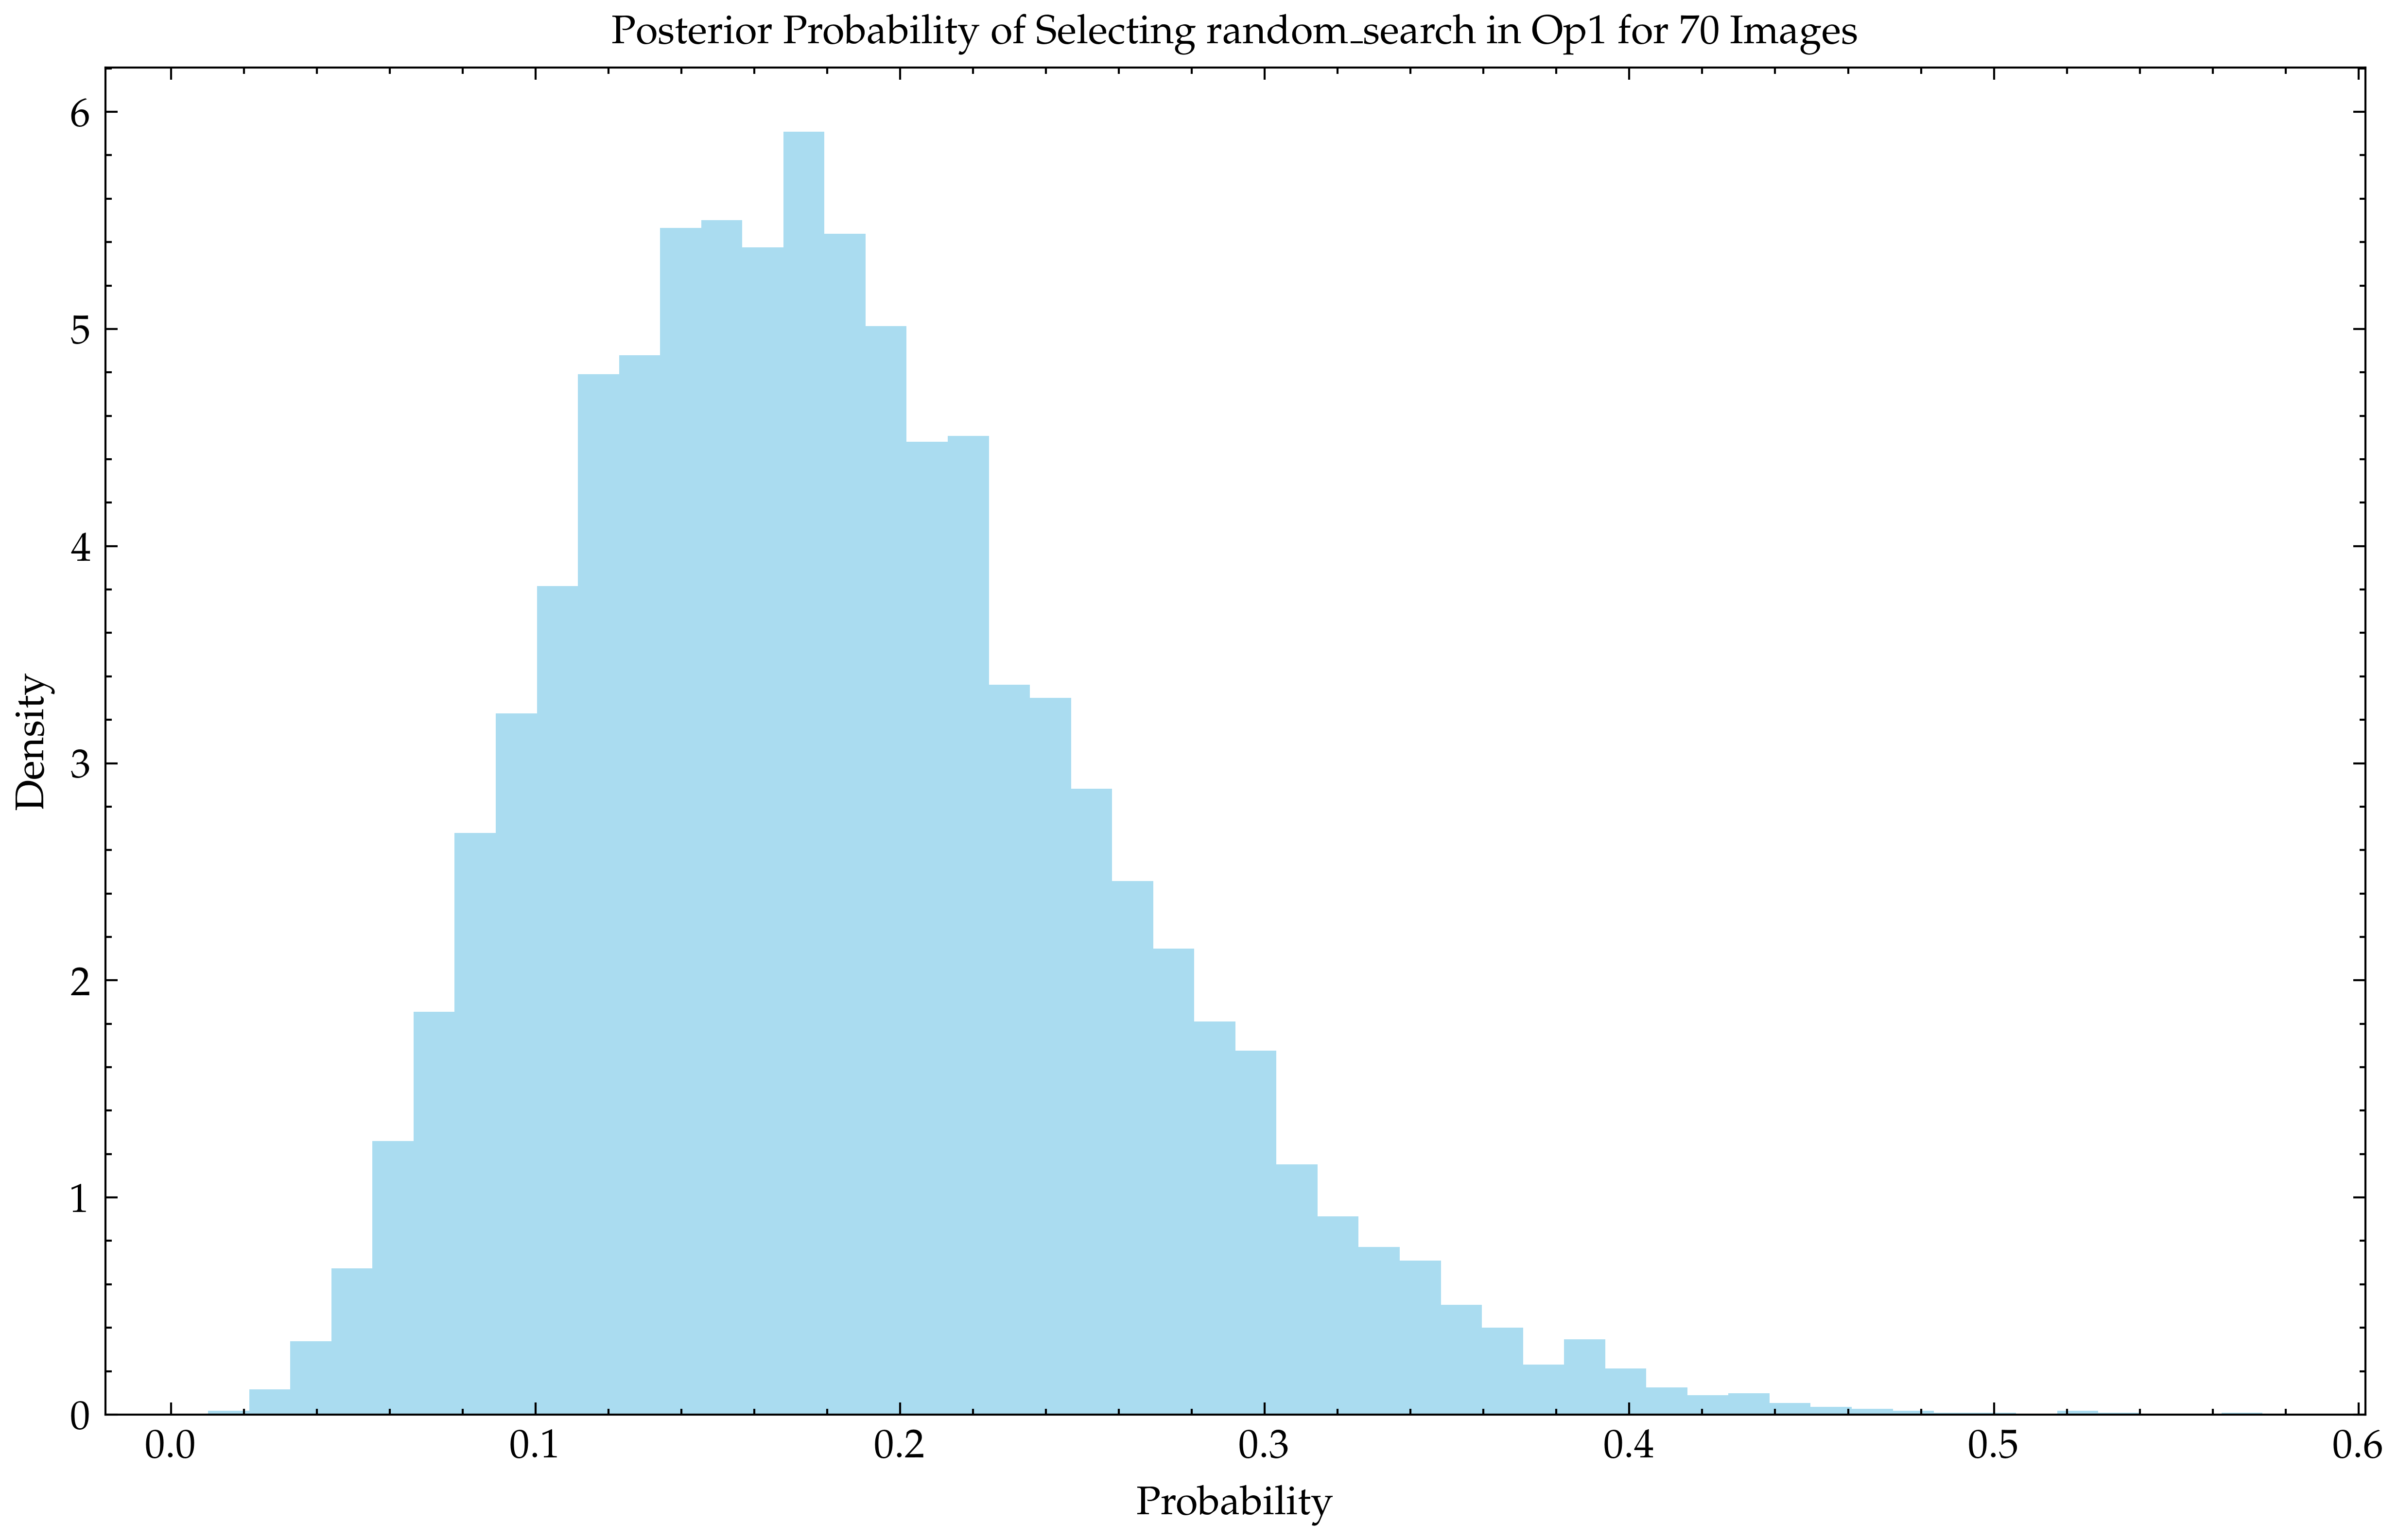

Posterior probability of selecting random_search in Op1 for 70 images: 0.18


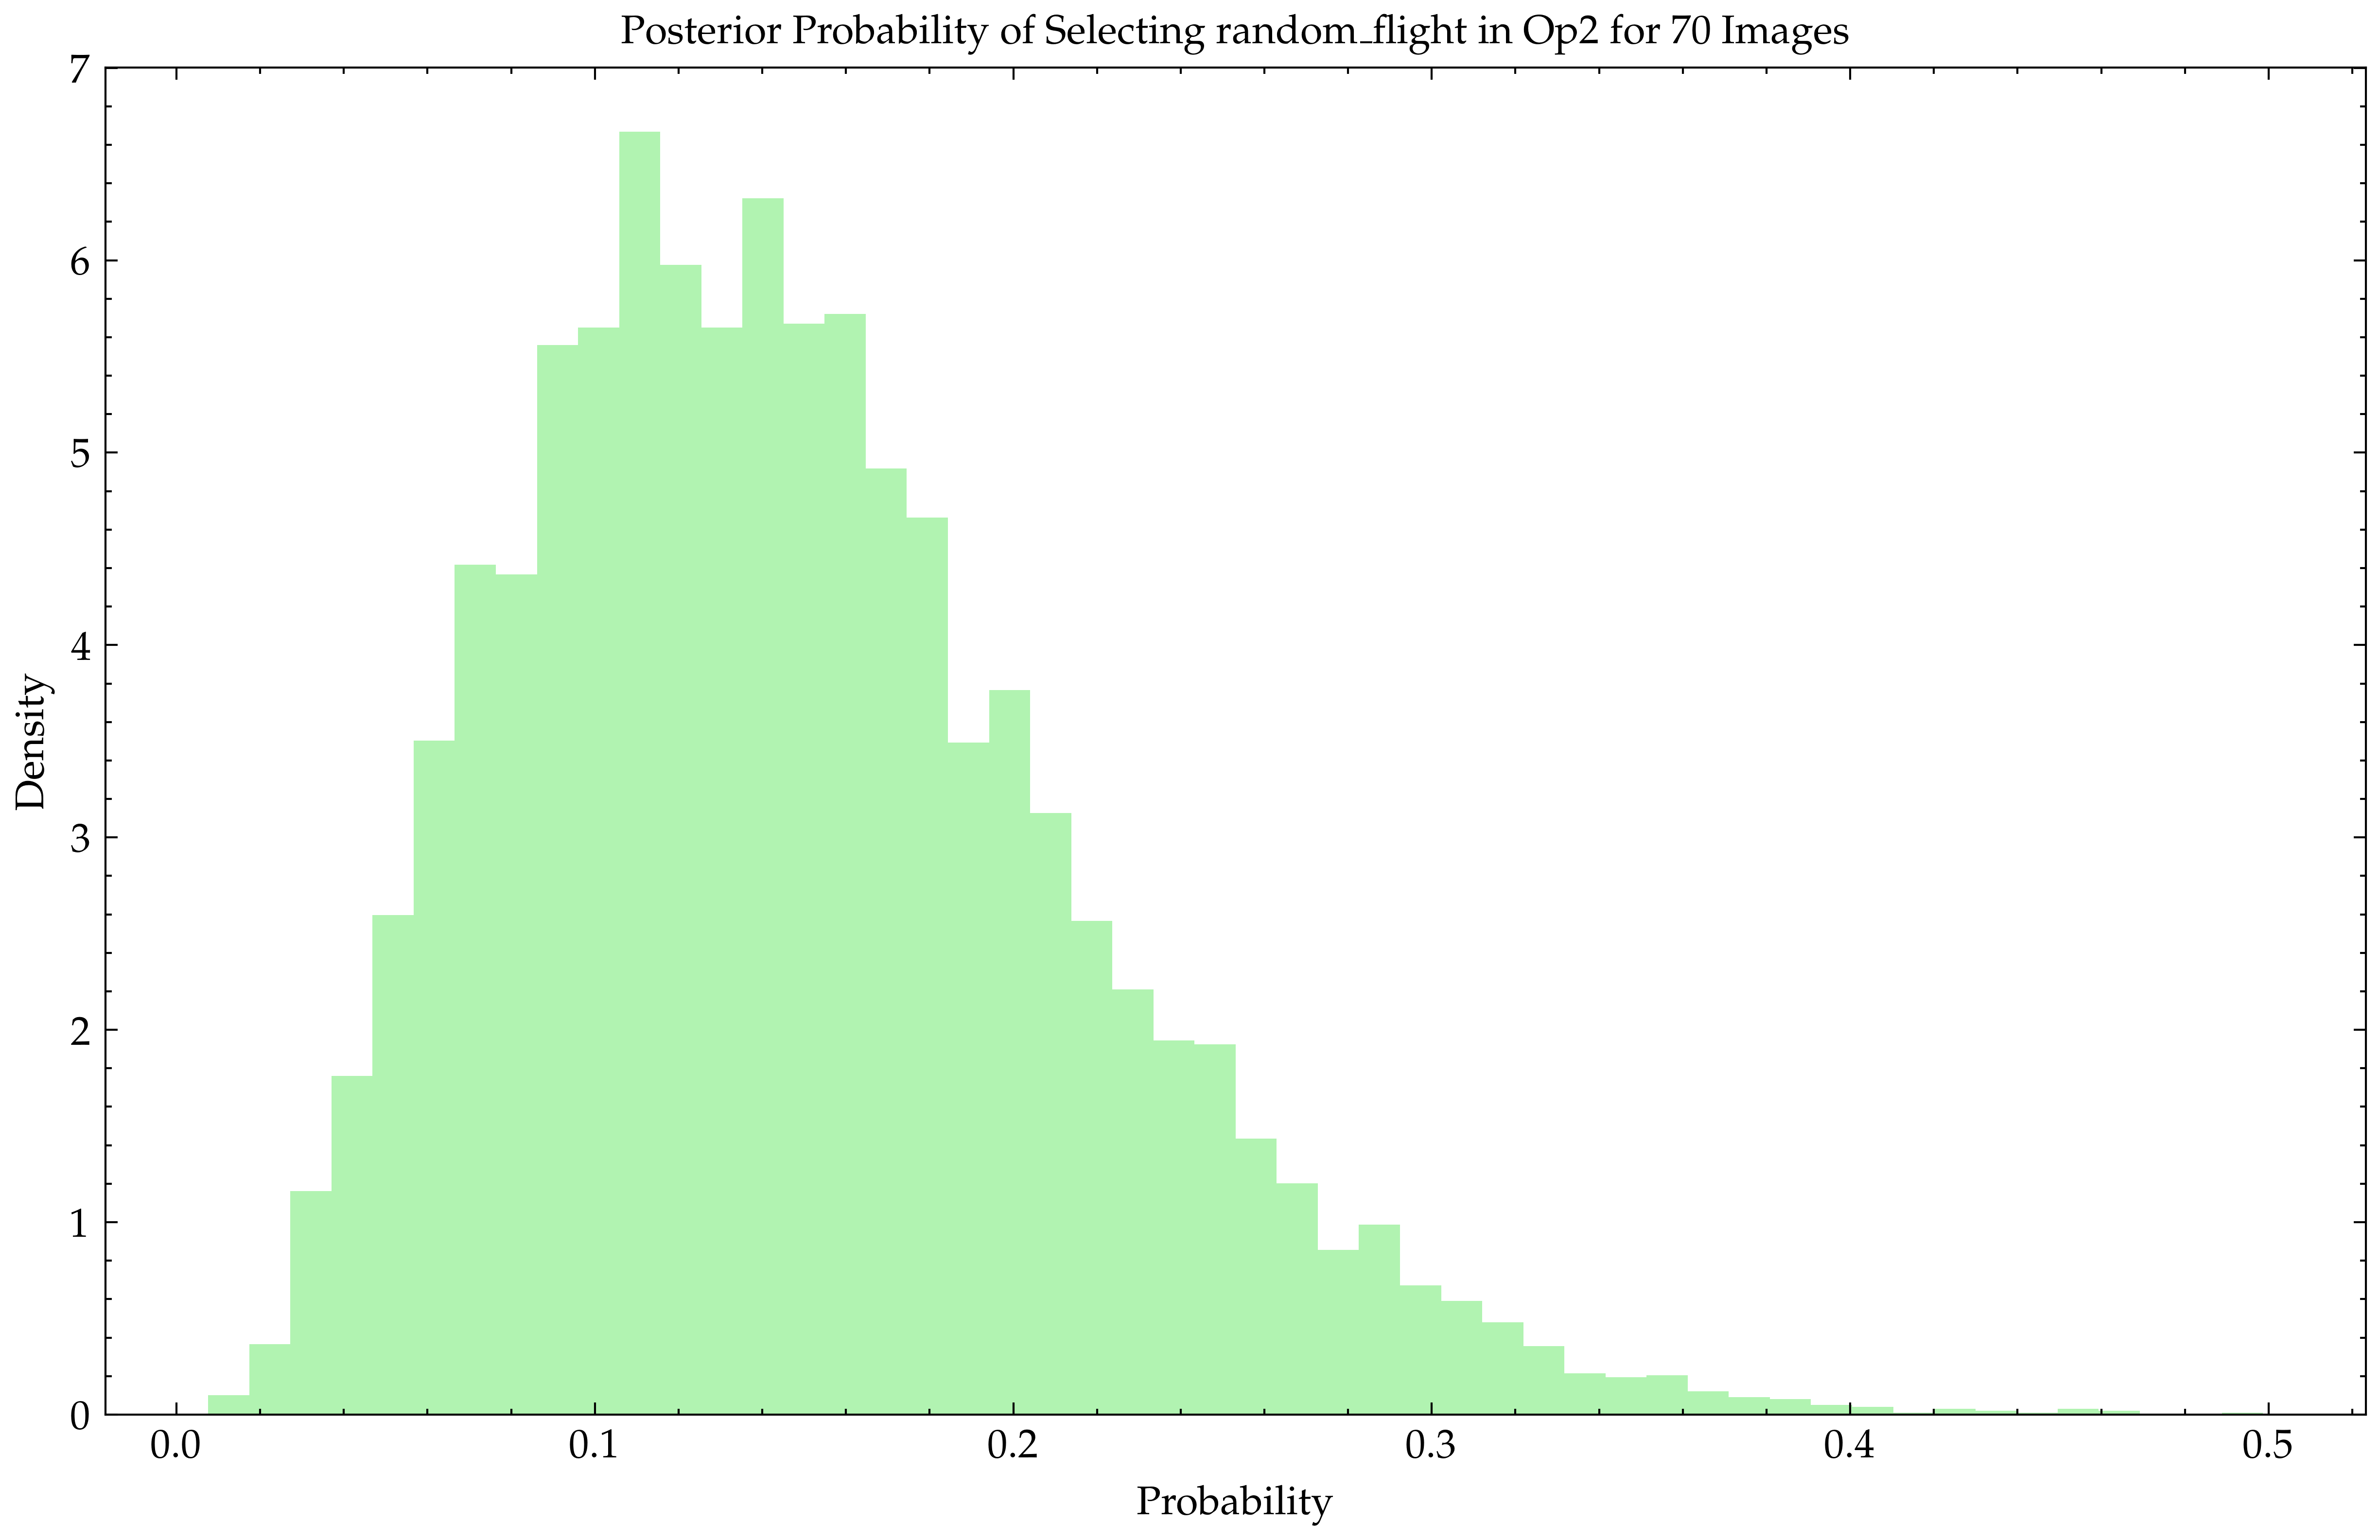

Posterior probability of selecting random_flight in Op2 for 70 images: 0.15


In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

unique_images = df_all['imag'].unique()

for imag in unique_images:

    df_filtered = df_all[df_all['imag'] == imag]

    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)

    samples = posterior_dist.rvs(10000)

    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=50, density=True, color='skyblue', alpha=0.7)
    plt.title(f'Posterior Probability of Selecting {most_frequent_op1} in Op1 for {imag} Images')
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.show()

    posterior_prob = np.mean(samples)
    print(f"Posterior probability of selecting {most_frequent_op1} in Op1 for {imag} images: {posterior_prob:.2f}")

    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)

    posterior_dist = stats.beta(alpha_post, beta_post)

    samples = posterior_dist.rvs(10000)

    # Plot the posterior distribution (Op2)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=50, density=True, color='lightgreen', alpha=0.7)
    plt.title(f'Posterior Probability of Selecting {most_frequent_op2} in Op2 for {imag} Images')
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.show()

    posterior_prob = np.mean(samples)
    print(f"Posterior probability of selecting {most_frequent_op2} in Op2 for {imag} images: {posterior_prob:.2f}")


In [ ]:
pip install joypy

<Figure size 7200x4800 with 0 Axes>

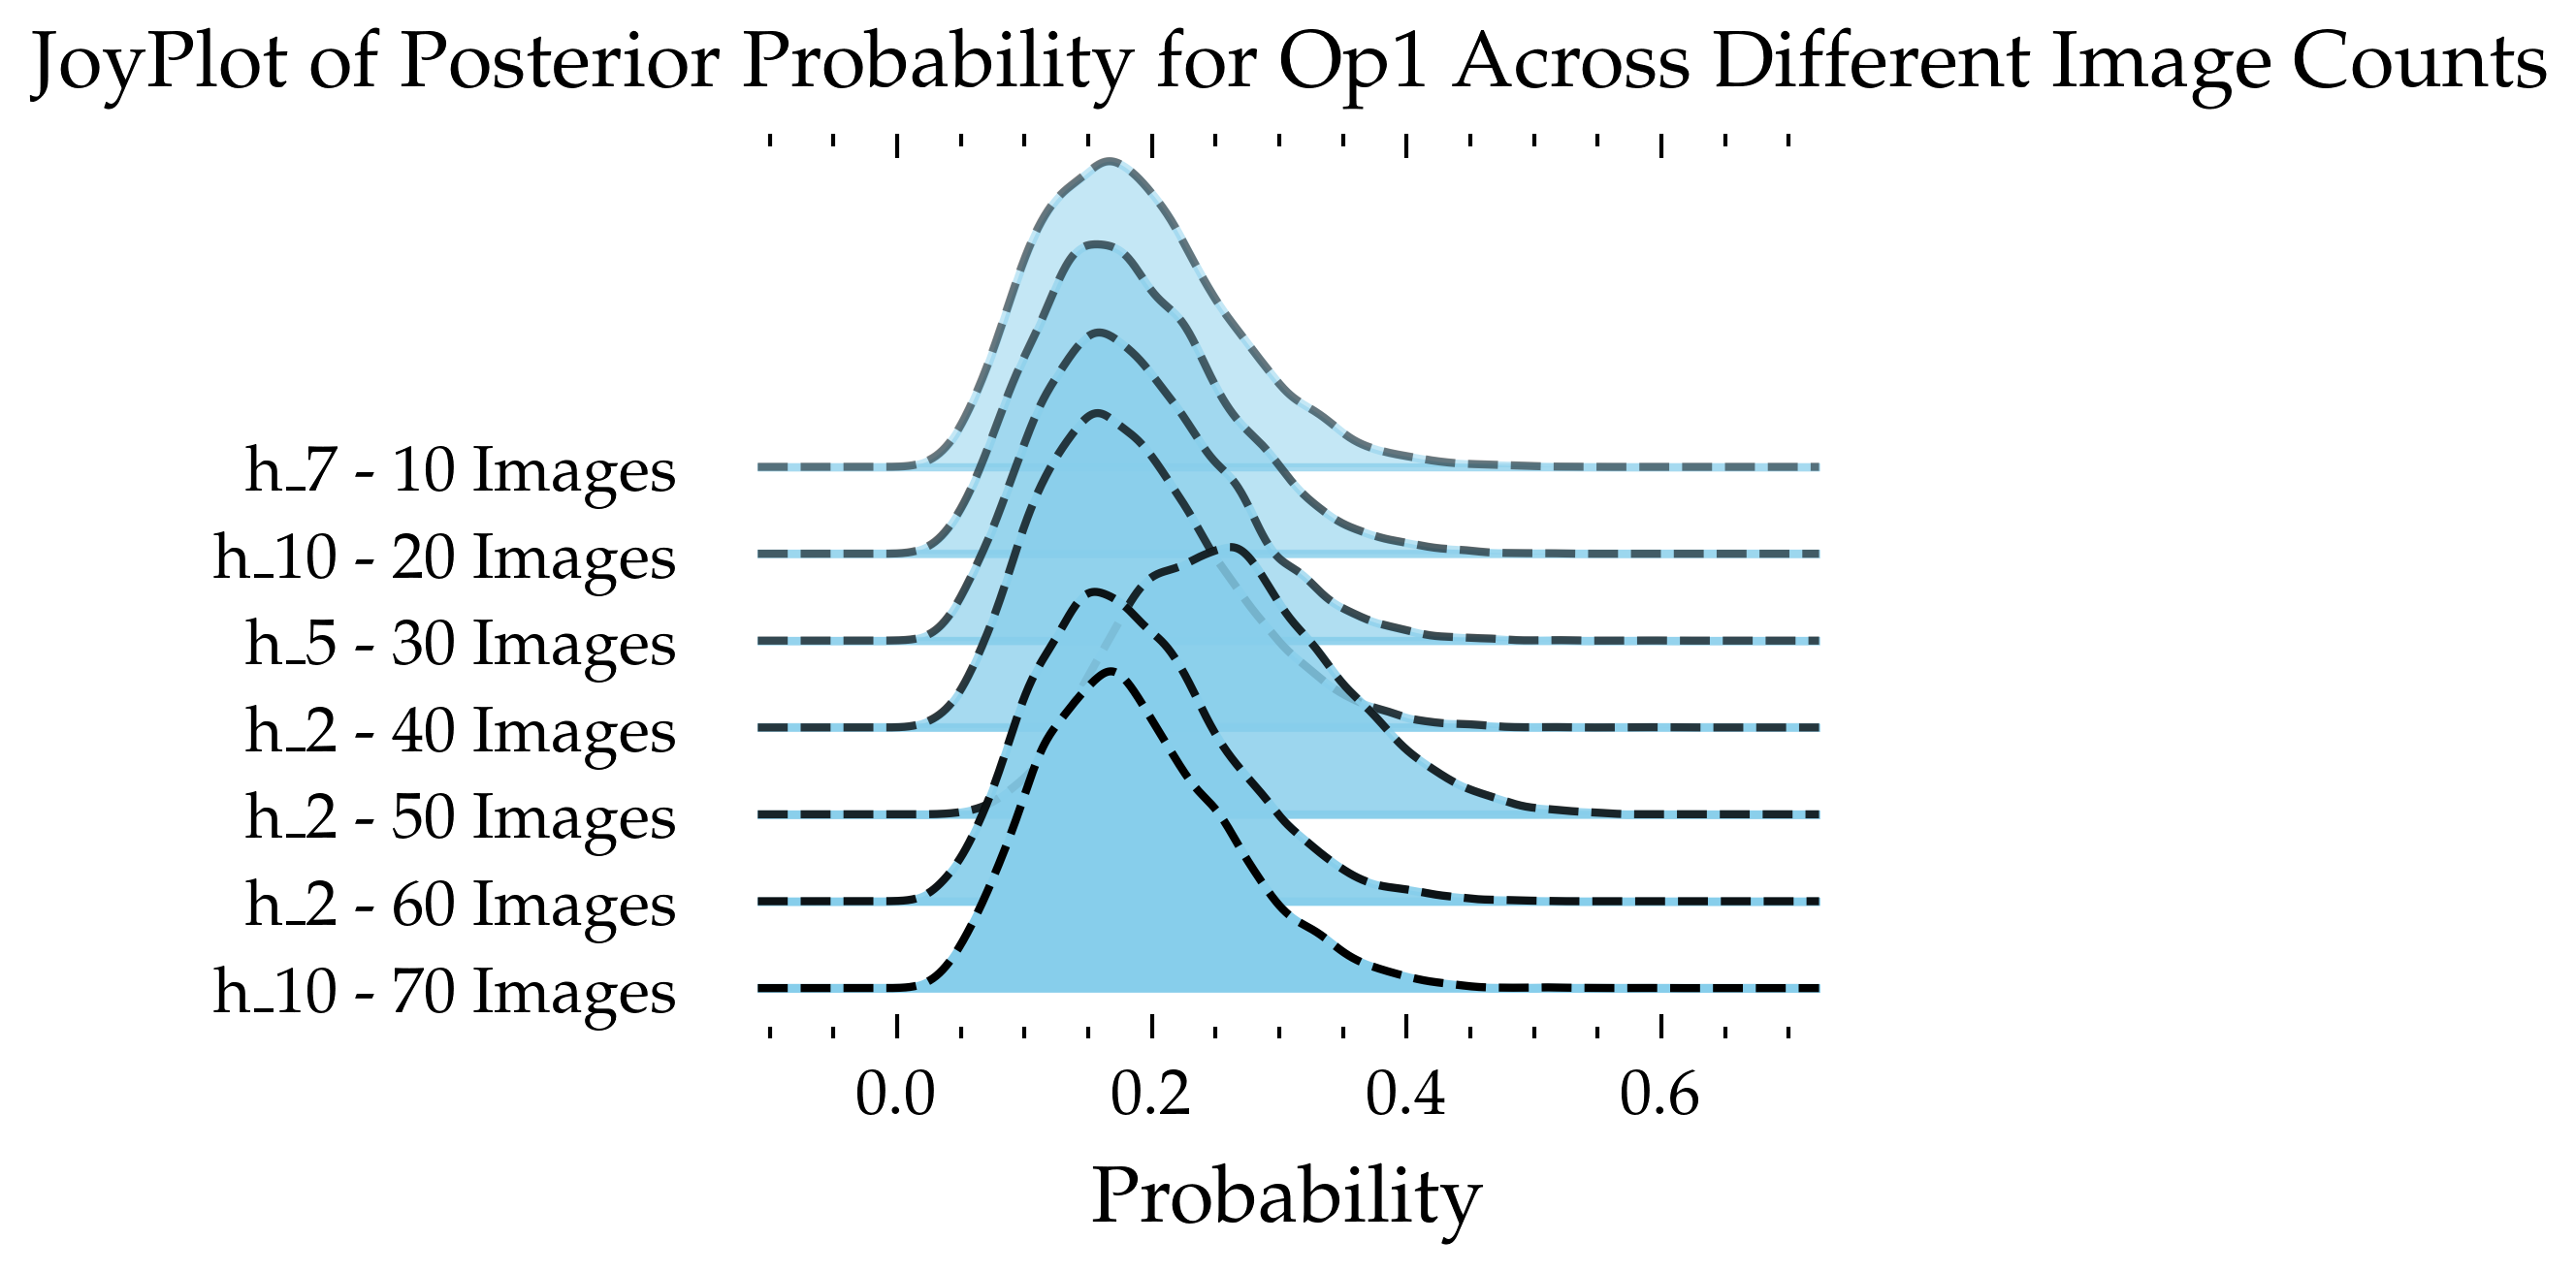

<Figure size 7200x4800 with 0 Axes>

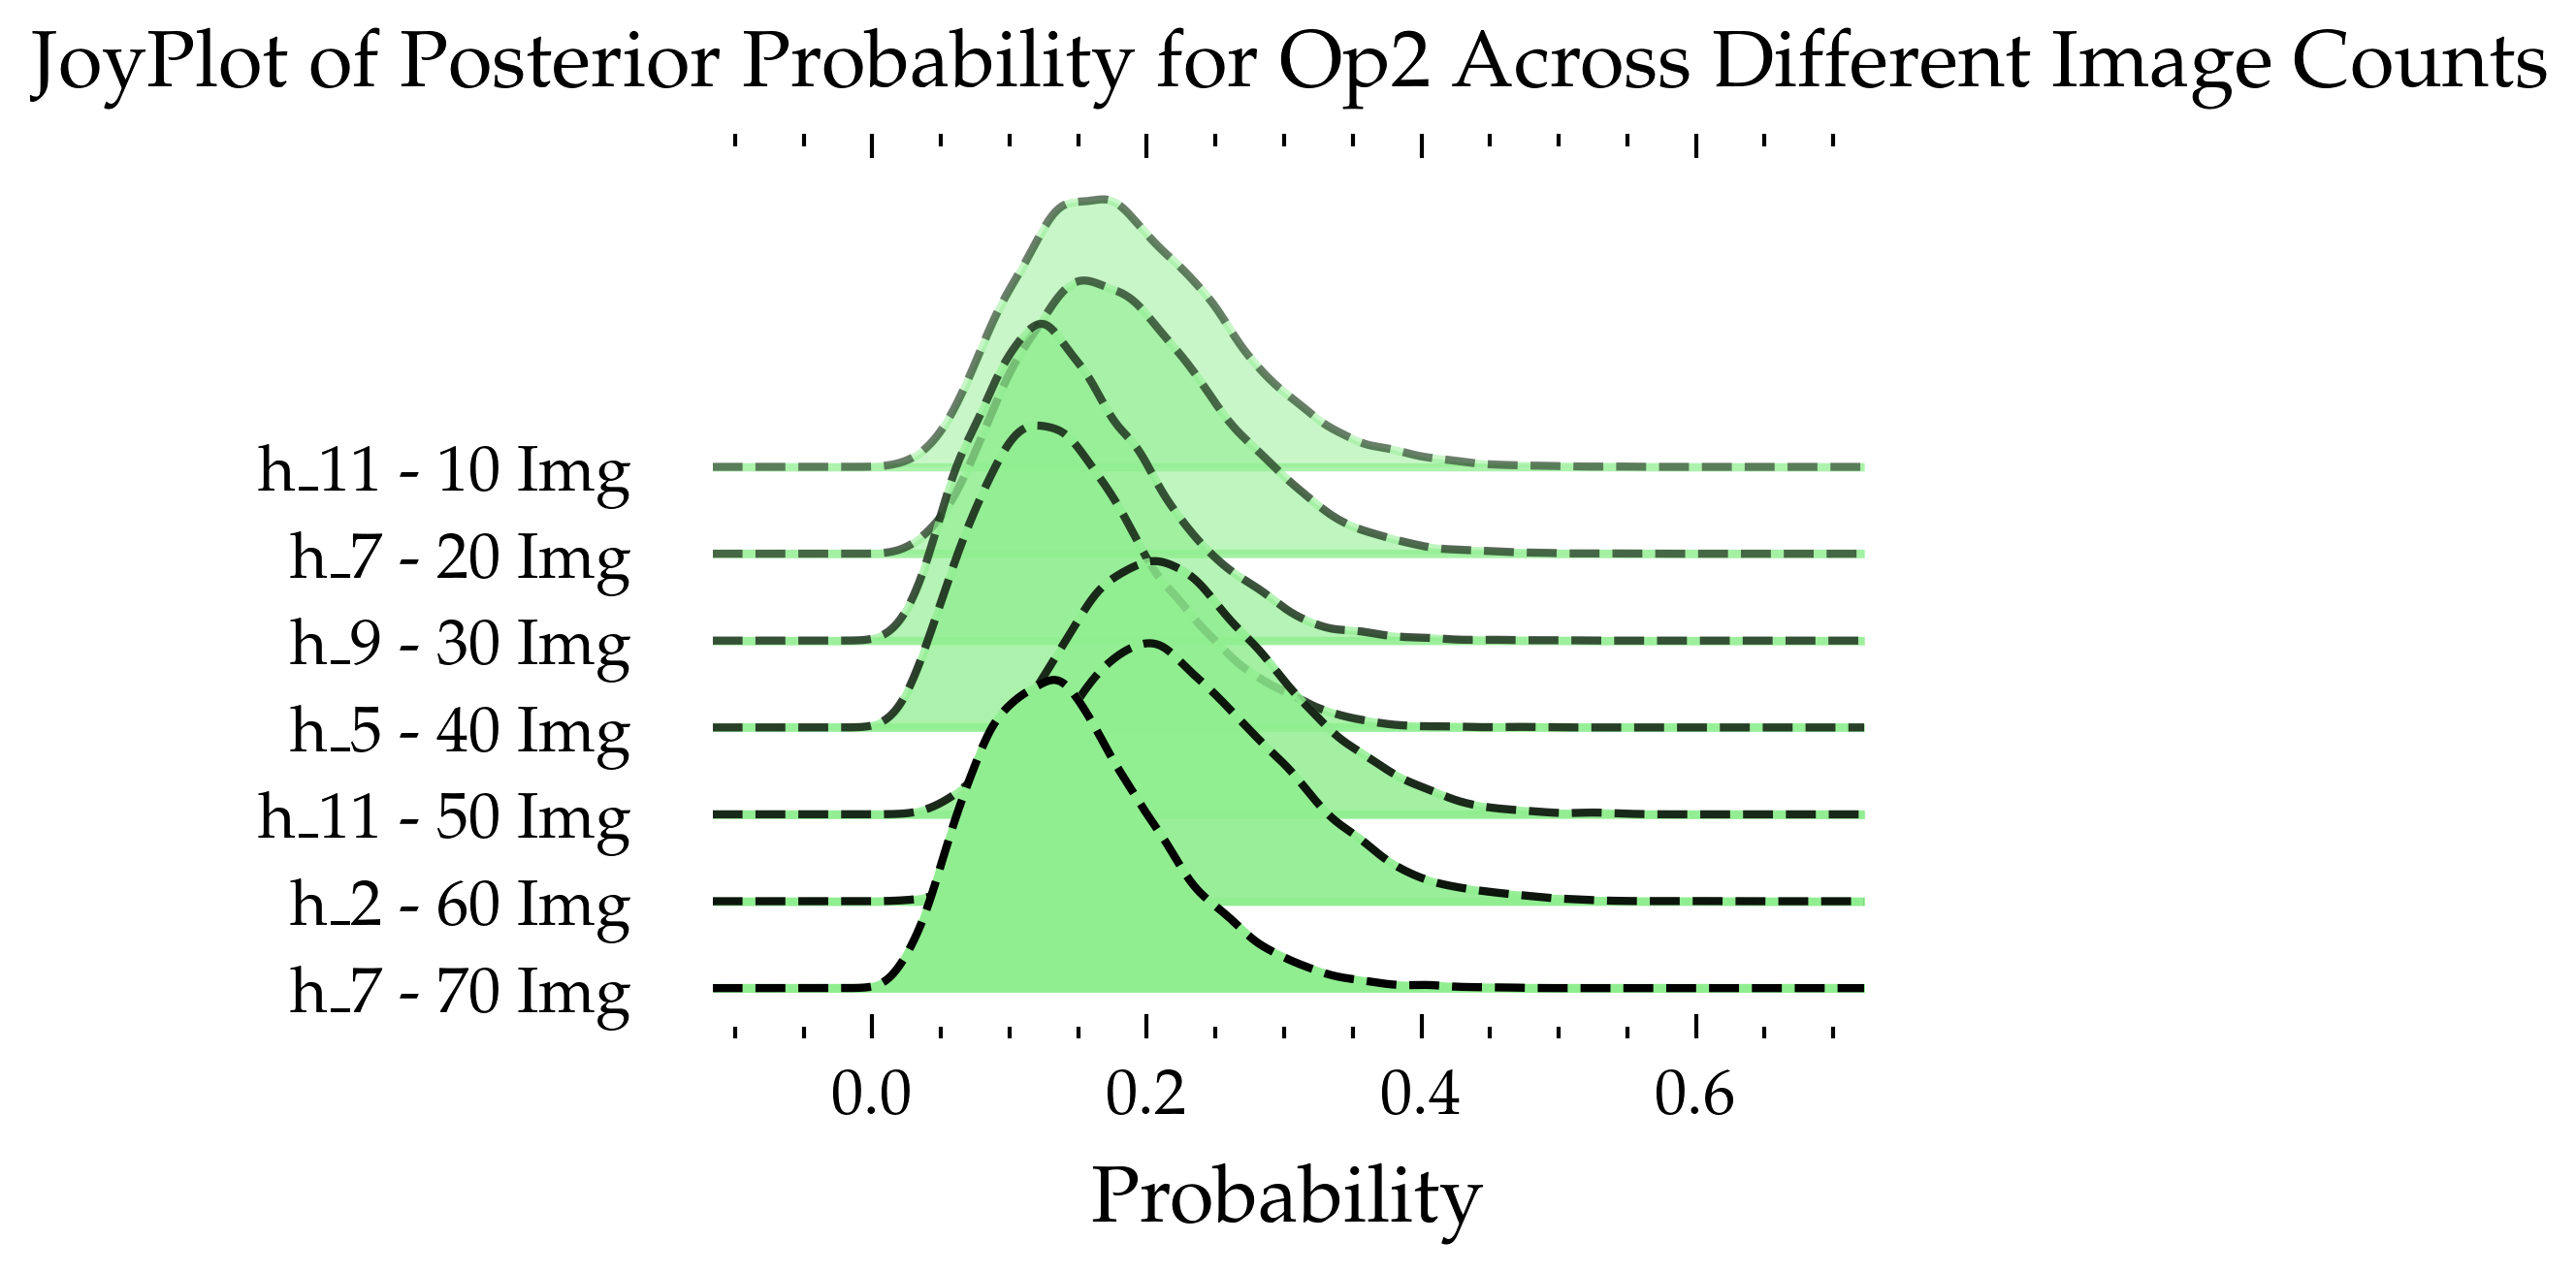

In [ ]:
import joypy
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Mapa de operadores
operator_map = {
    'central_force_dynamic': 'h_1',
    'differential_mutation': 'h_2',
    'firefly_dynamic': 'h_3',
    'genetic_crossover': 'h_4',
    'genetic_mutation': 'h_5',
    'gravitational_search': 'h_6',
    'random_flight': 'h_7',
    'local_random_walk': 'h_8',
    'random_sample': 'h_9',
    'random_search': 'h_10',
    'spiral_dynamic': 'h_11',
    'swarm_dynamic': 'h_12'
}

# Inicializar listas para almacenar datos para JoyPlot
data_op1 = []
data_op2 = []
labels_op1 = []
labels_op2 = []

unique_images = df_all['imag'].unique()

for imag in unique_images:
    # Filtrar los datos por el número de imágenes
    df_filtered = df_all[df_all['imag'] == imag]

    # Análisis para Op1
    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op1 = posterior_dist.rvs(10000)

    data_op1.append(samples_op1)
    labels_op1.append(f'{operator_map[most_frequent_op1]} - {imag} Images')

    # Análisis para Op2
    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op2 = posterior_dist.rvs(10000)

    data_op2.append(samples_op2)
    labels_op2.append(f'{operator_map[most_frequent_op2]} - {imag} Img')

# Crear JoyPlot para Op1
plt.figure(figsize=(12, 8))
joypy.joyplot(data_op1, labels=labels_op1, color="skyblue", alpha=0.7, fade=True)
plt.title('JoyPlot of Posterior Probability for Op1 Across Different Image Counts')
plt.xlabel('Probability')
plt.show()

# Crear JoyPlot para Op2
plt.figure(figsize=(12, 8))
joypy.joyplot(data_op2, labels=labels_op2, color="lightgreen", alpha=0.7, fade=True)
plt.title('JoyPlot of Posterior Probability for Op2 Across Different Image Counts')
plt.xlabel('Probability')
plt.show()


<Figure size 1800x1200 with 0 Axes>

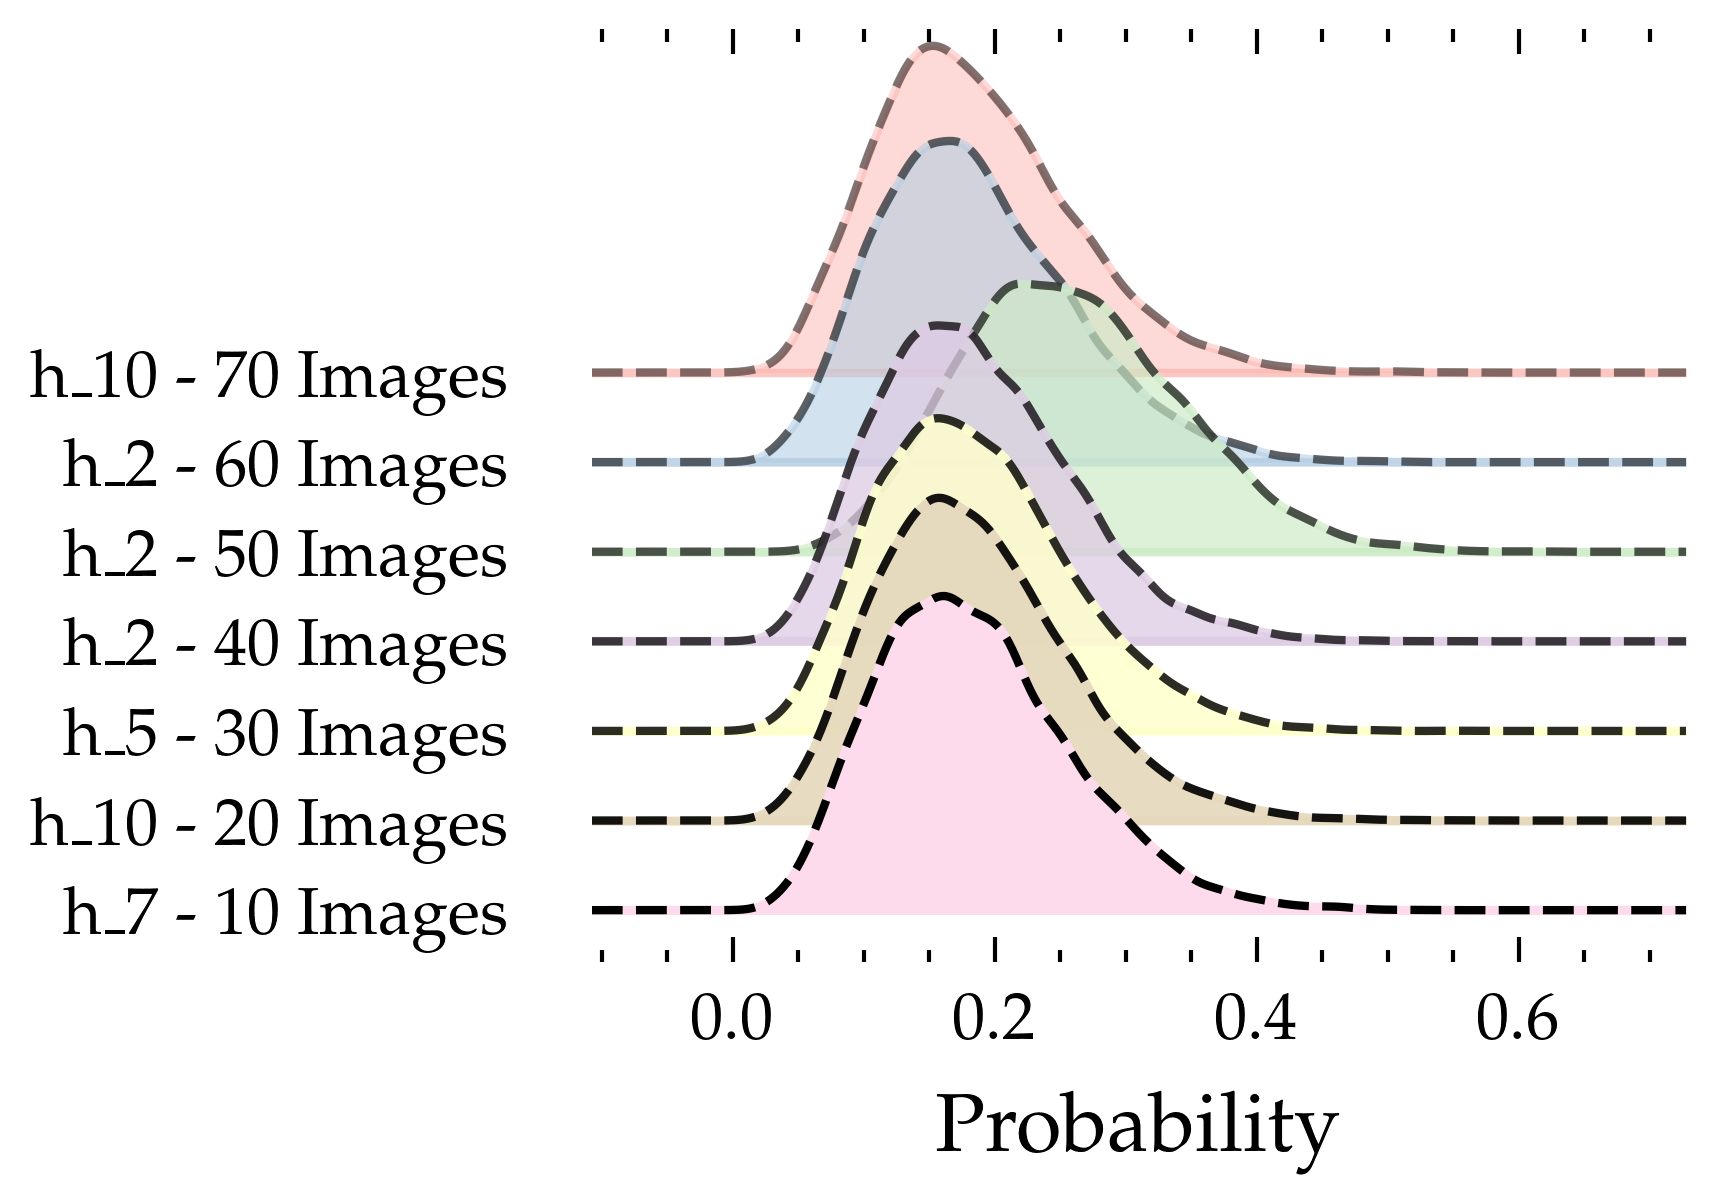

<Figure size 1800x1200 with 0 Axes>

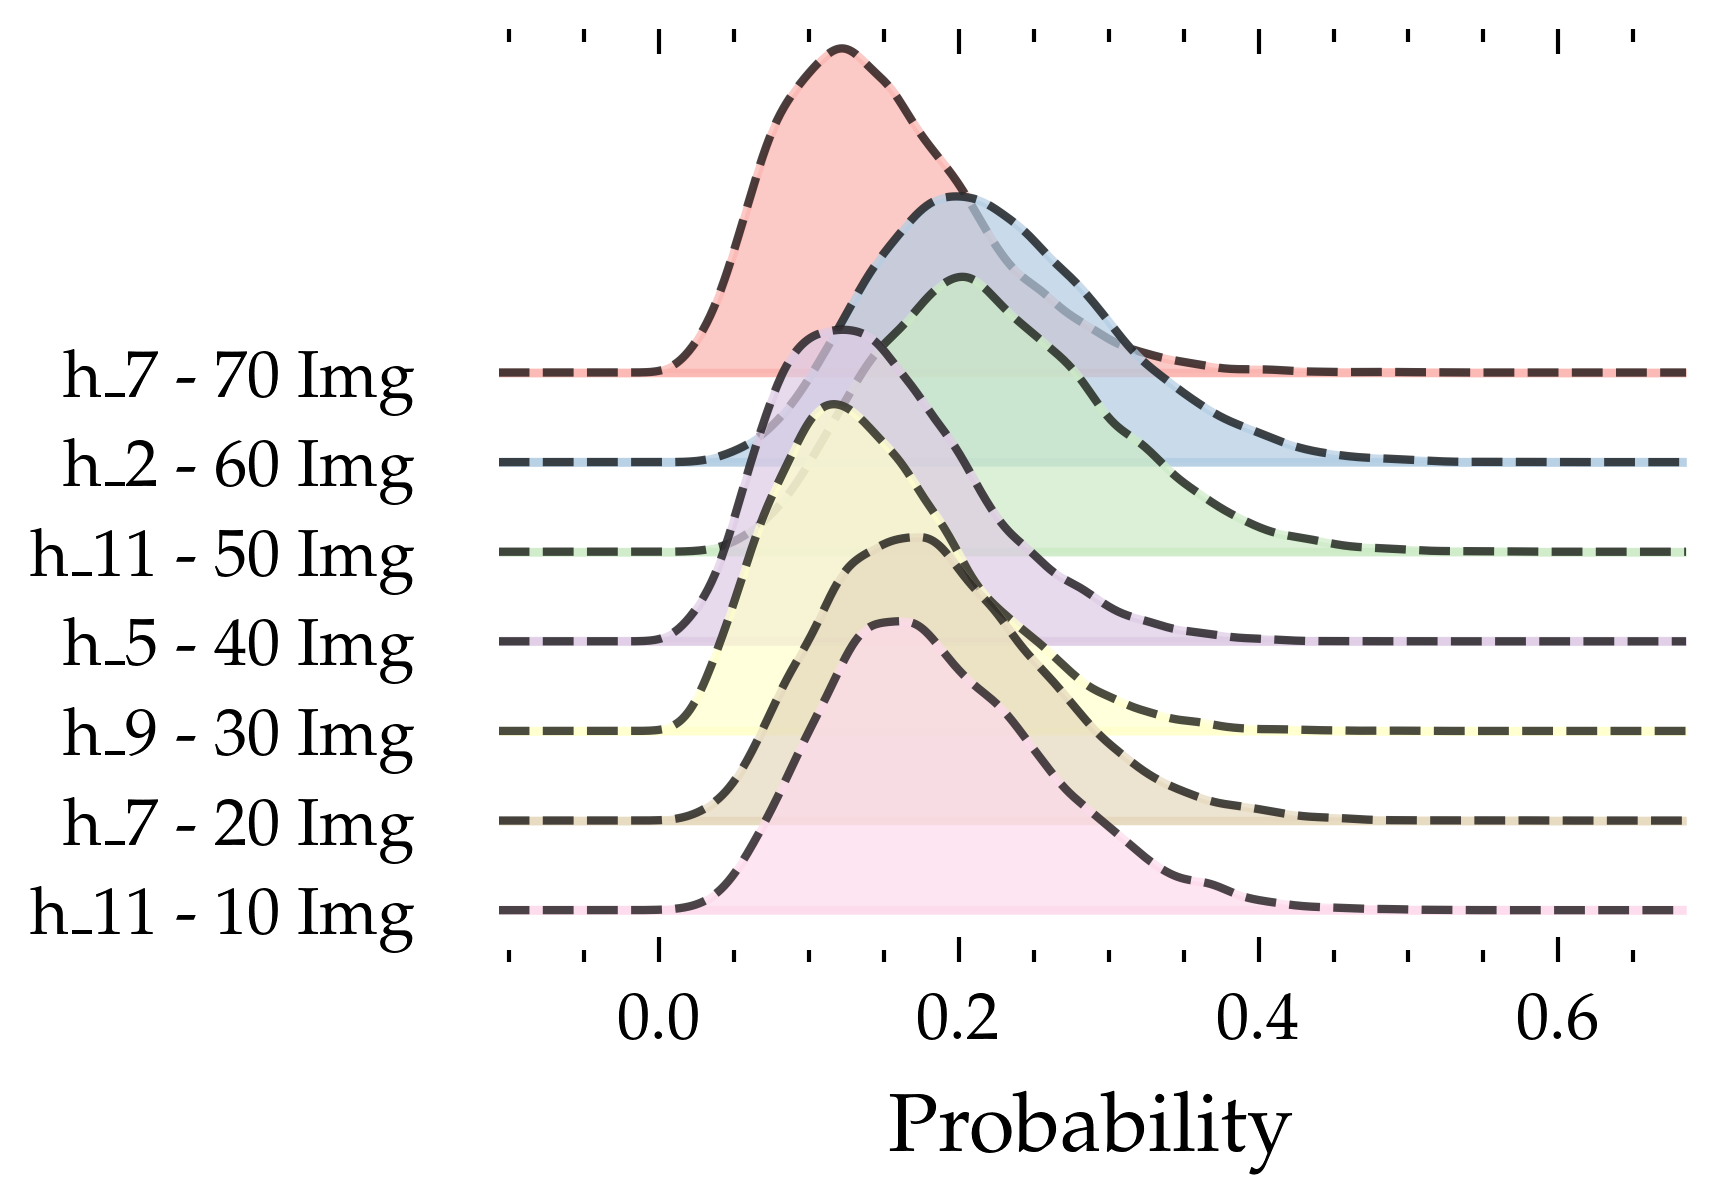

In [ ]:
import joypy
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib import cm

# Mapa de operadores
operator_map = {
    'central_force_dynamic': 'h_1',
    'differential_mutation': 'h_2',
    'firefly_dynamic': 'h_3',
    'genetic_crossover': 'h_4',
    'genetic_mutation': 'h_5',
    'gravitational_search': 'h_6',
    'random_flight': 'h_7',
    'local_random_walk': 'h_8',
    'random_sample': 'h_9',
    'random_search': 'h_10',
    'spiral_dynamic': 'h_11',
    'swarm_dynamic': 'h_12'
}

data_op1 = []
data_op2 = []
labels_op1 = []
labels_op2 = []

unique_images = sorted(df_all['imag'].unique(), reverse=True)

colors = cm.Pastel1(np.linspace(0, 1, len(unique_images)))

for i, imag in enumerate(unique_images):
    df_filtered = df_all[df_all['imag'] == imag]

    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op1 = posterior_dist.rvs(10000)

    data_op1.append(samples_op1)
    labels_op1.append(f'{operator_map[most_frequent_op1]} - {imag} Images')

    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op2 = posterior_dist.rvs(10000)

    data_op2.append(samples_op2)
    labels_op2.append(f'{operator_map[most_frequent_op2]} - {imag} Img')

plt.figure(figsize=(3, 2))
joypy.joyplot(data_op1, labels=labels_op1, colormap=cm.Pastel1, alpha=0.7, linecolor='black', fade=True)
plt.xlabel('Probability')
plt.show()

plt.figure(figsize=(3, 2))
joypy.joyplot(data_op2, labels=labels_op2, colormap=cm.Pastel1, alpha=0.7, linecolor='black', fade=False)
plt.xlabel('Probability')
plt.show()


/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


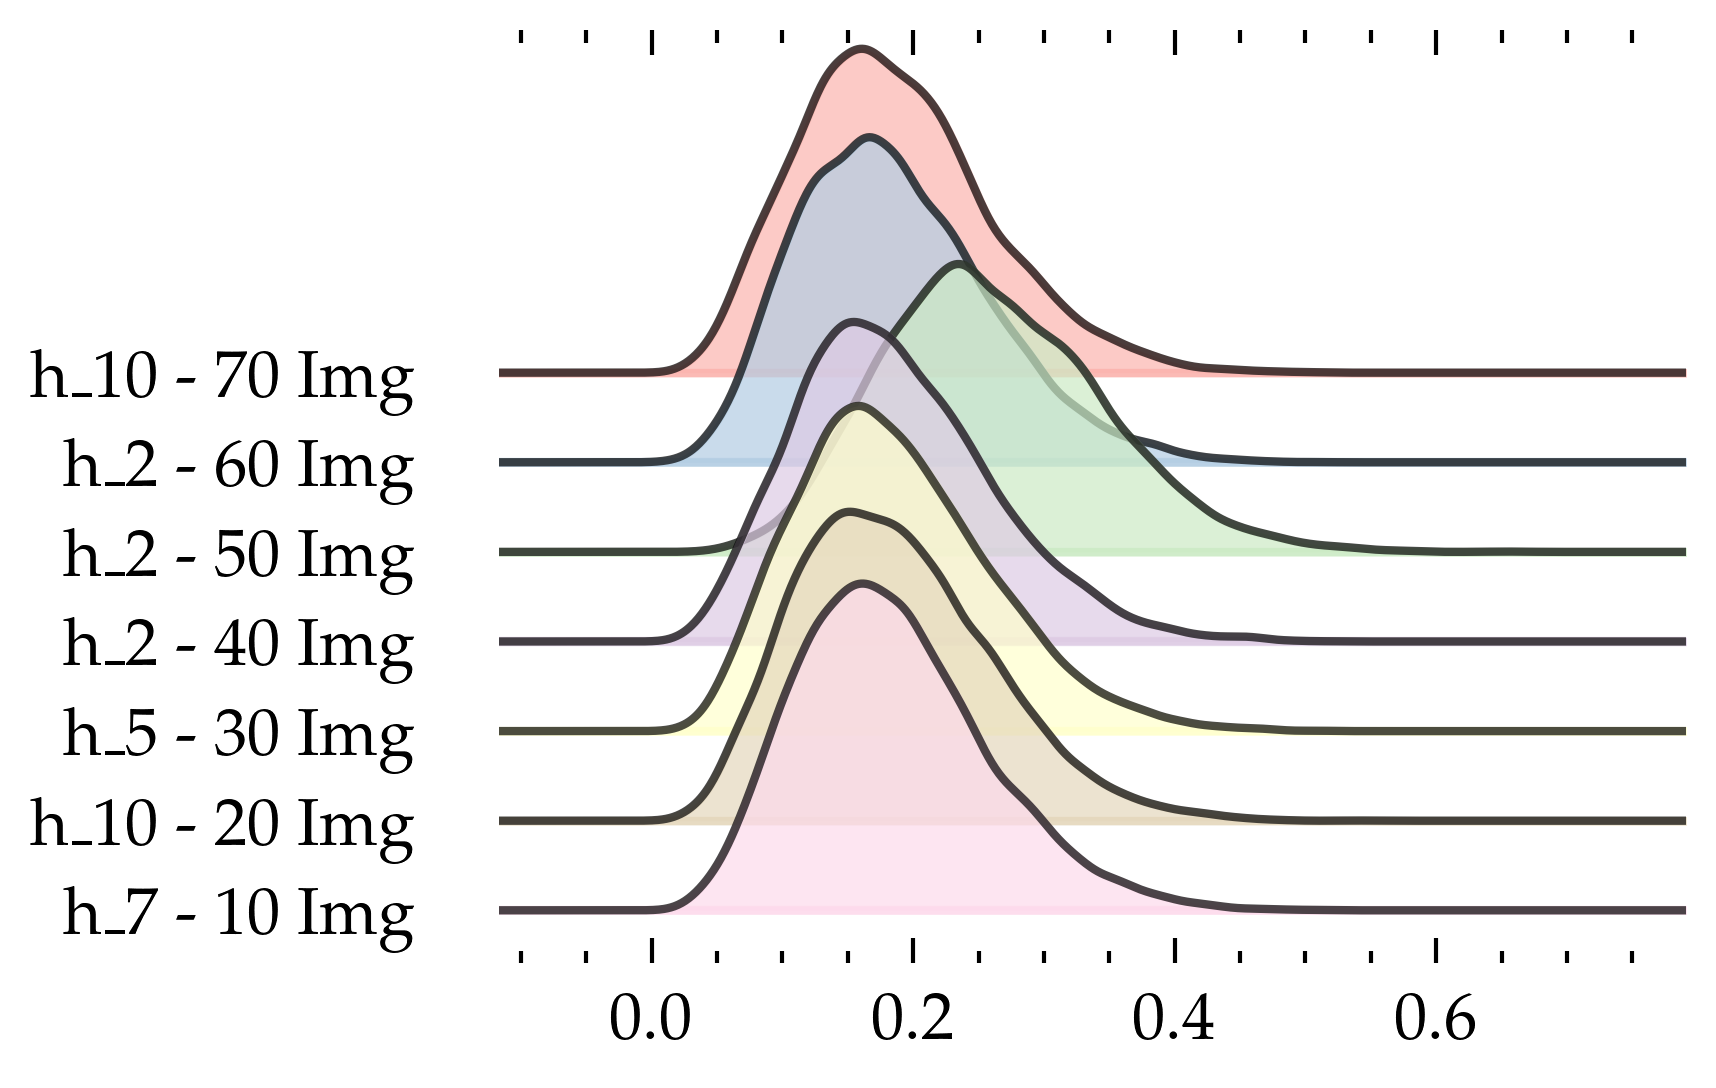

/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


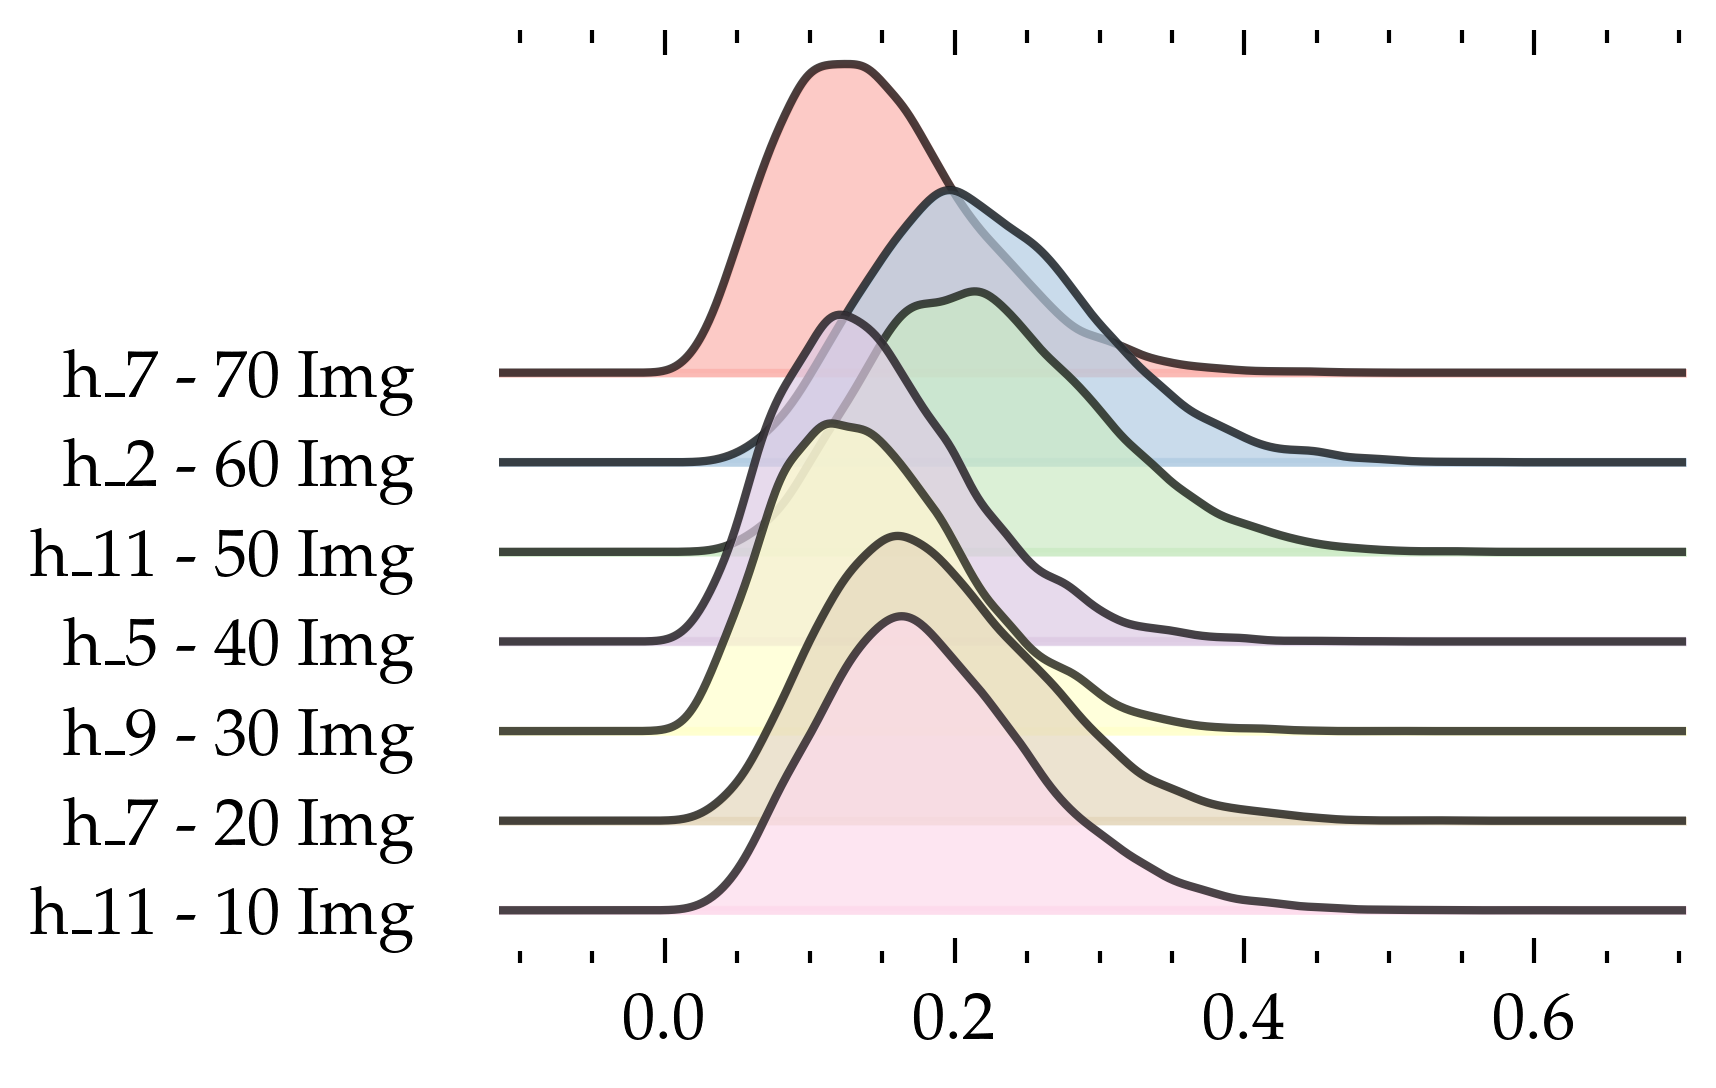

In [ ]:
import joypy
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib import cm

# Mapa de operadores
operator_map = {
    'central_force_dynamic': 'h_1',
    'differential_mutation': 'h_2',
    'firefly_dynamic': 'h_3',
    'genetic_crossover': 'h_4',
    'genetic_mutation': 'h_5',
    'gravitational_search': 'h_6',
    'random_flight': 'h_7',
    'local_random_walk': 'h_8',
    'random_sample': 'h_9',
    'random_search': 'h_10',
    'spiral_dynamic': 'h_11',
    'swarm_dynamic': 'h_12'
}

# Inicializar listas para almacenar datos para JoyPlot
data_op1 = []
data_op2 = []
labels_op1 = []
labels_op2 = []

unique_images = sorted(df_all['imag'].unique(), reverse=True)

# Configurar colores usando el colormap Pastel1
colors = cm.Pastel1(np.linspace(0, 1, len(unique_images)))

for i, imag in enumerate(unique_images):
    # Filtrar los datos por el número de imágenes
    df_filtered = df_all[df_all['imag'] == imag]

    # Análisis para Op1
    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op1 = posterior_dist.rvs(10000)

    data_op1.append(samples_op1)
    labels_op1.append(f'{operator_map[most_frequent_op1]} - {imag} Img')

    # Análisis para Op2
    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op2 = posterior_dist.rvs(10000)

    data_op2.append(samples_op2)
    labels_op2.append(f'{operator_map[most_frequent_op2]} - {imag} Img')

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op1, labels=labels_op1, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    fig.savefig('JoyPlot_Op1.pdf', dpi=300)
    plt.show()

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op2, labels=labels_op2, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    fig.savefig('JoyPlot_Op2.pdf', dpi=300)
    plt.show()


/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


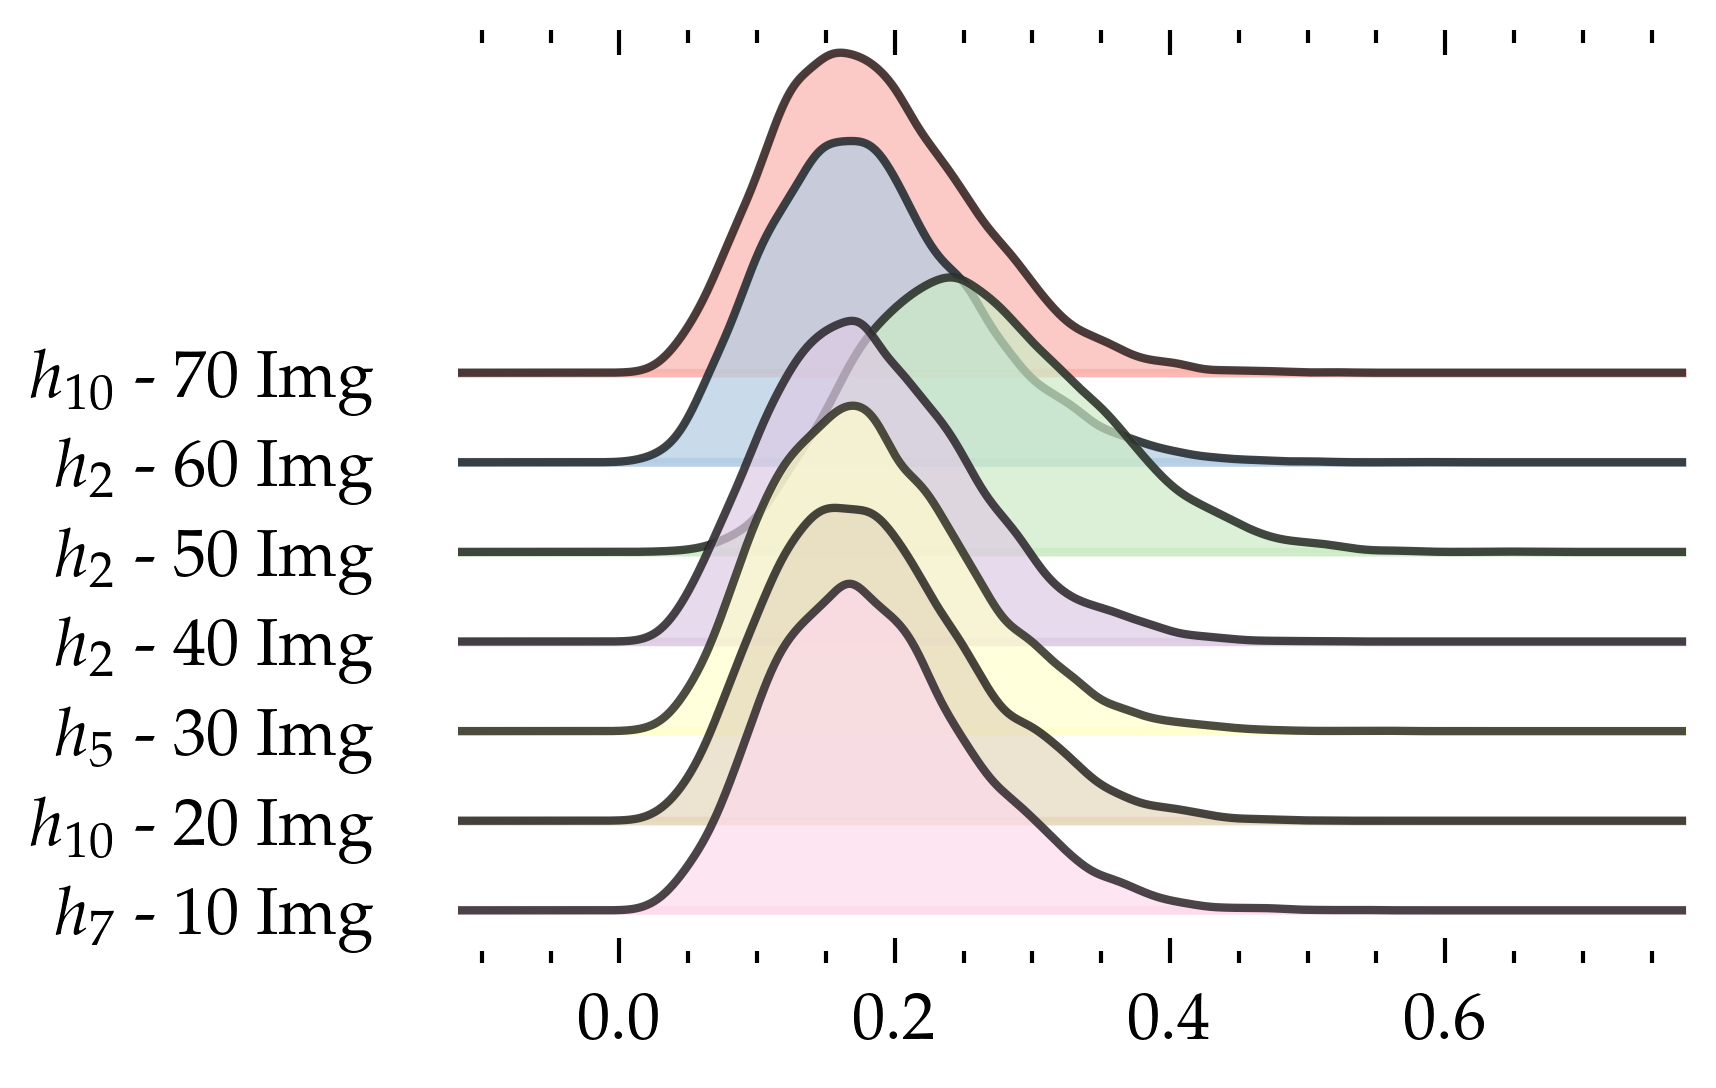

/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


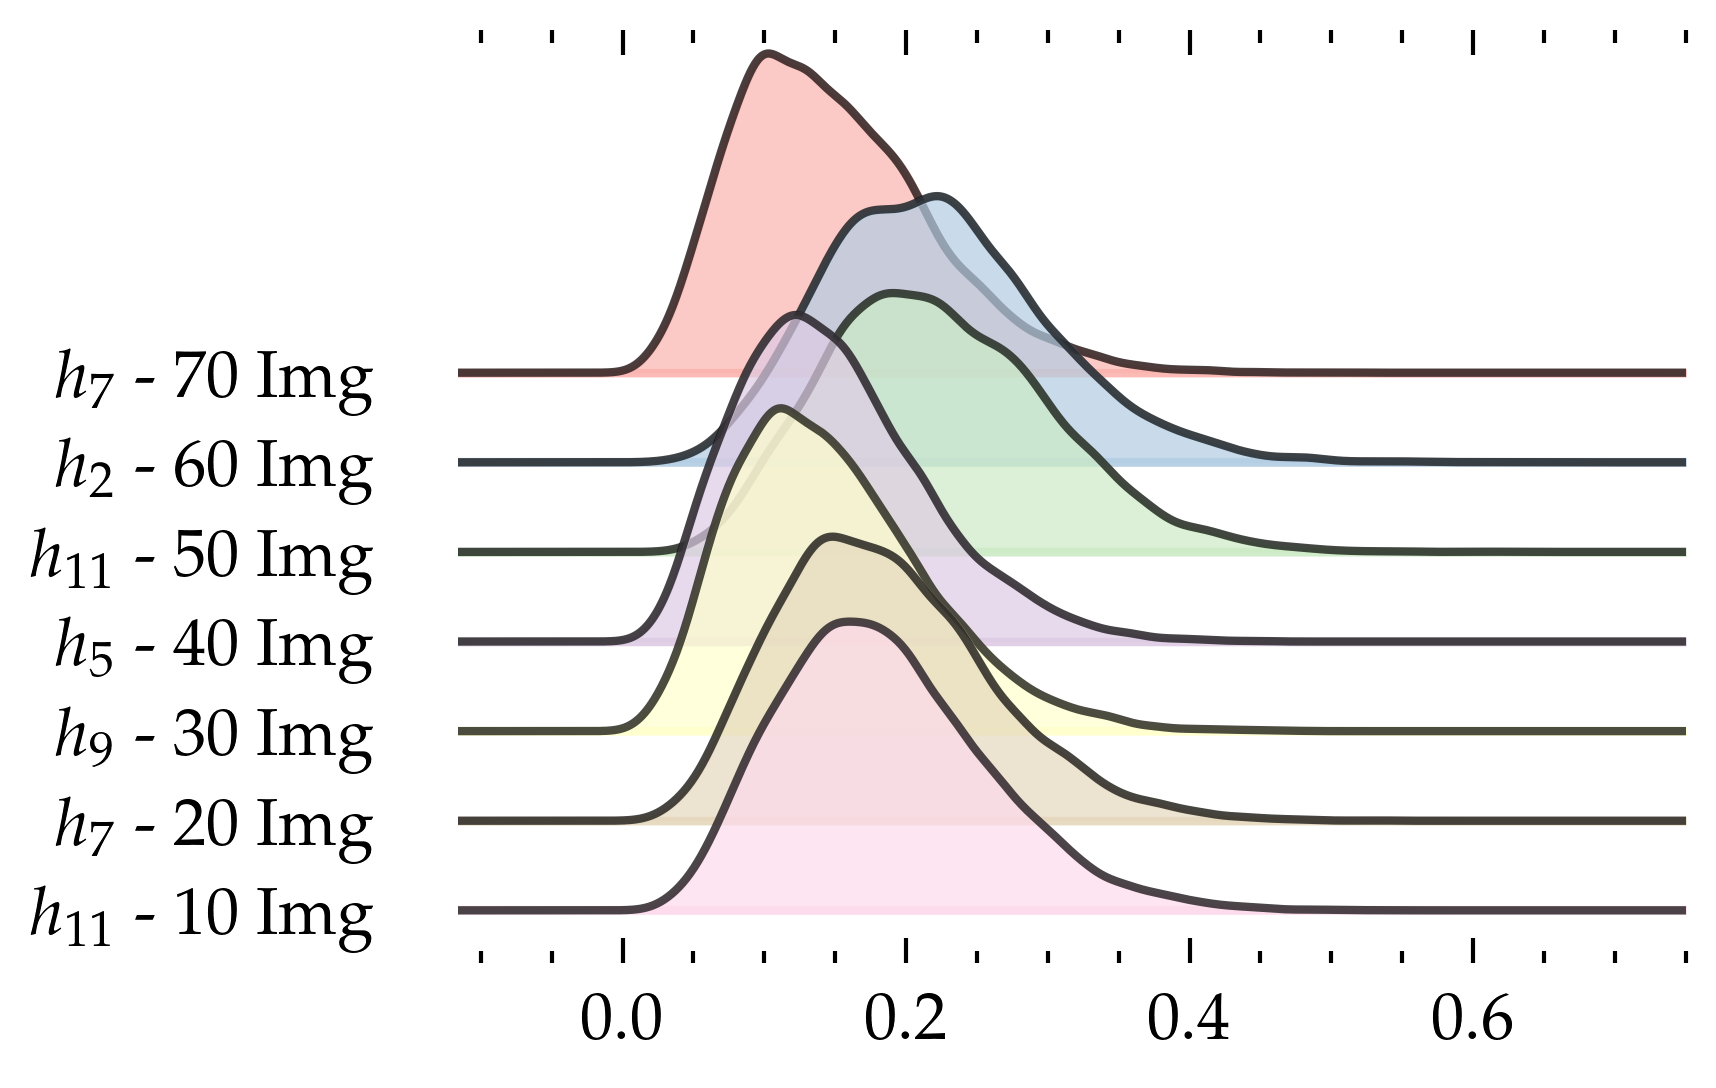

In [ ]:
import joypy
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib import cm

# Mapa de operadores
operator_map = {
    'central_force_dynamic': r'$h_1$',
    'differential_mutation': r'$h_2$',
    'firefly_dynamic': r'$h_3$',
    'genetic_crossover': r'$h_4$',
    'genetic_mutation': r'$h_5$',
    'gravitational_search': r'$h_6$',
    'random_flight': r'$h_7$',
    'local_random_walk': r'$h_8$',
    'random_sample': r'$h_9$',
    'random_search': r'$h_{10}$',
    'spiral_dynamic': r'$h_{11}$',
    'swarm_dynamic': r'$h_{12}$'
}

# Inicializar listas para almacenar datos para JoyPlot
data_op1 = []
data_op2 = []
labels_op1 = []
labels_op2 = []

unique_images = sorted(df_all['imag'].unique(), reverse=True)

# Configurar colores usando el colormap Pastel1
colors = cm.Pastel1(np.linspace(0, 1, len(unique_images)))

for i, imag in enumerate(unique_images):
    # Filtrar los datos por el número de imágenes
    df_filtered = df_all[df_all['imag'] == imag]

    # Análisis para Op1
    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op1 = posterior_dist.rvs(10000)

    data_op1.append(samples_op1)
    labels_op1.append(f'{operator_map[most_frequent_op1]} - {imag} Img')

    # Análisis para Op2
    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)
ñ
    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op2 = posterior_dist.rvs(10000)

    data_op2.append(samples_op2)
    labels_op2.append(f'{operator_map[most_frequent_op2]} - {imag} Img')

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op1, labels=labels_op1, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    fig.savefig('JoyPlot_Op1.pdf', dpi=300)
    plt.show()

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op2, labels=labels_op2, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    fig.savefig('JoyPlot_Op2.pdf', dpi=300)
    plt.show()


In [ ]:
import scipy.stats as stats

# Inicializar listas para almacenar probabilidades para cada operador
probabilities_op1 = []
probabilities_op2 = []

# Mapa de operadores
operator_map = {
    'central_force_dynamic': 'h_1',
    'differential_mutation': 'h_2',
    'firefly_dynamic': 'h_3',
    'genetic_crossover': 'h_4',
    'genetic_mutation': 'h_5',
    'gravitational_search': 'h_6',
    'random_flight': 'h_7',
    'local_random_walk': 'h_8',
    'random_sample': 'h_9',
    'random_search': 'h_10',
    'spiral_dynamic': 'h_11',
    'swarm_dynamic': 'h_12'
}

unique_images = sorted(df_all['imag'].unique(), reverse=True)

for imag in unique_images:
    # Filtrar los datos por el número de imágenes
    df_filtered = df_all[df_all['imag'] == imag]

    # Análisis para Op1
    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    posterior_prob_op1 = posterior_dist.mean()

    # Almacenar la probabilidad en la lista junto con el número de experimentos
    probabilities_op1.append((operator_map[most_frequent_op1], imag, posterior_prob_op1, total_experiments))

    # Análisis para Op2
    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    posterior_prob_op2 = posterior_dist.mean()

    # Almacenar la probabilidad en la lista junto con el número de experimentos
    probabilities_op2.append((operator_map[most_frequent_op2], imag, posterior_prob_op2, total_experiments))

# Mostrar las listas de probabilidades junto con el número de experimentos
print("Probabilidades para Op1:")
for op, imag, prob, total_experiments in probabilities_op1:
    print(f"Operador: {op}, Número de Imágenes: {imag}, Probabilidad: {prob:.5f}, Total de experimentos: {total_experiments}")

print("\nProbabilidades para Op2:")
for op, imag, prob, total_experiments in probabilities_op2:
    print(f"Operador: {op}, Número de Imágenes: {imag}, Probabilidad: {prob:.5f}, Total de experimentos: {total_experiments}")


Probabilidades para Op1:
Operador: h_10, Número de Imágenes: 70, Probabilidad: 0.18519, Total de experimentos: 15
Operador: h_2, Número de Imágenes: 60, Probabilidad: 0.18519, Total de experimentos: 15
Operador: h_2, Número de Imágenes: 50, Probabilidad: 0.25926, Total de experimentos: 15
Operador: h_2, Número de Imágenes: 40, Probabilidad: 0.18519, Total de experimentos: 15
Operador: h_5, Número de Imágenes: 30, Probabilidad: 0.18519, Total de experimentos: 15
Operador: h_10, Número de Imágenes: 20, Probabilidad: 0.18519, Total de experimentos: 15
Operador: h_7, Número de Imágenes: 10, Probabilidad: 0.18519, Total de experimentos: 15

Probabilidades para Op2:
Operador: h_7, Número de Imágenes: 70, Probabilidad: 0.14815, Total de experimentos: 15
Operador: h_2, Número de Imágenes: 60, Probabilidad: 0.22222, Total de experimentos: 15
Operador: h_11, Número de Imágenes: 50, Probabilidad: 0.22222, Total de experimentos: 15
Operador: h_5, Número de Imágenes: 40, Probabilidad: 0.14815, Tota

In [ ]:
import scipy.stats as stats

# Mapa de operadores
operator_map = {
    'central_force_dynamic': 'h_1',
    'differential_mutation': 'h_2',
    'firefly_dynami': 'h_3',
    'genetic_crossover': 'h_4',
    'genetic_mutation': 'h_5',
    'gravitational_search': 'h_6',
    'random_flight': 'h_7',
    'local_random_walk': 'h_8',
    'random_sample': 'h_9',
    'random_search': 'h_10',
    'spiral_dynamic': 'h_11',
    'swarm_dynamic': 'h_12',
    'firefly_dynamic': 'h_3',

}

# Combinar todos los datos para calcular la frecuencia total de cada operador en Op1 y Op2
total_op1_counts = df_all['Op1'].value_counts()
total_op2_counts = df_all['Op2'].value_counts()

# Calcular la probabilidad para cada operador en Op1
probabilities_op1_total = {}
for op in total_op1_counts.index:
    op_count = total_op1_counts[op]
    total_experiments = len(df_all)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op_count
    beta_post = beta_prior + (total_experiments - op_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    posterior_prob_op1 = posterior_dist.mean()

    probabilities_op1_total[operator_map[op]] = posterior_prob_op1

# Calcular la probabilidad para cada operador en Op2
probabilities_op2_total = {}
for op in total_op2_counts.index:
    op_count = total_op2_counts[op]
    total_experiments = len(df_all)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op_count
    beta_post = beta_prior + (total_experiments - op_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    posterior_prob_op2 = posterior_dist.mean()

    probabilities_op2_total[operator_map[op]] = posterior_prob_op2

# Mostrar las probabilidades totales
print("Probabilidades totales para Op1:")
for op, prob in probabilities_op1_total.items():
    print(f"Operador: {op}, Probabilidad: {prob:.5f}")

print("\nProbabilidades totales para Op2:")
for op, prob in probabilities_op2_total.items():
    print(f"Operador: {op}, Probabilidad: {prob:.5f}")


Probabilidades totales para Op1:
Operador: h_7, Probabilidad: 0.17094
Operador: h_2, Probabilidad: 0.16239
Operador: h_10, Probabilidad: 0.15385
Operador: h_5, Probabilidad: 0.11111
Operador: h_8, Probabilidad: 0.11111
Operador: h_11, Probabilidad: 0.07692
Operador: h_9, Probabilidad: 0.05128
Operador: h_3, Probabilidad: 0.05128
Operador: h_4, Probabilidad: 0.03419
Operador: h_12, Probabilidad: 0.03419
Operador: h_6, Probabilidad: 0.02564
Operador: h_1, Probabilidad: 0.01709

Probabilidades totales para Op2:
Operador: h_7, Probabilidad: 0.18803
Operador: h_11, Probabilidad: 0.14530
Operador: h_2, Probabilidad: 0.11111
Operador: h_10, Probabilidad: 0.09402
Operador: h_9, Probabilidad: 0.08547
Operador: h_12, Probabilidad: 0.08547
Operador: h_5, Probabilidad: 0.06838
Operador: h_8, Probabilidad: 0.06838
Operador: h_4, Probabilidad: 0.05128
Operador: h_3, Probabilidad: 0.01709
Operador: h_1, Probabilidad: 0.02564
Operador: h_6, Probabilidad: 0.01709


In [ ]:
unique_images = sorted(df_all['imag'].unique(), reverse=True)

for imag in unique_images:
    # Filtrar los datos por el número de imágenes
    df_filtered = df_all[df_all['imag'] == imag]

    # Análisis para Op1
    most_frequent_op1 = df_filtered['Op1'].value_counts().idxmax()
    op1_count = df_filtered['Op1'].value_counts().max()

    total_experiments = len(df_filtered)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op1_count
    beta_post = beta_prior + (total_experiments - op1_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    posterior_prob_op1 = posterior_dist.mean()

    # Mostrar la frecuencia y la probabilidad calculada para Op1
    print(f"Para {imag} imágenes:")
    print(f"Operador más frecuente en Op1: {operator_map[most_frequent_op1]}")
    print(f"Frecuencia de {operator_map[most_frequent_op1]}: {op1_count}")
    print(f"Total de experimentos: {total_experiments}")
    print(f"Probabilidad posterior para Op1: {posterior_prob_op1:.5f}\n")

    # Análisis para Op2
    most_frequent_op2 = df_filtered['Op2'].value_counts().idxmax()
    op2_count = df_filtered['Op2'].value_counts().max()

    alpha_post = alpha_prior + op2_count
    beta_post = beta_prior + (total_experiments - op2_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    posterior_prob_op2 = posterior_dist.mean()

    # Mostrar la frecuencia y la probabilidad calculada para Op2
    print(f"Operador más frecuente en Op2: {operator_map[most_frequent_op2]}")
    print(f"Frecuencia de {operator_map[most_frequent_op2]}: {op2_count}")
    print(f"Total de experimentos: {total_experiments}")
    print(f"Probabilidad posterior para Op2: {posterior_prob_op2:.5f}\n")


Para 70 imágenes:
Operador más frecuente en Op1: h_10
Frecuencia de h_10: 4
Total de experimentos: 15
Probabilidad posterior para Op1: 0.18519

Operador más frecuente en Op2: h_7
Frecuencia de h_7: 3
Total de experimentos: 15
Probabilidad posterior para Op2: 0.14815

Para 60 imágenes:
Operador más frecuente en Op1: h_2
Frecuencia de h_2: 4
Total de experimentos: 15
Probabilidad posterior para Op1: 0.18519

Operador más frecuente en Op2: h_2
Frecuencia de h_2: 5
Total de experimentos: 15
Probabilidad posterior para Op2: 0.22222

Para 50 imágenes:
Operador más frecuente en Op1: h_2
Frecuencia de h_2: 6
Total de experimentos: 15
Probabilidad posterior para Op1: 0.25926

Operador más frecuente en Op2: h_11
Frecuencia de h_11: 5
Total de experimentos: 15
Probabilidad posterior para Op2: 0.22222

Para 40 imágenes:
Operador más frecuente en Op1: h_2
Frecuencia de h_2: 4
Total de experimentos: 15
Probabilidad posterior para Op1: 0.18519

Operador más frecuente en Op2: h_5
Frecuencia de h_5: 3


/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


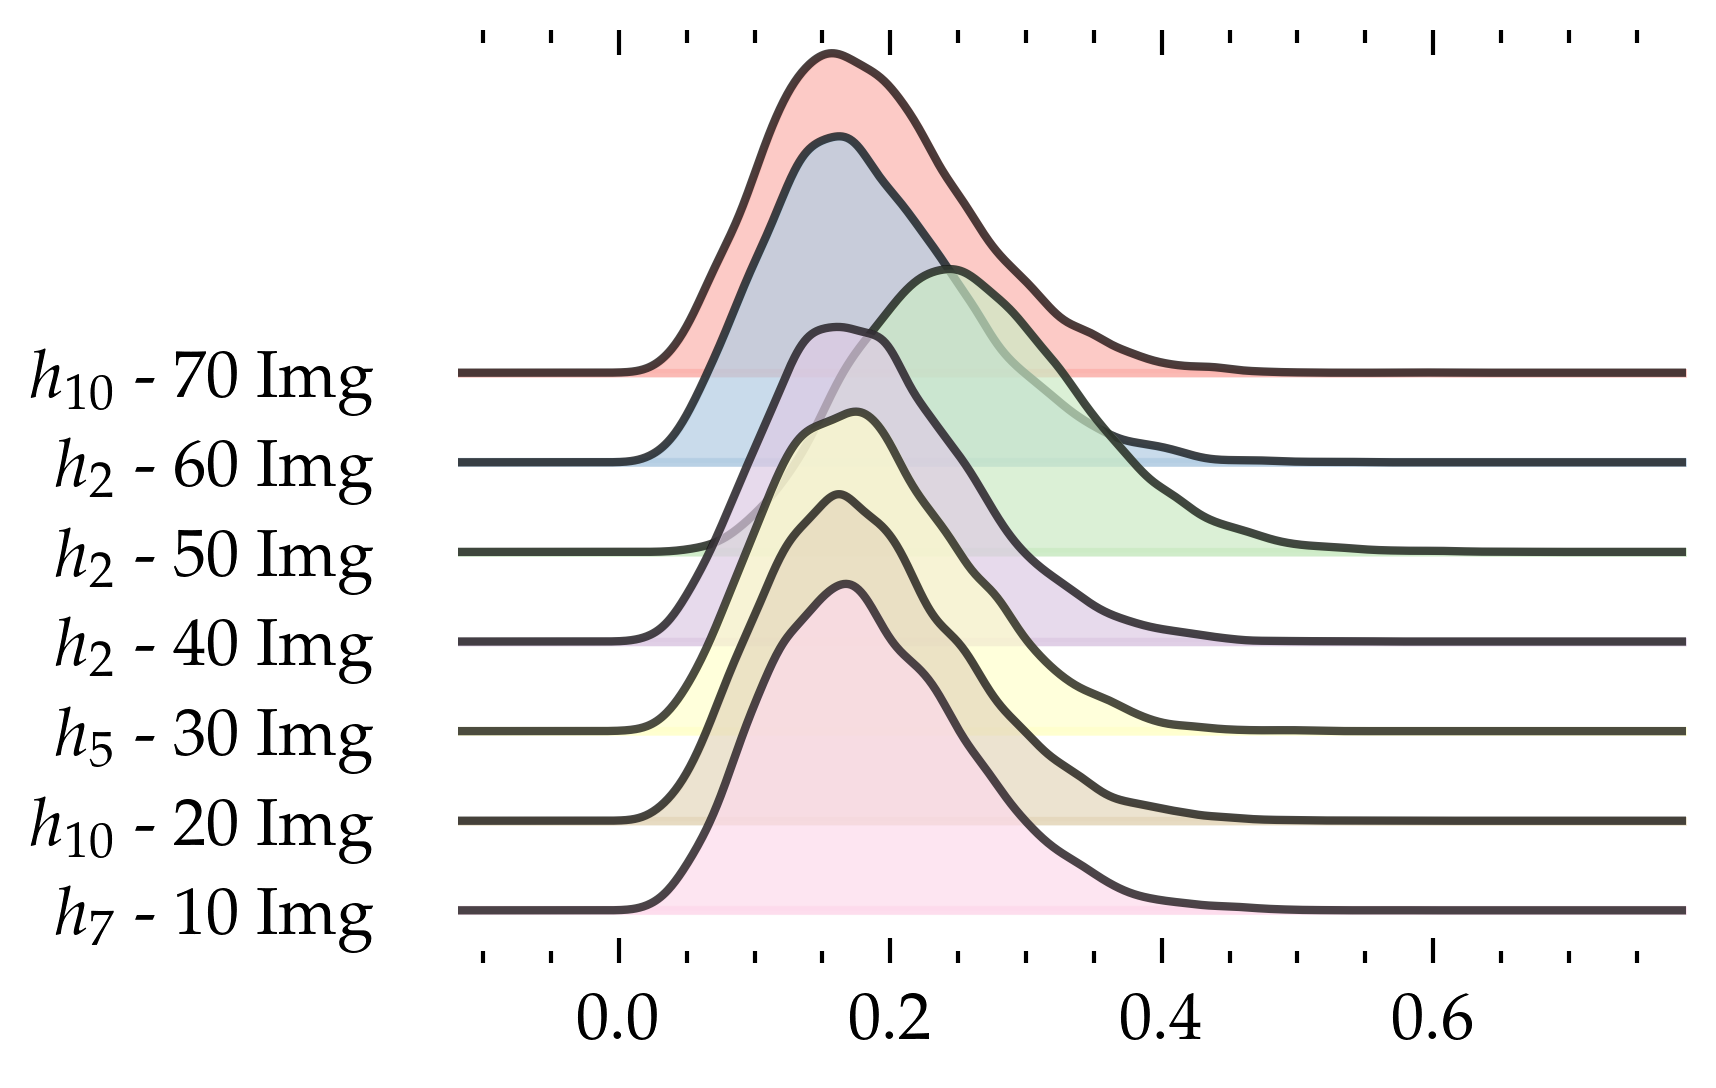

/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


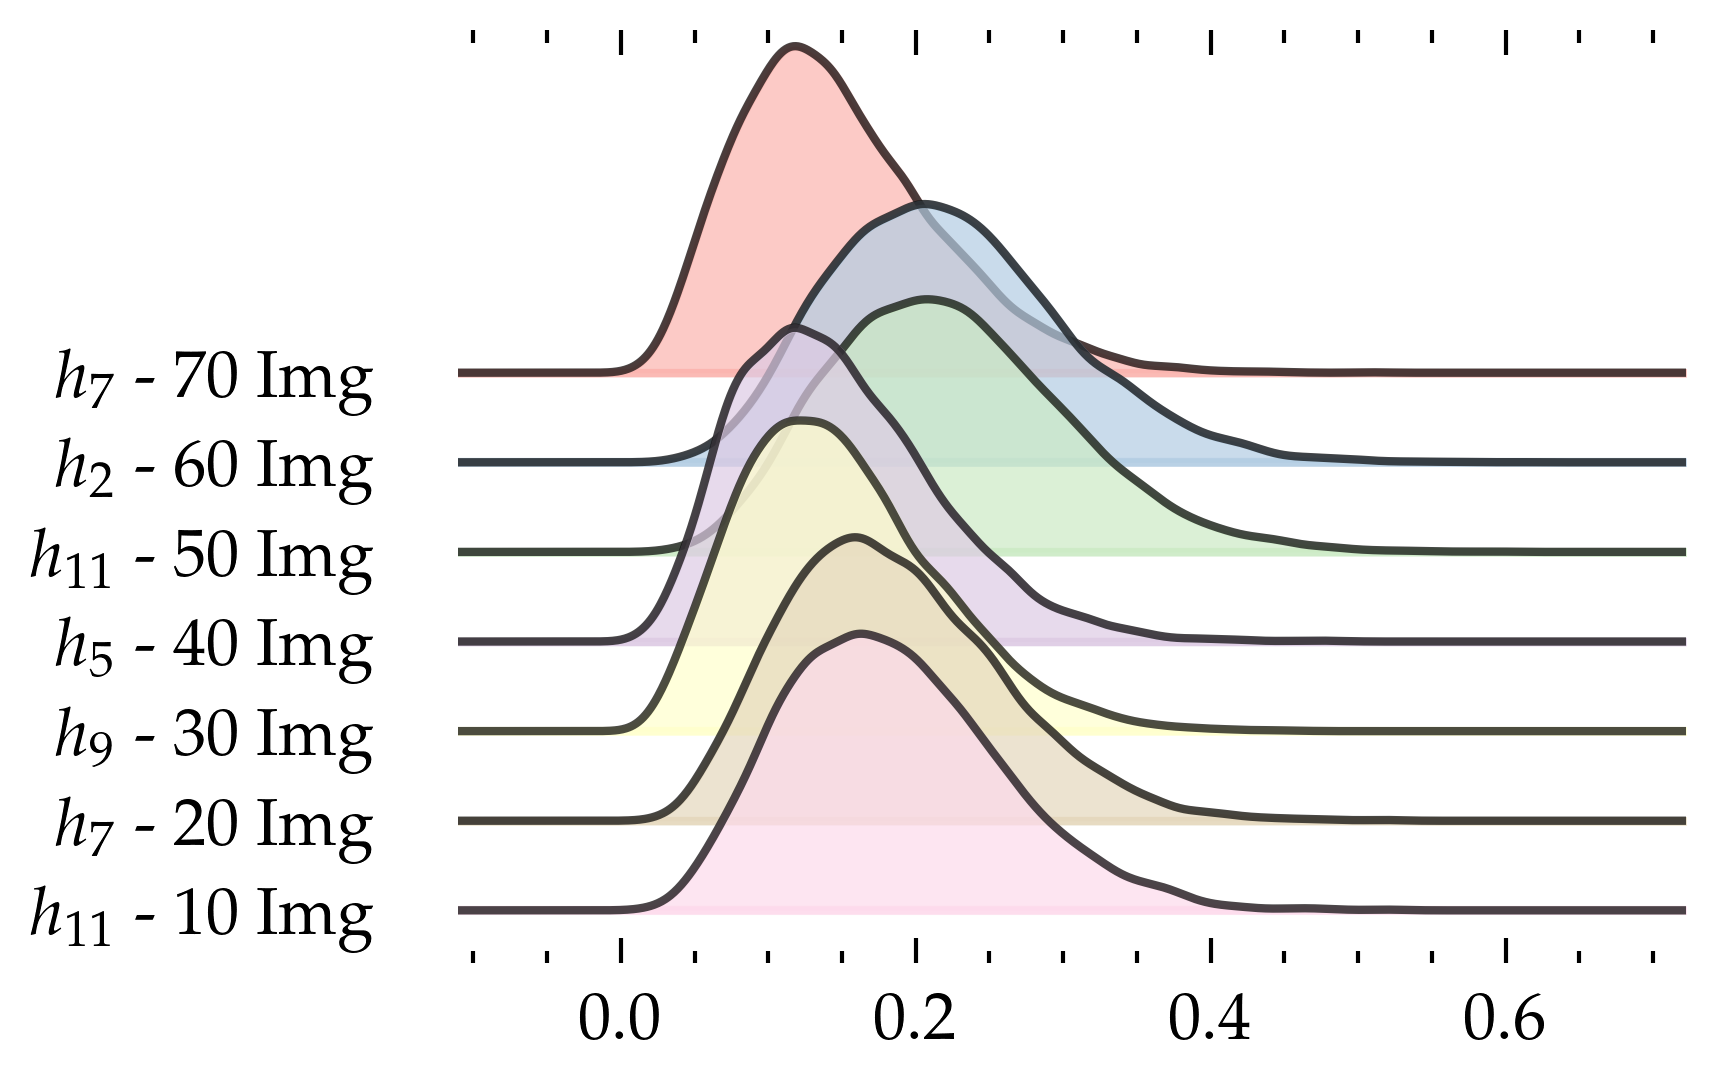

In [ ]:
import joypy
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib import cm

# Mapa de operadores
operator_map = {
    'central_force_dynamic': r'SO$_1$',
    'differential_mutation': r'SO$_2$',
    'firefly_dynamic': r'SO$_3$',
    'genetic_crossover': r'SO$_4$',
    'genetic_mutation': r'SO$_5$',
    'gravitational_search': r'SO$_6$',
    'random_flight': r'SO$_7$',
    'local_random_walk': r'SO$_8$',
    'random_sample': r'SO$_9$',
    'random_search': r'SO$_{10}$',
    'spiral_dynamic': r'SO$_{11}$',
    'swarm_dynamic': r'SO$_{12}$'
}

# Inicializar listas para almacenar datos para JoyPlot
data_op1 = []
data_op2 = []
labels_op1 = []
labels_op2 = []

# Configurar colores usando el colormap Pastel1
colors = cm.Pastel1(np.linspace(0, 1, 2))

# Análisis para SO$_1$
most_frequent_op1 = df_all['Op1'].value_counts().idxmax()
op1_count = df_all['Op1'].value_counts().max()

total_experiments = len(df_all)

alpha_prior = 1
beta_prior = 11

alpha_post = alpha_prior + op1_count
beta_post = beta_prior + (total_experiments - op1_count)

posterior_dist = stats.beta(alpha_post, beta_post)
samples_op1 = posterior_dist.rvs(10000)

data_op1.append(samples_op1)
labels_op1.append(f'{operator_map[most_frequent_op1]}')

# Análisis para SO$_2$
most_frequent_op2 = df_all['Op2'].value_counts().idxmax()
op2_count = df_all['Op2'].value_counts().max()

alpha_post = alpha_prior + op2_count
beta_post = beta_prior + (total_experiments - op2_count)

posterior_dist = stats.beta(alpha_post, beta_post)
samples_op2 = posterior_dist.rvs(10000)

data_op2.append(samples_op2)
labels_op2.append(f'{operator_map[most_frequent_op2]}')

# Crear JoyPlot para SO$_1$
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op1, labels=labels_op1, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    ax.set_title('Posterior Probability of SO$_1$')
    fig.savefig('JoyPlot_SO1.pdf', dpi=300)
    plt.show()

# Crear JoyPlot para SO$_2$
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op2, labels=labels_op2, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    ax.set_title('Posterior Probability of SO$_2$')
    fig.savefig('JoyPlot_SO2.pdf', dpi=300)
    plt.show()


/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


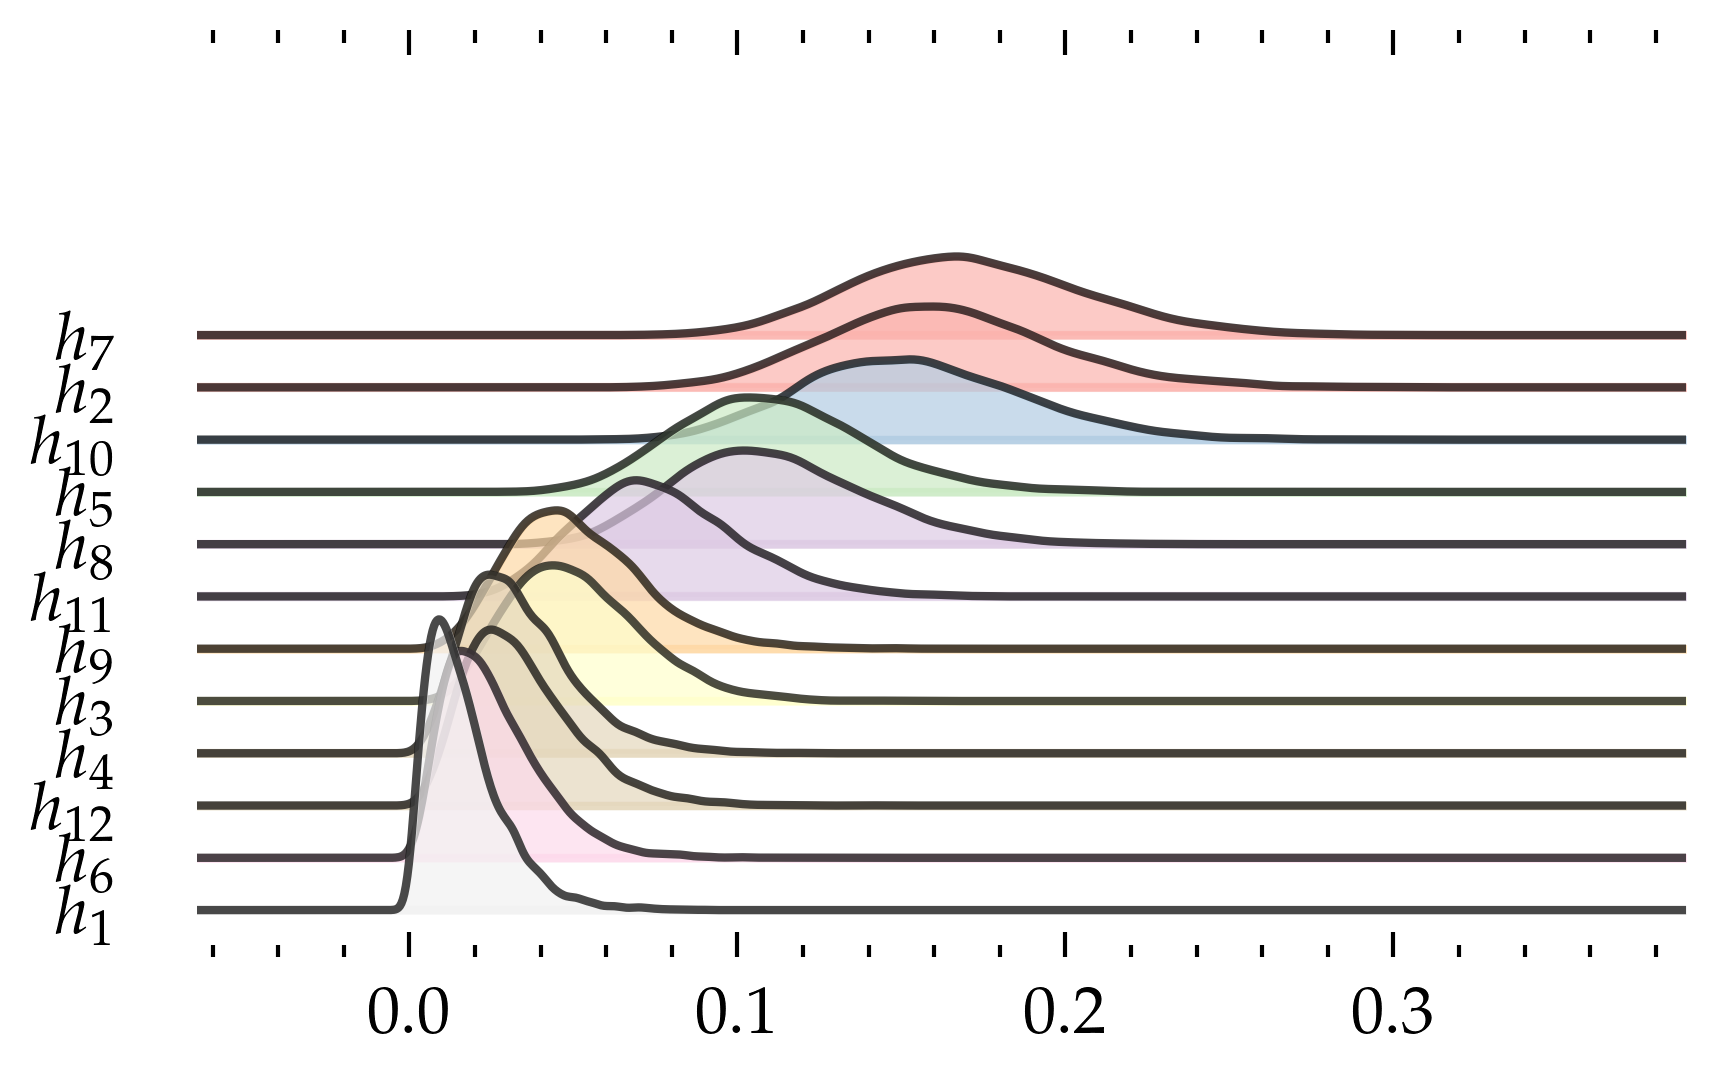

/usr/local/lib/python3.10/dist-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


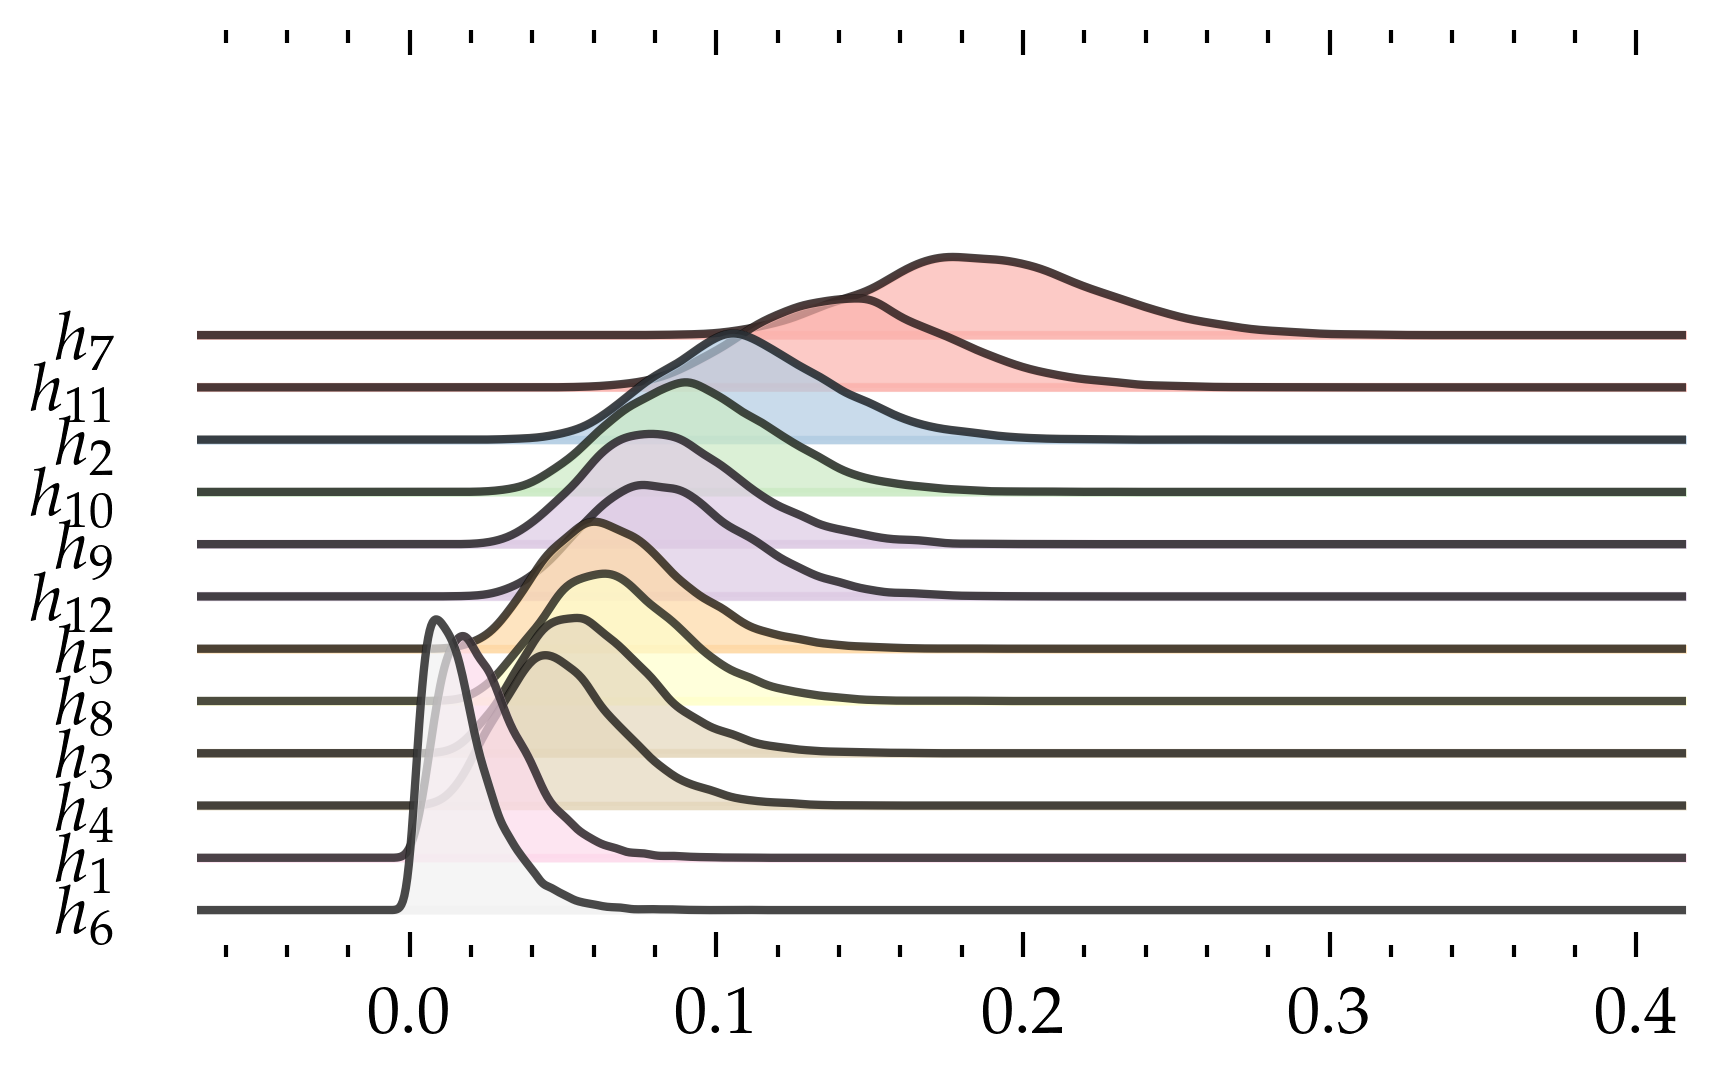

In [ ]:
import joypy
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib import cm

# Mapa de operadores
operator_map = {
    'central_force_dynamic': r'$h_1$',
    'differential_mutation': r'$h_2$',
    'firefly_dynamic': r'$h_3$',
    'genetic_crossover': r'$h_4$',
    'genetic_mutation': r'$h_5$',
    'gravitational_search': r'$h_6$',
    'random_flight': r'$h_7$',
    'local_random_walk': r'$h_8$',
    'random_sample': r'$h_9$',
    'random_search': r'$h_{10}$',
    'spiral_dynamic': r'$h_{11}$',
    'swarm_dynamic': r'$h_{12}$'
}

total_op1_counts = df_all['Op1'].value_counts()
total_op2_counts = df_all['Op2'].value_counts()

data_op1 = []
data_op2 = []
labels_op1 = []
labels_op2 = []

for op in total_op1_counts.index:
    op_count = total_op1_counts[op]
    total_experiments = len(df_all)

    alpha_prior = 1
    beta_prior = 11

    alpha_post = alpha_prior + op_count
    beta_post = beta_prior + (total_experiments - op_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op1 = posterior_dist.rvs(10000)

    data_op1.append(samples_op1)
    labels_op1.append(f'{operator_map[op]}')

for op in total_op2_counts.index:
    op_count = total_op2_counts[op]
    total_experiments = len(df_all)

    alpha_post = alpha_prior + op_count
    beta_post = beta_prior + (total_experiments - op_count)

    posterior_dist = stats.beta(alpha_post, beta_post)
    samples_op2 = posterior_dist.rvs(10000)

    data_op2.append(samples_op2)
    labels_op2.append(f'{operator_map[op]}')

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op1, labels=labels_op1, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    fig.savefig('JoyPlot_Op1_AllData.pdf', dpi=300)
    plt.show()

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3, 2))
    joypy.joyplot(data_op2, labels=labels_op2, colormap=cm.Pastel1, alpha=0.7, linecolor='black', linewidth=1, fade=False, ax=ax)
    ax.set_xlabel('Probability', fontsize=12)
    fig.savefig('JoyPlot_Op2_AllData.pdf', dpi=300)
    plt.show()
